# Исследование риска возникновения ДТП

**Цель работы:**  создание системы, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

**Текущая задача:** понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

**Идея решения задачи от заказчика:**
1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties):
* Для модели выбрать тип виновника — только машина (car).
* Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
* Для моделирования ограничиться данными за 2012 год — они самые свежие.
* Обязательное условие — учесть фактор возраста автомобиля.
2. На основе модели исследовать основные факторы ДТП.


3. Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
* Возможно ли создать адекватную систему оценки водительского риска при выдаче авто?
* Какие ещё факторы нужно учесть?
* Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Используемые таблицы:
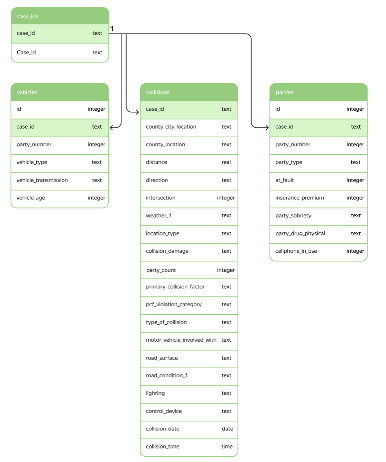

**Сollisions (информация о происшествиях):**
* **Идентификационный номер в базе данных** CASE_ID	(Уникальный номер для зарегистрированного происшествия в таблице происшествий.)
* **Дата происшествия**	COLLISION_DATE	Формат год/месяц/день
* **Время происшествия** COLLISION_TIME	Формат: 24-часовой
* **Является ли место происшествие перекрёстком**	INTERSECTION:
- Y — Intersection (перекрёсток)
- N — Not Intersection (не перекрёсток)
- -- — Not stated (Не указано)
* **Погода**	WEATHER_1	A — Clear (Ясно):
- B — Cloudy (Облачно)
- C — Raining (Дождь)
- D — Snowing (Снегопад)
- E — Fog (Туман)
- F — Other (Другое)
- G — Wind (Ветер)
- — Not Stated (Не указано)
* **Серьёзность происшествия**	COLLISION_DAMAGE:
- 1 — FATAL ТС (Не подлежит восстановлению)
- 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)
- 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)
- 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)
- 0 – SCRATCH (Царапина)
* **Основной фактор аварии**	PRIMARY_COLL_FACTOR:
- A — Code Violation (Нарушение правил ПДД)
- B — Other Improper Driving (Другое неправильное вождение)
- C — Other Than Driver (Кроме водителя)
- D — Unknown (Неизвестно)
- E — Fell Asleep (Заснул)
- — Not Stated (Не указано)
* **Состояние дороги**	ROAD_SURFACE:
- A — Dry (Сухая)
- B — Wet (Мокрая)
- C — Snowy or Icy (Заснеженная или обледенелая)
- D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)
- — Not Stated (Не указано)
* **Освещение**	LIGHTING:
- A — Daylight (Дневной свет)
- B — Dusk-Dawn (Сумерки-Рассвет)
- C — Dark-Street Lights (Темно-Уличные фонари)
- D — Dark-No Street Lights (Темно-Нет уличных фонарей)
- E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)
- — Not Stated (Не указано)
* **Номер географических районов, где произошло ДТП** COUNTY_CITY_LOCATION	(число)
* **Названия географических районов, где произошло ДТП** COUNTY_LOCATION (список разных названий, категориальный тип данных)
* **Направление движения** DIRECTION:
- N — North (Север)
- E — East (Восток)
- S — South (Юг)
- W — West (Запад)
- or blank — Not State (Не указано)
- на перекрёстке
* **Расстояние от главной дороги (метры)**	DISTANCE	(число)
* **Тип дороги** LOCATION_TYPE:
- H — Highway (Шоссе)
- I — Intersection (Перекрёсток)
- R — Ramp (or Collector) (Рампа)
- or blank — Not State Highway (Не указано)
* **Количество участников:** PARTY_COUNT	(число)
* **Категория нарушения**	PCF_VIOLATION_CATEGORY:
- 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)
- 02 — Impeding Traffic (Препятствие движению транспорта)
- 03 — Unsafe Speed (Превышение скорости)
- 04 — Following Too Closely (Опасное сближение)
- 05 — Wrong Side of Road (Неправильная сторона дороги)
- 06 — Improper Passing (Неправильное движение)
- 07 — Unsafe Lane Change (Небезопасная смена полосы движения)
- 08 — Improper Turning (Неправильный поворот)
- 09 — Automobile Right of Way (Автомобильное право проезда)
- 10 — Pedestrian Right of Way (Пешеходное право проезда)
- 11 — Pedestrian Violation (Нарушение пешеходами)
- 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)
- 13 — Hazardous Parking (Неправильная парковка)
- 14 — Lights (Освещение)
- 15 — Brakes (Тормоза)
- 16 — Other Equipment (Другое оборудование)
- 17 — Other Hazardous Violation (Другие нарушения)
- 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)
- 19 — Speeding (Скорость)
- 20 — Pedestrian dui (Нарушение пешехода)
- 21 — Unsafe Starting or Backing (Опасный старт)
- 22 — Other Improper Driving (Другое неправильное вождение)
- 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)
- 24 — Fell Asleep (Заснул)
- 00 — Unknown (Неизвестно)
- — Not Stated (Не указано)
* **Тип аварии**	TYPE_OF_COLLISION:
- A — Head-On (Лоб в лоб)
- B — Sideswipe (Сторона)
- C — Rear End (Столкновение задней частью)
- D — Broadside (Боковой удар)
- E — Hit Object (Удар объекта)
- F — Overturned (Опрокинутый)
- G — Vehicle (транспортное средство/ Пешеход)
- H — Other (Другое)
- — Not Stated (Не указано)
* **Дополнительные участники ДТП:**	MOTOR_VEHICLE_INVOLVED_WITH:
- Other motor vehicle (Другой автомобиль)
- Fixed object (Неподвижный объект)
- Parked motor vehicle (Припаркованный автомобиль)
- Pedestrian (Пешеход)
- Bicycle (Велосипедист)
- Non-collision (Не столкновение)
- Other object (Другой объект)
- Motor vehicle on other roadway (Автомобиль на другой проезжей)
- Animal (Животное)
- Train (Поезд)
* **Дорожное состояние**	ROAD_CONDITION_1:
- A — Holes, Deep Ruts (Ямы, глубокая колея)
- B — Loose Material on Roadway (Сыпучий материал на проезжей части)
- C — Obstruction on Roadway (Препятствие на проезжей части)
- D — Construction or Repair Zone (Зона строительства или ремонта)
- E — Reduced Roadway Width (Уменьшенная ширина проезжей части)
- F — Flooded (Затоплено)
- G — Other (Другое)
- H — No Unusual Condition (Нет ничего необычного)
- — Not Stated (Не указано)
* **Устройство управления**	CONTROL_CONDITION_1:
- A — Functioning (Функционирует)
- B — Not Functioning (Не функционирует)
- C — Obscured (Затемнённый)
- D — None (Нет)
- — Not Stated (Не указано)


**Parties (описание участников происшествия)**
 **Идентификационный  номер в базе данных** CASE_ID (Уникальный номер для зарегистрированного происшествия в таблице происшествий.)
* **Номер участника происшествия**	PARTY_NUMBER (От 1 до N — по числу участников происшествия)
* **Тип участника происшествия** PARTY_TYPE:
- 1 — Car (Авто)
- 2 — Road bumper (Дорожные знаки)
- 3 — Building (Строения)
- 4 — Road signs (Отбойник)
- 5 — Other (Другое)
- 6 — Operator (Оператор)
- — Not Stated (Не указано)
* **Виновность участника** AT_FAULT (0/1)
* **Сумма страховки (тыс.$)**	INSURANCE_PREMIUM	(число)
* **Состояние участника: физическое или с учётом принятых лекарств** PARTY_DRUG_PHYSICAL:
- E — Under Drug Influence (Под воздействием лекарств)
- F — Impairment — Physical (Ухудшение состояния)
- G — Impairment Unknown (Не известно)
- H — Not Applicable (Не оценивался)
- I — Sleepy/Fatigued (Сонный/Усталый)
- — Not Stated (Не указано)
* **Трезвость участника** PARTY_SOBRIETY:
- A — Had Not Been Drinking (Не пил)
- B — Had Been Drinking, Under Influence (Был пьян, под влиянием)
- C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)
- D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)
- G — Impairment Unknown (Неизвестно ухудшение)
- H — Not Applicable (Не оценивался)
- — Not Stated (Не указано)
* **Наличие телефона в автомобиле (возможности разговаривать по громкой связи)** CELLPHONE_IN_USE (0/1)


**Vehicles (Описание автомобиля)**
* **Индекс текущей таблицы** ID (Номер в таблице)
* **Идентификационный номер в базе данных** CASE_ID (Уникальный номер для зарегистрированного происшествия в таблице происшествий).
* **Тип кузова** VEHICLE_TYPE :
- MINIVAN
- COUPE
- SEDAN
- HATCHBACK
- OTHER
* **Тип КПП** VEHICLE_TRANSMISSION:
- auto (Автоматическая)
- manual (Ручная)
- — Not Stated (Не указано)
* **Возраст автомобиля (в годах)** VEHICLE_AGE (число)

In [104]:
! pip install optuna >> None

In [105]:
# импорт необходимых библиотек и инструментов
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import catboost as cb
import optuna
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, precision_recall_curve
from torch.utils.data import Dataset, DataLoader
from sqlalchemy import create_engine 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from math import ceil
from sklearn.metrics import confusion_matrix, classification_report

import warnings 
warnings.filterwarnings('ignore')

EPOCHS_n = 300
EPOCHS_nb = 200

## Подключение к базе. Загрузка таблиц sql

In [106]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения:

In [107]:
engine = create_engine(connection_string) 

In [108]:
query = '''
SELECT DISTINCT(EXTRACT(month FROM collision_date)) AS month_date,
       COUNT(case_id) AS count_collisions
FROM collisions
WHERE EXTRACT(YEAR
              FROM collision_date) = 2012
GROUP BY month_date
ORDER BY count_collisions DESC
'''
# выполняем запрос
query_3 = pd.read_sql_query(query, con=engine)
query_3.head(12)

,month_date,count_collisions
0,3.0,32498
1,1.0,32020
2,2.0,30377
3,4.0,29143
4,5.0,25168
5,6.0,3062
6,8.0,622
7,9.0,510
8,7.0,390
9,10.0,304


In [109]:
# выгрузим первую таблицу
#напишем запрос
query = '''
SELECT *
FROM case_ids
LIMIT 10
'''
#выполняем запрос
df_1 = pd.read_sql_query(query, con=engine)
display(df_1.head(10))

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021
5,3899445,2021
6,3899446,2021
7,3899449,2021
8,3899450,2021
9,3899453,2021


In [110]:
# выгрузим вторую таблицу
#напишем запрос
query = '''
SELECT *
FROM vehicles
LIMIT 10
'''
#выполняем запрос
df_2 = pd.read_sql_query(query, con=engine)
display(df_2.head(10))

,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5
5,1175737,5305046,2,sedan,auto,5
6,1175750,5305053,3,sedan,auto,9
7,1175715,5305033,1,sedan,manual,10
8,1175716,5305033,2,sedan,manual,4
9,1175758,5305060,2,sedan,auto,11


In [111]:
# выгрузим третью таблицу
#напишем запрос
query = '''
SELECT *
FROM collisions
LIMIT 10
'''
#выполняем запрос
df_3 = pd.read_sql_query(query, con=engine)
display(df_3.head(10))

,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00
5,4083097,0109,alameda,0.0,None,1,clear,ramp,small damage,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-18,02:18:00
6,4083092,1942,los angeles,1320.0,south,0,clear,highway,scratch,2,vehicle code violation,unsafe lane change,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,10:30:00
7,4083096,1942,los angeles,200.0,south,0,clear,highway,scratch,3,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,08:55:00
8,4083100,1942,los angeles,2112.0,north,0,cloudy,highway,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-01-21,16:20:00
9,4083103,4313,santa clara,0.0,None,1,cloudy,None,scratch,2,vehicle code violation,None,broadside,other motor vehicle,wet,normal,dusk or dawn,functioning,2009-01-02,15:55:00


In [112]:
# выгрузим четвертую таблицу
#напишем запрос
query = '''
SELECT *
FROM parties
LIMIT 10
'''
#выполняем запрос
df_4 = pd.read_sql_query(query, con=engine)

display(df_4.head(10))

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0
5,43,3899481,2,road bumper,0,NaN,not applicable,not applicable,0.0
6,72,3899505,2,road bumper,0,NaN,not applicable,not applicable,0.0
7,73,3899505,3,road bumper,0,NaN,not applicable,not applicable,0.0
8,76,3899509,1,road bumper,0,NaN,had not been drinking,None,0.0
9,93,3981292,2,road bumper,0,NaN,had not been drinking,None,NaN


## Первичное исследование таблиц

При первичном исследовании таблиц можно сказать, что:
* все таблицы имеют набор данных, но содерджат пропуски;
* количество таблиц соответствует условию задачи;
* имеется общий ключ case_id для связи всех 4 таблиц.

##  Статистический анализ факторов ДТП

**1. Аналитические задачи для первого совещания рабочей группы.**

1.1. Исследовать наличие зависимости количества ДТП от освещенности дороги.

1.2. Исследовать наличие зависимости серьезности и количества ДТП от дорожного состояния.

1.3. Исследовать наличие зависимости количества ДТП от трезвости водителя. 

1.4.  Исследовать наличие зависимости серьезности ДТП от категории нарушения.

**1.5. Выясним в какие месяцы происходит наибольшее количество ДТП.**

In [113]:
# выгрузим данные
# напишем запрос
query = '''
SELECT COUNT(CASE_ID) AS count,
       EXTRACT('month' FROM COLLISION_DATE) AS month    
FROM collisions
GROUP BY EXTRACT('month' FROM COLLISION_DATE)
'''
# выполняем запрос
df_month = pd.read_sql_query(query, con=engine)
df_month.month = df_month.month.astype('int')
display(df_month)

,count,month
0,132044,1
1,128858,2
2,139581,3
3,130180,4
4,130316,5
5,102594,6
6,102227,7
7,104089,8
8,105159,9
9,112237,10


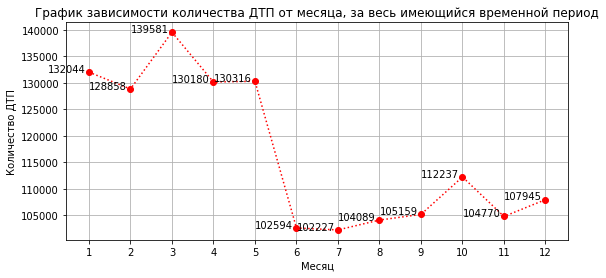

In [114]:
# строим график
plt.title('График зависимости количества ДТП от месяца, за весь имеющийся временной период')
plt.xlabel('Месяц')
plt.xticks(df_month['month'])
plt.ylabel('Количество ДТП')
plt.rcParams["figure.figsize"] = (9, 4)
plt.plot(df_month['month'], df_month['count'], ':ro')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(df_month['month'], df_month['count'])
plt.grid()
plt.show()

Исходя из графика и имеющихся данных, можно сделать вывод о том, что в период с января по май наблюдается увеличение количества ДТП до 20%. Наибольшее количество аварий приходится на март месяц.

**1.6. Выясним зависимость суммы выплаченной страховки от типа аварии.**

In [115]:
# выгрузим данные
# напишем запрос
query = '''
SELECT TYPE_OF_COLLISION, 
       SUM(INSURANCE_PREMIUM) AS insurance
FROM collisions AS col
        JOIN parties AS part
        ON col.case_id = part.case_id
GROUP BY TYPE_OF_COLLISION
ORDER BY SUM(INSURANCE_PREMIUM) DESC
'''
# выполняем запрос
df_insurance = pd.read_sql_query(query, con=engine)
display(df_insurance)

,type_of_collision,insurance
0,rear end,37069380
1,broadside,20161228
2,sideswipe,14912524
3,hit object,8053095
4,other,4887363
5,head-on,3681962
6,overturned,1489670
7,None,684783


In [116]:
# заменим None на Unknown
df_insurance = df_insurance.replace(to_replace = np.nan, value = 'Unknown')

In [117]:
display(df_insurance)

,type_of_collision,insurance
0,rear end,37069380
1,broadside,20161228
2,sideswipe,14912524
3,hit object,8053095
4,other,4887363
5,head-on,3681962
6,overturned,1489670
7,Unknown,684783


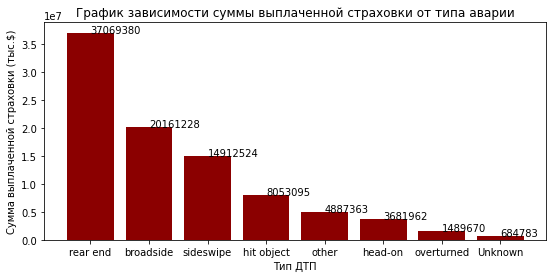

In [118]:
# строим график
fig, ax = plt.subplots()

ax.bar(df_insurance['type_of_collision'], df_insurance['insurance'], color = 'darkred')
ax.set_title('График зависимости суммы выплаченной страховки от типа аварии')
plt.xlabel('Тип ДТП')
plt.ylabel('Сумма выплаченной страховки (тыс.$)')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
addlabels(df_insurance['type_of_collision'], df_insurance['insurance'])
plt.show()

Страховые выплаты по авариям, где произошло столкновение задней частью автомобиля, в 2 раза и более превышают выплаты по другим типам аварий и составляет 37 069 380 (тыс.$).

На втором месте по величине страховых выплат идет боковое столкновение 20 161 228 (тыс.$).

**1.7. Выясним влияние освещения на тип участника происшествия.**

In [119]:
# выгрузим данные
# напишем запрос
query = '''
SELECT PARTY_TYPE,
        COUNT(PARTY_TYPE),
        lighting
FROM collisions AS col
        JOIN parties AS part
        ON col.case_id = part.case_id
WHERE party_type != 'None' AND lighting != 'None'
GROUP BY PARTY_TYPE, lighting 
ORDER BY lighting, count DESC
'''
# выполняем запрос
df_light = pd.read_sql_query(query, con=engine)
display(df_light)

,party_type,count,lighting
0,car,155827,dark with no street lights
1,road bumper,9839,dark with no street lights
2,road signs,2421,dark with no street lights
3,other,1639,dark with no street lights
4,building,796,dark with no street lights
5,car,460171,dark with street lights
6,road bumper,76752,dark with street lights
7,road signs,13876,dark with street lights
8,building,7542,dark with street lights
9,other,2680,dark with street lights


In [120]:
# функция подписи столбцов
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

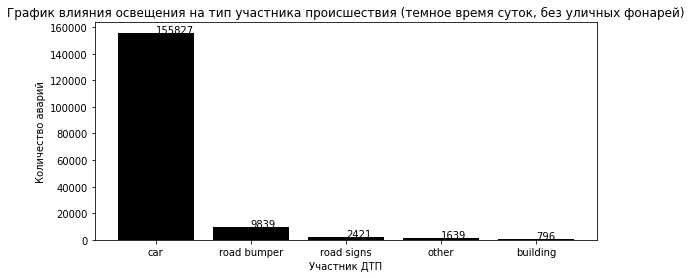

In [121]:
# строим график
fig, ax = plt.subplots()

ax.bar(df_light[0:5]['party_type'], df_light[0:5]['count'], color = 'black')
ax.set_title('График влияния освещения на тип участника происшествия (темное время суток, без уличных фонарей)')
plt.xlabel('Участник ДТП')
plt.ylabel('Количество аварий')
addlabels(df_light[0:5]['party_type'], df_light[0:5]['count'])
plt.show()

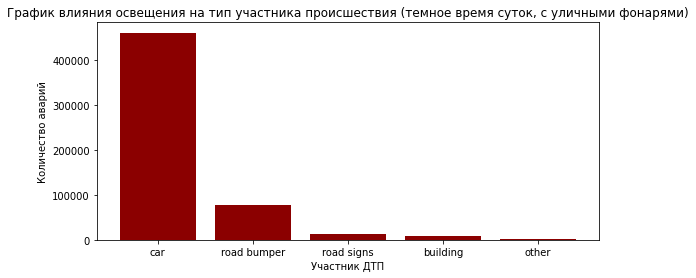

In [122]:
fig, ax = plt.subplots()
ax.bar(df_light[5:10]['party_type'], df_light[5:10]['count'], color = 'darkred')
ax.set_title('График влияния освещения на тип участника происшествия (темное время суток, с уличными фонарями)')
plt.xlabel('Участник ДТП')
plt.ylabel('Количество аварий')
#addlabels(df_light[5:10]['party_type'], df_light[5:10]['count'])
plt.show()

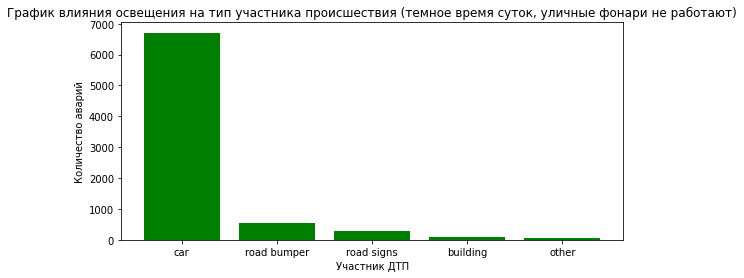

In [123]:
fig, ax = plt.subplots()
ax.bar(df_light[10:15]['party_type'], df_light[10:15]['count'], color = 'green')
ax.set_title('График влияния освещения на тип участника происшествия (темное время суток, уличные фонари не работают)')
plt.xlabel('Участник ДТП')
plt.ylabel('Количество аварий')
#addlabels(df_light[10:15]['party_type'], df_light[10:15]['count'])
plt.show()

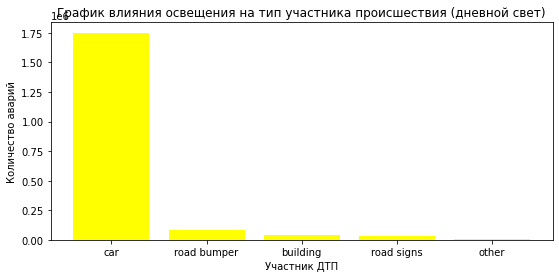

In [124]:
fig, ax = plt.subplots()
ax.bar(df_light[15:20]['party_type'], df_light[15:20]['count'], color = 'yellow')
ax.set_title('График влияния освещения на тип участника происшествия (дневной свет)')
plt.xlabel('Участник ДТП')
plt.ylabel('Количество аварий')
#addlabels(df_light[15:20]['party_type'], df_light[15:20]['count'])
plt.show()

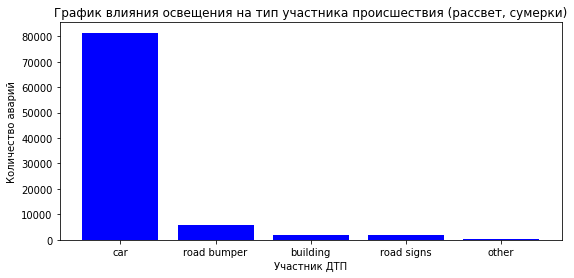

In [125]:
fig, ax = plt.subplots()
ax.bar(df_light[20:25]['party_type'], df_light[20:25]['count'], color = 'blue')
ax.set_title('График влияния освещения на тип участника происшествия (рассвет, сумерки)')
plt.xlabel('Участник ДТП')
plt.ylabel('Количество аварий')
#addlabels(df_light[20:25]['party_type'], df_light[20:25]['count'])
plt.show()

Очевидно, что при любом типе освещения подавляющее количество аварий между транспортными средствами, затем автотранспортных средств и дорожных знаков. В темное время суток авариии с участием отбойников случаются чаще, чем в светлое время суток. При этом в светлое время наблюдается увеличение количества аварий с участием строений, по сравнению с темным временем суток.

## Модель для оценки водительского риска

Создадим датафрейм для дальнейшего исследования.

Выберем данные из следующих столбцов, так как они характеризуют аварию и факторы, которые могут увеличивать риск ДТП:
- at_fault - целевой признак - виновность участника,
- COLLISION_DAMAGE - серьёзность происшествия,
- ROAD_SURFACE - состояние дороги,
- LIGHTING - освещенность,
- PCF_VIOLATION_CATEGORY - категория нарушения,
- TYPE_OF_COLLISION - тип аварии,
- MOTOR_VEHICLE_INVOLVED_WITH - дополнительные участники ДТП,
- ROAD_CONDITION_1 - дорожное состояние,
- PARTY_DRUG_PHYSICAL - состояние участника: физическое или с учётом принятых лекарств,
- PARTY_SOBRIETY - трезвость участника,
- CELLPHONE_IN_USE - наличие телефона в автомобиле (возможности разговаривать по громкой связи),
- VEHICLE_TYPE - тип кузова,
- VEHICLE_TRANSMISSION - тип КПП,
- VEHICLE_AGE - возраст автомобиля в годах.

In [126]:
# выгрузим данные 
# напишем запрос
query = '''
SELECT  part.at_fault,
        col.COLLISION_DAMAGE,
        col.ROAD_SURFACE,
        col.LIGHTING,
        col.PCF_VIOLATION_CATEGORY,
        col.TYPE_OF_COLLISION,
        col.MOTOR_VEHICLE_INVOLVED_WITH,
        col.ROAD_CONDITION_1,
        part.PARTY_DRUG_PHYSICAL,
        part.PARTY_SOBRIETY,
        part.CELLPHONE_IN_USE,
        veh.VEHICLE_TYPE,
        veh.VEHICLE_TRANSMISSION,
        veh.VEHICLE_AGE
FROM collisions AS col
        JOIN parties AS part
        ON col.case_id = part.case_id
        JOIN Vehicles AS veh
        ON col.case_id = veh.case_id
WHERE (part.PARTY_TYPE = 'car') AND (col.COLLISION_DAMAGE <> 'scratch') AND 
                                  (EXTRACT('year' FROM col.COLLISION_DATE) = 2012)                                     
'''
# выполняем запрос
df = pd.read_sql_query(query, con=engine)
display(df)

,at_fault,collision_damage,road_surface,lighting,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_condition_1,party_drug_physical,party_sobriety,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
0,1,fatal,dry,dark with street lights,dui,hit object,fixed object,loose material,under drug influence,"had been drinking, under influence",0.0,sedan,manual,3.0
1,1,fatal,dry,daylight,improper turning,hit object,fixed object,normal,None,had not been drinking,0.0,coupe,auto,13.0
2,1,fatal,dry,dark with street lights,dui,hit object,fixed object,normal,None,"had been drinking, under influence",NaN,coupe,manual,6.0
3,0,fatal,dry,dark with no street lights,wrong side of road,head-on,other motor vehicle,normal,None,had not been drinking,0.0,coupe,manual,6.0
4,0,fatal,dry,dark with no street lights,wrong side of road,head-on,other motor vehicle,normal,None,had not been drinking,0.0,coupe,manual,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118406,0,middle damage,dry,daylight,speeding,rear end,other motor vehicle,normal,None,had not been drinking,0.0,sedan,auto,1.0
118407,1,middle damage,dry,daylight,speeding,rear end,other motor vehicle,normal,None,had not been drinking,0.0,sedan,manual,0.0
118408,1,middle damage,dry,daylight,speeding,rear end,other motor vehicle,normal,None,had not been drinking,0.0,coupe,manual,5.0
118409,0,middle damage,dry,daylight,speeding,rear end,other motor vehicle,normal,None,had not been drinking,0.0,sedan,manual,0.0


### Предобработка данных 

In [127]:
# начнем знакомство с датафреймом с проверки наличия дубликатов
display(f'Количество дубликатов в датафрейме: {df.duplicated().sum()}')

'Количество дубликатов в датафрейме: 76167'

In [128]:
# удалим дубликаты и еще раз проверим их наличие
df = df.drop_duplicates()
display(f'Количество дубликатов в датафрейме: {df.duplicated().sum()}')

'Количество дубликатов в датафрейме: 0'

In [129]:
display('Общая информация о датафрейме:') 
df.info()

'Общая информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42244 entries, 0 to 118401
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   at_fault                     42244 non-null  int64  
 1   collision_damage             42244 non-null  object 
 2   road_surface                 41624 non-null  object 
 3   lighting                     41970 non-null  object 
 4   pcf_violation_category       41019 non-null  object 
 5   type_of_collision            41709 non-null  object 
 6   motor_vehicle_involved_with  41975 non-null  object 
 7   road_condition_1             41787 non-null  object 
 8   party_drug_physical          6698 non-null   object 
 9   party_sobriety               40758 non-null  object 
 10  cellphone_in_use             34602 non-null  float64
 11  vehicle_type                 42244 non-null  object 
 12  vehicle_transmission         40884 non-null  object 
 13  vehicle_age    

Целевой признак - at_fault - категориальный, целочисленный. Столбцы cellphone_in_use и vehicle_age содержат числа формата float64. Изменим числа в столбце cellphone_in_use на тип int.

In [130]:
display('Количество пропущенных значений в столбцах датафрейма:') 
df.isnull().sum()

'Количество пропущенных значений в столбцах датафрейма:'

at_fault                           0
collision_damage                   0
road_surface                     620
lighting                         274
pcf_violation_category          1225
type_of_collision                535
motor_vehicle_involved_with      269
road_condition_1                 457
party_drug_physical            35546
party_sobriety                  1486
cellphone_in_use                7642
vehicle_type                       0
vehicle_transmission            1360
vehicle_age                     1575
dtype: int64

Заполним пропуски или удалим некоторые строки, где есть пропущенные значения.

Удалим строки с пропусками с столбцах "Состояние дороги" (road_surface), "освещенность" (lighting), "категория нарушения" (pcf_violation_category), "тип аварии" (type_of_collision), "дополнительные участники ДТП" (motor_vehicle_involved_with), "дорожное состояние" (road_condition_1), "возраст автомобиля в годах" (vehicle_age), так как заполнение случайными данными может исказить датасет. Потеря строк составит 10% от общего количества.

In [131]:
# заменим None в датасете на NaN
df = df.fillna(value=np.nan)

In [132]:
# удалим строки, в которых есть пропуски
df = df.dropna(subset=['road_surface', 'lighting', 'pcf_violation_category', 'type_of_collision', 'motor_vehicle_involved_with',
                      'road_condition_1', 'vehicle_age'], axis=0)

In [133]:
display('Количество пропущенных значений в столбцах датафрейма:') 
df.isnull().sum()

'Количество пропущенных значений в столбцах датафрейма:'

at_fault                           0
collision_damage                   0
road_surface                       0
lighting                           0
pcf_violation_category             0
type_of_collision                  0
motor_vehicle_involved_with        0
road_condition_1                   0
party_drug_physical            31768
party_sobriety                  1280
cellphone_in_use                6500
vehicle_type                       0
vehicle_transmission             951
vehicle_age                        0
dtype: int64

In [134]:
# посмотрим уникальные значения столбца "Состояние участника: физическое или с учётом принятых лекарств" (party_drug_physical)
# справка по значениям в столбце:
# Состояние участника: физическое или с учётом принятых лекарств PARTY_DRUG_PHYSICAL:
# E — Under Drug Influence (Под воздействием лекарств)
# F — Impairment — Physical (Ухудшение состояния)
# G — Impairment Unknown (Не известно)
# H — Not Applicable (Не оценивался)
# I — Sleepy/Fatigued (Сонный/Усталый)
# — Not Stated (Не указано)

df['party_drug_physical'].unique()

array(['under drug influence', nan, 'G', 'sleepy/fatigued',
       'not applicable', 'impairment - physical'], dtype=object)

В столбце "Состояние участника: физическое или с учётом принятых лекарств" (party_drug_physical) заменим пропущенные значения на 'not applicable' (Не оценивался):

In [135]:
df['party_drug_physical'] = df['party_drug_physical'].fillna('not applicable')

In [136]:
# посмотрим уникальные значения столбца "Трезвость участника" (party_sobriety)
# справка по значениям в столбце:
# Трезвость участника PARTY_SOBRIETY:
# A — Had Not Been Drinking (Не пил)
# B — Had Been Drinking, Under Influence (Был пьян, под влиянием)
# C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)
# D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)
# G — Impairment Unknown (Неизвестно ухудшение)
# H — Not Applicable (Не оценивался)
# — Not Stated (Не указано)

df['party_sobriety'].unique()

array(['had been drinking, under influence', 'had not been drinking',
       'impairment unknown', nan,
       'had been drinking, not under influence',
       'had been drinking, impairment unknown', 'not applicable'],
      dtype=object)

В столбце "Трезвость участника" (party_sobriety) заменим пропущенные значения на 'not applicable' (Не оценивался):

In [137]:
df['party_sobriety'] = df['party_sobriety'].fillna('not applicable')

In [138]:
# посмотрим уникальные значения столбца "Наличие телефона в автомобиле (возможности разговаривать по громкой связи)" (cellphone_in_use)
df['cellphone_in_use'].unique()

array([ 0., nan,  1.])

In [139]:
# посмотрим количество значений 1 и 0:
df['cellphone_in_use'].value_counts()

0.0    29918
1.0     1442
Name: cellphone_in_use, dtype: int64

В столбце "Наличие телефона в автомобиле (возможности разговаривать по громкой связи)" (cellphone_in_use) заменим пропущенные значения на '0', по большинству значений в столбце:

In [140]:
df['cellphone_in_use'] = df['cellphone_in_use'].fillna(0.0)

In [141]:
# посмотрим уникальные значения столбца "Тип КПП" (vehicle_transmission)
df['vehicle_transmission'].unique()

array(['manual', 'auto', nan], dtype=object)

In [142]:
# посмотрим количество значений 'manual' и 'auto':
df['vehicle_transmission'].value_counts()

manual    20406
auto      16503
Name: vehicle_transmission, dtype: int64

В столбце "Тип КПП" (vehicle_transmission) заменим пропущенные значения на те, которые чаще всего встречаются в зависимости от типа кузова:

In [143]:
df["vehicle_transmission"] = df.groupby("vehicle_type")["vehicle_transmission"].apply(lambda x: x.fillna(x.mode().iat[0]))

In [144]:
display('Количество пропущенных значений в столбцах датафрейма:') 
df.isnull().sum()

'Количество пропущенных значений в столбцах датафрейма:'

at_fault                       0
collision_damage               0
road_surface                   0
lighting                       0
pcf_violation_category         0
type_of_collision              0
motor_vehicle_involved_with    0
road_condition_1               0
party_drug_physical            0
party_sobriety                 0
cellphone_in_use               0
vehicle_type                   0
vehicle_transmission           0
vehicle_age                    0
dtype: int64

Проверим столбцы на наличие уникальных значений. Удостоверимся, что данные уникальны и не имеют разной записи.

In [145]:
df['at_fault'].unique()

array([1, 0], dtype=int64)

In [146]:
df['collision_damage'].unique()

array(['fatal', 'severe damage', 'middle damage', 'small damage'],
      dtype=object)

In [147]:
df['road_surface'].unique()

array(['dry', 'wet', 'snowy', 'slippery'], dtype=object)

In [148]:
df['lighting'].unique()

array(['dark with street lights', 'daylight',
       'dark with no street lights', 'dusk or dawn',
       'dark with street lights not functioning'], dtype=object)

In [149]:
df['pcf_violation_category'].unique()

array(['dui', 'improper turning', 'wrong side of road',
       'pedestrian violation', 'improper passing',
       'pedestrian right of way', 'traffic signals and signs', 'speeding',
       'unknown', 'other hazardous violation', 'automobile right of way',
       'following too closely', 'unsafe lane change',
       'other than driver (or pedestrian)', 'unsafe starting or backing',
       'impeding traffic', 'other improper driving', 'lights',
       'other equipment', 'brakes', 'hazardous parking', 'fell asleep'],
      dtype=object)

In [150]:
df['type_of_collision'].unique()

array(['hit object', 'head-on', 'other', 'broadside', 'rear end',
       'sideswipe', 'overturned'], dtype=object)

In [151]:
df['motor_vehicle_involved_with'].unique()

array(['fixed object', 'other motor vehicle', 'other object', 'bicycle',
       'non-collision', 'parked motor vehicle',
       'motor vehicle on other roadway', 'animal', 'train'], dtype=object)

In [152]:
df['road_condition_1'].unique()

array(['loose material', 'normal', 'obstruction', 'construction', 'other',
       'reduced width', 'flooded', 'holes'], dtype=object)

In [153]:
df['party_drug_physical'].unique()

array(['under drug influence', 'not applicable', 'G', 'sleepy/fatigued',
       'impairment - physical'], dtype=object)

In [154]:
df['party_sobriety'].unique()

array(['had been drinking, under influence', 'had not been drinking',
       'impairment unknown', 'not applicable',
       'had been drinking, not under influence',
       'had been drinking, impairment unknown'], dtype=object)

In [155]:
df['cellphone_in_use'].unique()

array([0., 1.])

In [156]:
df['vehicle_type'].unique()

array(['sedan', 'coupe', 'hatchback', 'minivan', 'other'], dtype=object)

In [157]:
df['vehicle_transmission'].unique()

array(['manual', 'auto'], dtype=object)

In [158]:
df['vehicle_age'].unique()

array([  3.,  13.,   6.,  10.,   2.,   5.,  11.,   8.,  12.,   0.,   4.,
         9.,   7.,   1.,  14.,  16.,  15.,  17.,  19., 161.])

Во всех столбцах кроме at_fault, cellphone_in_use и vehicle_age находятся текстовые данные. В столбцах at_fault и cellphone_in_use бинарные данные. А вот в столбце vehicle_age мы можем наблюдать выброс - значение 161. Избавимся от него.

In [159]:
df = df.query('vehicle_age < 30')

In [160]:
df['vehicle_age'].unique()

array([ 3., 13.,  6., 10.,  2.,  5., 11.,  8., 12.,  0.,  4.,  9.,  7.,
        1., 14., 16., 15., 17., 19.])

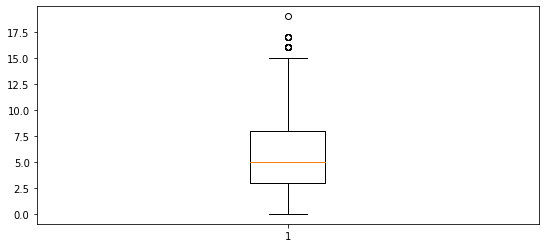

In [161]:
plt.boxplot(df['vehicle_age']);

Посмотрим сколько строк со значениями от 15 в столбце 'vehicle_age':

In [162]:
display('Количество строк', len(df.query('vehicle_age > 15')))
display(df.query('vehicle_age > 15'))

'Количество строк'

20

,at_fault,collision_damage,road_surface,lighting,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_condition_1,party_drug_physical,party_sobriety,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age
163,1,small damage,dry,daylight,speeding,rear end,other motor vehicle,normal,not applicable,had not been drinking,0.0,sedan,manual,16.0
4094,1,small damage,dry,daylight,improper turning,sideswipe,other motor vehicle,normal,not applicable,had not been drinking,0.0,sedan,manual,16.0
4096,0,small damage,dry,daylight,improper turning,sideswipe,other motor vehicle,normal,not applicable,had not been drinking,0.0,sedan,manual,16.0
8198,0,small damage,dry,daylight,speeding,rear end,other motor vehicle,normal,not applicable,had not been drinking,0.0,sedan,manual,16.0
10066,1,small damage,wet,dark with street lights,improper turning,broadside,other motor vehicle,normal,not applicable,not applicable,0.0,sedan,manual,17.0
10067,0,small damage,wet,dark with street lights,improper turning,broadside,other motor vehicle,normal,not applicable,not applicable,0.0,sedan,manual,17.0
17585,0,middle damage,dry,daylight,other improper driving,other,other object,normal,not applicable,had not been drinking,0.0,hatchback,auto,16.0
20674,1,middle damage,dry,daylight,pedestrian right of way,other,other object,normal,not applicable,had not been drinking,0.0,sedan,manual,19.0
46642,0,fatal,dry,daylight,pedestrian violation,other,other object,normal,not applicable,had not been drinking,0.0,hatchback,manual,16.0
56782,1,small damage,wet,daylight,unsafe lane change,sideswipe,other motor vehicle,normal,not applicable,had not been drinking,0.0,sedan,auto,17.0


Удалим эти 20 строк как выбросы, для учшего обучения модели.

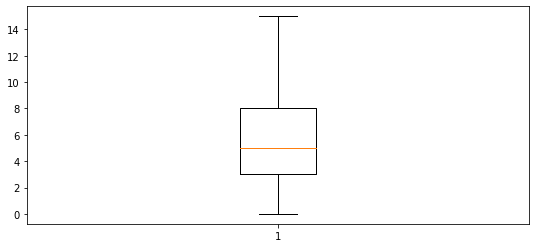

In [163]:
df = df.query('vehicle_age < 16')
plt.boxplot(df['vehicle_age']);

In [164]:
# проверим еще раз наличие дубликатов и если они есть, то избавимся от них.
display(f'Количество дубликатов в датафрейме: {df.duplicated().sum()}')

'Количество дубликатов в датафрейме: 3522'

In [165]:
df = df.drop_duplicates()
display(f'Количество дубликатов в датафрейме: {df.duplicated().sum()}')

'Количество дубликатов в датафрейме: 0'

### Подготовка обучающей и тестовой выборок, масштабирование

In [166]:
x = df.drop('at_fault', axis=1)
y = df['at_fault']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 43) 

Закодируем признаки:

In [168]:
# соберем в список категориальные данные
cat_col = [
        i for i in x_train.dtypes.index if x_train.dtypes[i] == 'object'
    ]
cat_col

['collision_damage',
 'road_surface',
 'lighting',
 'pcf_violation_category',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'road_condition_1',
 'party_drug_physical',
 'party_sobriety',
 'vehicle_type',
 'vehicle_transmission']

In [169]:
# соберем в список количественные данные
num_col = [
        i for i in x_train.dtypes.index if x_train.dtypes[i] != 'object'
    ]
num_col

['cellphone_in_use', 'vehicle_age']

In [170]:
# Инициализация 
enc = OneHotEncoder(handle_unknown='ignore')

cat_x_train = x_train[cat_col]
cat_x_test = x_test[cat_col]

enc.fit(cat_x_train)

OneHotEncoder(handle_unknown='ignore')

In [171]:
cat_x_train = pd.DataFrame(
    enc.transform(cat_x_train).toarray(), 
    columns=enc.get_feature_names(cat_col)
                                  )
cat_x_train.head(3)

,collision_damage_fatal,collision_damage_middle damage,collision_damage_severe damage,collision_damage_small damage,road_surface_dry,road_surface_slippery,road_surface_snowy,road_surface_wet,lighting_dark with no street lights,lighting_dark with street lights,...,party_sobriety_had not been drinking,party_sobriety_impairment unknown,party_sobriety_not applicable,vehicle_type_coupe,vehicle_type_hatchback,vehicle_type_minivan,vehicle_type_other,vehicle_type_sedan,vehicle_transmission_auto,vehicle_transmission_manual
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [172]:
cat_x_test = pd.DataFrame(
    enc.transform(cat_x_test).toarray(), 
    columns=enc.get_feature_names(cat_col)
                                  )
cat_x_test.head(3)

,collision_damage_fatal,collision_damage_middle damage,collision_damage_severe damage,collision_damage_small damage,road_surface_dry,road_surface_slippery,road_surface_snowy,road_surface_wet,lighting_dark with no street lights,lighting_dark with street lights,...,party_sobriety_had not been drinking,party_sobriety_impairment unknown,party_sobriety_not applicable,vehicle_type_coupe,vehicle_type_hatchback,vehicle_type_minivan,vehicle_type_other,vehicle_type_sedan,vehicle_transmission_auto,vehicle_transmission_manual
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [173]:
# Инициализация стандартизатора
scaler = StandardScaler()

# Передача датасета и преобразование
scaler.fit(x_train[num_col])
x_train[num_col] = scaler.transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

In [174]:
# удаляем категориальные данные из датафреймов для последующего объединения с кодированными признаками
x_train = x_train.drop(cat_col, axis=1)
x_test = x_test.drop(cat_col, axis=1)
x_train.head()

,cellphone_in_use,vehicle_age
63699,-0.208534,2.605635
37666,-0.208534,0.170643
15579,-0.208534,1.083765
5717,-0.208534,1.388139
66492,-0.208534,0.779391


In [175]:
# сбросим индексы для последующего корректного объединения данных и удалим ненужный столбец "index"
x_train = x_train.reset_index()
x_train = x_train.drop(columns=['index'], axis=1)
x_train.head()

,cellphone_in_use,vehicle_age
0,-0.208534,2.605635
1,-0.208534,0.170643
2,-0.208534,1.083765
3,-0.208534,1.388139
4,-0.208534,0.779391


In [176]:
# сбросим индексы для последующего корректного объединения данных и удалим ненужный столбец "index"
x_test = x_test.reset_index()
x_test = x_test.drop(columns=['index'], axis=1)
x_test.head()

,cellphone_in_use,vehicle_age
0,-0.208534,-0.438105
1,-0.208534,-0.438105
2,-0.208534,0.170643
3,-0.208534,0.475017
4,-0.208534,-0.438105


In [177]:
# объединяем с кодированными категориальными признаками и проверяем наличие пропусков
x_train = pd.concat((x_train, cat_x_train), axis=1)
print(sum(x_train.isnull().sum()))

0


In [178]:
# объединяем с кодированными категориальными признаками и проверяем наличие пропусков
x_test = pd.concat((x_test, cat_x_test), axis=1)
print(sum(x_test.isnull().sum()))

0


In [179]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 79 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   cellphone_in_use                                            6863 non-null   float64
 1   vehicle_age                                                 6863 non-null   float64
 2   collision_damage_fatal                                      6863 non-null   float64
 3   collision_damage_middle damage                              6863 non-null   float64
 4   collision_damage_severe damage                              6863 non-null   float64
 5   collision_damage_small damage                               6863 non-null   float64
 6   road_surface_dry                                            6863 non-null   float64
 7   road_surface_slippery                                       6863 non-null   float64
 8 

In [180]:
x_train.head(5)

,cellphone_in_use,vehicle_age,collision_damage_fatal,collision_damage_middle damage,collision_damage_severe damage,collision_damage_small damage,road_surface_dry,road_surface_slippery,road_surface_snowy,road_surface_wet,...,party_sobriety_had not been drinking,party_sobriety_impairment unknown,party_sobriety_not applicable,vehicle_type_coupe,vehicle_type_hatchback,vehicle_type_minivan,vehicle_type_other,vehicle_type_sedan,vehicle_transmission_auto,vehicle_transmission_manual
0,-0.208534,2.605635,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.208534,0.170643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.208534,1.083765,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.208534,1.388139,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.208534,0.779391,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [181]:
x_test.head(5)

,cellphone_in_use,vehicle_age,collision_damage_fatal,collision_damage_middle damage,collision_damage_severe damage,collision_damage_small damage,road_surface_dry,road_surface_slippery,road_surface_snowy,road_surface_wet,...,party_sobriety_had not been drinking,party_sobriety_impairment unknown,party_sobriety_not applicable,vehicle_type_coupe,vehicle_type_hatchback,vehicle_type_minivan,vehicle_type_other,vehicle_type_sedan,vehicle_transmission_auto,vehicle_transmission_manual
0,-0.208534,-0.438105,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.208534,-0.438105,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.208534,0.170643,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.208534,0.475017,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.208534,-0.438105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [182]:
x_train_ml = x_train
x_test_ml = x_test
y_train_ml = y_train
y_test_ml = y_test

In [183]:
x_train_n = torch.FloatTensor(x_train.values)
x_test_n = torch.FloatTensor(x_test.values)
y_train_n = torch.FloatTensor(y_train.values)
y_test_n = torch.FloatTensor(y_test.values)

In [184]:
x_train_nb = torch.FloatTensor(x_train.values)
x_test_nb = torch.FloatTensor(x_test.values)
y_train_nb = torch.FloatTensor(y_train.values)
y_test_nb = torch.FloatTensor(y_test.values)

In [185]:
x_train.shape

(27451, 79)

In [186]:
x_test.shape

(6863, 79)

In [187]:
display(x_test)

,cellphone_in_use,vehicle_age,collision_damage_fatal,collision_damage_middle damage,collision_damage_severe damage,collision_damage_small damage,road_surface_dry,road_surface_slippery,road_surface_snowy,road_surface_wet,...,party_sobriety_had not been drinking,party_sobriety_impairment unknown,party_sobriety_not applicable,vehicle_type_coupe,vehicle_type_hatchback,vehicle_type_minivan,vehicle_type_other,vehicle_type_sedan,vehicle_transmission_auto,vehicle_transmission_manual
0,-0.208534,-0.438105,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.208534,-0.438105,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.208534,0.170643,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.208534,0.475017,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.208534,-0.438105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,-0.208534,-0.133731,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6859,-0.208534,-1.046853,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6860,-0.208534,0.779391,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6861,-0.208534,-1.351227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


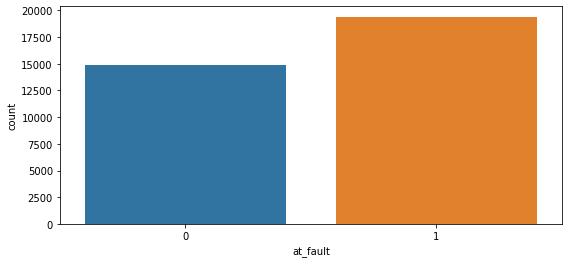

In [188]:
# проверим дисбаланс целевого признака
sns.countplot(x = 'at_fault', data = df);

Будем считать, что дисбаланса целевого признака нет

### Найдем лучшую модель

#### CatBoost

In [189]:
def objective(trial):
    max_depths = trial.suggest_int('max_depth', 1, 6, 1)
    n_estimators = trial.suggest_int('n_estimators', 300, 500, 50)
    
    clf = cb.CatBoostClassifier(n_estimators=n_estimators,
                                 max_depth=max_depths)
    score = cross_val_score(clf, x_train_ml, y_train_ml, scoring="accuracy").mean()

    return score

In [190]:
%%time
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2023-01-12 22:16:10,826] A new study created in memory with name: no-name-6621b2c8-e528-42c4-9e97-b03b986511cf


Learning rate set to 0.072754
0:	learn: 0.6757984	total: 217ms	remaining: 1m 48s
1:	learn: 0.6640906	total: 228ms	remaining: 56.9s
2:	learn: 0.6537130	total: 238ms	remaining: 39.4s
3:	learn: 0.6430967	total: 247ms	remaining: 30.6s
4:	learn: 0.6353037	total: 255ms	remaining: 25.2s
5:	learn: 0.6290862	total: 262ms	remaining: 21.6s
6:	learn: 0.6230357	total: 269ms	remaining: 18.9s
7:	learn: 0.6174576	total: 276ms	remaining: 17s
8:	learn: 0.6131437	total: 282ms	remaining: 15.4s
9:	learn: 0.6066993	total: 289ms	remaining: 14.2s
10:	learn: 0.6025590	total: 299ms	remaining: 13.3s
11:	learn: 0.5983517	total: 306ms	remaining: 12.5s
12:	learn: 0.5945356	total: 314ms	remaining: 11.8s
13:	learn: 0.5911663	total: 321ms	remaining: 11.2s
14:	learn: 0.5864519	total: 329ms	remaining: 10.6s
15:	learn: 0.5835166	total: 336ms	remaining: 10.2s
16:	learn: 0.5798149	total: 344ms	remaining: 9.76s
17:	learn: 0.5770535	total: 351ms	remaining: 9.4s
18:	learn: 0.5746803	total: 358ms	remaining: 9.07s
19:	learn: 0.

167:	learn: 0.5048696	total: 1.64s	remaining: 3.25s
168:	learn: 0.5048010	total: 1.65s	remaining: 3.24s
169:	learn: 0.5046863	total: 1.66s	remaining: 3.23s
170:	learn: 0.5045592	total: 1.67s	remaining: 3.22s
171:	learn: 0.5044841	total: 1.68s	remaining: 3.21s
172:	learn: 0.5042110	total: 1.69s	remaining: 3.2s
173:	learn: 0.5041320	total: 1.7s	remaining: 3.19s
174:	learn: 0.5040875	total: 1.71s	remaining: 3.17s
175:	learn: 0.5039599	total: 1.72s	remaining: 3.16s
176:	learn: 0.5039098	total: 1.73s	remaining: 3.15s
177:	learn: 0.5036750	total: 1.73s	remaining: 3.14s
178:	learn: 0.5036442	total: 1.74s	remaining: 3.13s
179:	learn: 0.5035473	total: 1.75s	remaining: 3.11s
180:	learn: 0.5034841	total: 1.76s	remaining: 3.1s
181:	learn: 0.5034552	total: 1.77s	remaining: 3.09s
182:	learn: 0.5033579	total: 1.77s	remaining: 3.08s
183:	learn: 0.5032625	total: 1.78s	remaining: 3.06s
184:	learn: 0.5031901	total: 1.79s	remaining: 3.05s
185:	learn: 0.5029901	total: 1.8s	remaining: 3.04s
186:	learn: 0.50

348:	learn: 0.4935397	total: 3.25s	remaining: 1.41s
349:	learn: 0.4935124	total: 3.26s	remaining: 1.4s
350:	learn: 0.4934756	total: 3.27s	remaining: 1.39s
351:	learn: 0.4934647	total: 3.27s	remaining: 1.38s
352:	learn: 0.4934277	total: 3.28s	remaining: 1.37s
353:	learn: 0.4933731	total: 3.29s	remaining: 1.36s
354:	learn: 0.4933253	total: 3.29s	remaining: 1.35s
355:	learn: 0.4932809	total: 3.3s	remaining: 1.33s
356:	learn: 0.4932408	total: 3.31s	remaining: 1.32s
357:	learn: 0.4932066	total: 3.32s	remaining: 1.31s
358:	learn: 0.4931762	total: 3.32s	remaining: 1.3s
359:	learn: 0.4931349	total: 3.33s	remaining: 1.29s
360:	learn: 0.4930933	total: 3.34s	remaining: 1.28s
361:	learn: 0.4930790	total: 3.35s	remaining: 1.27s
362:	learn: 0.4930530	total: 3.35s	remaining: 1.26s
363:	learn: 0.4930355	total: 3.36s	remaining: 1.25s
364:	learn: 0.4929967	total: 3.37s	remaining: 1.25s
365:	learn: 0.4929424	total: 3.37s	remaining: 1.24s
366:	learn: 0.4928968	total: 3.38s	remaining: 1.23s
367:	learn: 0.4

23:	learn: 0.5628657	total: 226ms	remaining: 4.48s
24:	learn: 0.5613622	total: 233ms	remaining: 4.43s
25:	learn: 0.5590117	total: 241ms	remaining: 4.39s
26:	learn: 0.5573954	total: 249ms	remaining: 4.37s
27:	learn: 0.5559330	total: 257ms	remaining: 4.34s
28:	learn: 0.5527170	total: 266ms	remaining: 4.32s
29:	learn: 0.5517207	total: 274ms	remaining: 4.29s
30:	learn: 0.5505172	total: 281ms	remaining: 4.25s
31:	learn: 0.5494345	total: 288ms	remaining: 4.21s
32:	learn: 0.5471680	total: 295ms	remaining: 4.17s
33:	learn: 0.5461962	total: 301ms	remaining: 4.13s
34:	learn: 0.5453011	total: 308ms	remaining: 4.1s
35:	learn: 0.5441618	total: 315ms	remaining: 4.07s
36:	learn: 0.5434036	total: 322ms	remaining: 4.03s
37:	learn: 0.5427708	total: 329ms	remaining: 3.99s
38:	learn: 0.5419294	total: 336ms	remaining: 3.97s
39:	learn: 0.5395053	total: 342ms	remaining: 3.94s
40:	learn: 0.5387646	total: 349ms	remaining: 3.91s
41:	learn: 0.5381422	total: 357ms	remaining: 3.89s
42:	learn: 0.5373992	total: 364m

204:	learn: 0.4979818	total: 1.86s	remaining: 2.67s
205:	learn: 0.4979225	total: 1.87s	remaining: 2.66s
206:	learn: 0.4978341	total: 1.88s	remaining: 2.65s
207:	learn: 0.4976728	total: 1.89s	remaining: 2.65s
208:	learn: 0.4975937	total: 1.89s	remaining: 2.64s
209:	learn: 0.4975353	total: 1.9s	remaining: 2.63s
210:	learn: 0.4974705	total: 1.91s	remaining: 2.62s
211:	learn: 0.4974224	total: 1.92s	remaining: 2.61s
212:	learn: 0.4972971	total: 1.93s	remaining: 2.6s
213:	learn: 0.4972536	total: 1.94s	remaining: 2.59s
214:	learn: 0.4971734	total: 1.95s	remaining: 2.59s
215:	learn: 0.4970849	total: 1.96s	remaining: 2.58s
216:	learn: 0.4970079	total: 1.97s	remaining: 2.57s
217:	learn: 0.4969343	total: 1.98s	remaining: 2.56s
218:	learn: 0.4967550	total: 1.99s	remaining: 2.56s
219:	learn: 0.4966850	total: 2s	remaining: 2.55s
220:	learn: 0.4966064	total: 2.02s	remaining: 2.54s
221:	learn: 0.4965635	total: 2.02s	remaining: 2.54s
222:	learn: 0.4965122	total: 2.04s	remaining: 2.53s
223:	learn: 0.496

377:	learn: 0.4890428	total: 3.46s	remaining: 1.11s
378:	learn: 0.4890107	total: 3.46s	remaining: 1.1s
379:	learn: 0.4889757	total: 3.47s	remaining: 1.09s
380:	learn: 0.4889205	total: 3.48s	remaining: 1.08s
381:	learn: 0.4889022	total: 3.48s	remaining: 1.08s
382:	learn: 0.4888520	total: 3.49s	remaining: 1.07s
383:	learn: 0.4888329	total: 3.5s	remaining: 1.06s
384:	learn: 0.4888105	total: 3.51s	remaining: 1.05s
385:	learn: 0.4887911	total: 3.52s	remaining: 1.04s
386:	learn: 0.4887723	total: 3.53s	remaining: 1.03s
387:	learn: 0.4887225	total: 3.53s	remaining: 1.02s
388:	learn: 0.4886630	total: 3.54s	remaining: 1.01s
389:	learn: 0.4886367	total: 3.55s	remaining: 1s
390:	learn: 0.4885917	total: 3.55s	remaining: 991ms
391:	learn: 0.4885623	total: 3.56s	remaining: 981ms
392:	learn: 0.4885073	total: 3.57s	remaining: 971ms
393:	learn: 0.4884851	total: 3.57s	remaining: 961ms
394:	learn: 0.4884519	total: 3.58s	remaining: 952ms
395:	learn: 0.4883892	total: 3.59s	remaining: 942ms
396:	learn: 0.488

42:	learn: 0.5346349	total: 400ms	remaining: 4.25s
43:	learn: 0.5340402	total: 411ms	remaining: 4.26s
44:	learn: 0.5334803	total: 424ms	remaining: 4.29s
45:	learn: 0.5328873	total: 436ms	remaining: 4.3s
46:	learn: 0.5314386	total: 447ms	remaining: 4.31s
47:	learn: 0.5310039	total: 458ms	remaining: 4.31s
48:	learn: 0.5305975	total: 469ms	remaining: 4.31s
49:	learn: 0.5296581	total: 480ms	remaining: 4.32s
50:	learn: 0.5292604	total: 490ms	remaining: 4.31s
51:	learn: 0.5287129	total: 500ms	remaining: 4.3s
52:	learn: 0.5276686	total: 509ms	remaining: 4.3s
53:	learn: 0.5272070	total: 520ms	remaining: 4.29s
54:	learn: 0.5264414	total: 529ms	remaining: 4.28s
55:	learn: 0.5259890	total: 537ms	remaining: 4.26s
56:	learn: 0.5255978	total: 547ms	remaining: 4.25s
57:	learn: 0.5253565	total: 555ms	remaining: 4.23s
58:	learn: 0.5251101	total: 564ms	remaining: 4.22s
59:	learn: 0.5246462	total: 572ms	remaining: 4.2s
60:	learn: 0.5243220	total: 581ms	remaining: 4.18s
61:	learn: 0.5238924	total: 590ms	r

214:	learn: 0.4967110	total: 2.03s	remaining: 2.69s
215:	learn: 0.4966513	total: 2.04s	remaining: 2.68s
216:	learn: 0.4965968	total: 2.05s	remaining: 2.67s
217:	learn: 0.4965185	total: 2.06s	remaining: 2.67s
218:	learn: 0.4964673	total: 2.07s	remaining: 2.66s
219:	learn: 0.4963864	total: 2.08s	remaining: 2.65s
220:	learn: 0.4963533	total: 2.09s	remaining: 2.64s
221:	learn: 0.4963160	total: 2.1s	remaining: 2.63s
222:	learn: 0.4962367	total: 2.11s	remaining: 2.62s
223:	learn: 0.4961750	total: 2.12s	remaining: 2.61s
224:	learn: 0.4960047	total: 2.13s	remaining: 2.6s
225:	learn: 0.4959693	total: 2.14s	remaining: 2.59s
226:	learn: 0.4958773	total: 2.15s	remaining: 2.58s
227:	learn: 0.4958208	total: 2.16s	remaining: 2.57s
228:	learn: 0.4957508	total: 2.17s	remaining: 2.56s
229:	learn: 0.4956801	total: 2.17s	remaining: 2.55s
230:	learn: 0.4956533	total: 2.18s	remaining: 2.54s
231:	learn: 0.4956182	total: 2.19s	remaining: 2.53s
232:	learn: 0.4955652	total: 2.2s	remaining: 2.52s
233:	learn: 0.4

377:	learn: 0.4886648	total: 3.47s	remaining: 1.12s
378:	learn: 0.4886411	total: 3.48s	remaining: 1.11s
379:	learn: 0.4885877	total: 3.49s	remaining: 1.1s
380:	learn: 0.4885422	total: 3.5s	remaining: 1.09s
381:	learn: 0.4884942	total: 3.51s	remaining: 1.08s
382:	learn: 0.4884765	total: 3.52s	remaining: 1.07s
383:	learn: 0.4884529	total: 3.52s	remaining: 1.06s
384:	learn: 0.4884323	total: 3.53s	remaining: 1.05s
385:	learn: 0.4883886	total: 3.54s	remaining: 1.04s
386:	learn: 0.4883573	total: 3.55s	remaining: 1.04s
387:	learn: 0.4883558	total: 3.56s	remaining: 1.03s
388:	learn: 0.4883316	total: 3.56s	remaining: 1.02s
389:	learn: 0.4882936	total: 3.57s	remaining: 1.01s
390:	learn: 0.4882438	total: 3.58s	remaining: 998ms
391:	learn: 0.4882138	total: 3.58s	remaining: 988ms
392:	learn: 0.4881631	total: 3.59s	remaining: 978ms
393:	learn: 0.4881421	total: 3.6s	remaining: 968ms
394:	learn: 0.4880509	total: 3.61s	remaining: 959ms
395:	learn: 0.4880346	total: 3.62s	remaining: 949ms
396:	learn: 0.4

45:	learn: 0.5359396	total: 401ms	remaining: 3.96s
46:	learn: 0.5352070	total: 411ms	remaining: 3.96s
47:	learn: 0.5347399	total: 421ms	remaining: 3.96s
48:	learn: 0.5340289	total: 430ms	remaining: 3.95s
49:	learn: 0.5334747	total: 440ms	remaining: 3.96s
50:	learn: 0.5324586	total: 449ms	remaining: 3.96s
51:	learn: 0.5318586	total: 466ms	remaining: 4.01s
52:	learn: 0.5314186	total: 475ms	remaining: 4.01s
53:	learn: 0.5309056	total: 481ms	remaining: 3.97s
54:	learn: 0.5290251	total: 489ms	remaining: 3.96s
55:	learn: 0.5284992	total: 498ms	remaining: 3.95s
56:	learn: 0.5280756	total: 507ms	remaining: 3.94s
57:	learn: 0.5278031	total: 515ms	remaining: 3.92s
58:	learn: 0.5273975	total: 521ms	remaining: 3.89s
59:	learn: 0.5271038	total: 529ms	remaining: 3.88s
60:	learn: 0.5267024	total: 537ms	remaining: 3.87s
61:	learn: 0.5263098	total: 546ms	remaining: 3.86s
62:	learn: 0.5260149	total: 555ms	remaining: 3.85s
63:	learn: 0.5256119	total: 562ms	remaining: 3.83s
64:	learn: 0.5252417	total: 570

222:	learn: 0.4977291	total: 2.01s	remaining: 2.49s
223:	learn: 0.4975836	total: 2.02s	remaining: 2.48s
224:	learn: 0.4975119	total: 2.02s	remaining: 2.47s
225:	learn: 0.4974134	total: 2.03s	remaining: 2.46s
226:	learn: 0.4973625	total: 2.04s	remaining: 2.45s
227:	learn: 0.4973286	total: 2.05s	remaining: 2.44s
228:	learn: 0.4972850	total: 2.06s	remaining: 2.44s
229:	learn: 0.4972120	total: 2.06s	remaining: 2.42s
230:	learn: 0.4971538	total: 2.07s	remaining: 2.41s
231:	learn: 0.4968941	total: 2.08s	remaining: 2.4s
232:	learn: 0.4968422	total: 2.09s	remaining: 2.39s
233:	learn: 0.4967039	total: 2.1s	remaining: 2.38s
234:	learn: 0.4966193	total: 2.1s	remaining: 2.37s
235:	learn: 0.4965733	total: 2.11s	remaining: 2.36s
236:	learn: 0.4965113	total: 2.12s	remaining: 2.35s
237:	learn: 0.4964717	total: 2.13s	remaining: 2.34s
238:	learn: 0.4964199	total: 2.13s	remaining: 2.33s
239:	learn: 0.4963983	total: 2.14s	remaining: 2.32s
240:	learn: 0.4963312	total: 2.15s	remaining: 2.31s
241:	learn: 0.4

382:	learn: 0.4897543	total: 3.36s	remaining: 1.03s
383:	learn: 0.4897146	total: 3.37s	remaining: 1.02s
384:	learn: 0.4896828	total: 3.38s	remaining: 1.01s
385:	learn: 0.4896298	total: 3.39s	remaining: 1s
386:	learn: 0.4895807	total: 3.4s	remaining: 992ms
387:	learn: 0.4895609	total: 3.4s	remaining: 983ms
388:	learn: 0.4895478	total: 3.41s	remaining: 974ms
389:	learn: 0.4894922	total: 3.42s	remaining: 965ms
390:	learn: 0.4894643	total: 3.43s	remaining: 956ms
391:	learn: 0.4894385	total: 3.44s	remaining: 948ms
392:	learn: 0.4894172	total: 3.45s	remaining: 939ms
393:	learn: 0.4894007	total: 3.46s	remaining: 930ms
394:	learn: 0.4893732	total: 3.47s	remaining: 922ms
395:	learn: 0.4893418	total: 3.48s	remaining: 913ms
396:	learn: 0.4892961	total: 3.48s	remaining: 904ms
397:	learn: 0.4892728	total: 3.5s	remaining: 896ms
398:	learn: 0.4892415	total: 3.5s	remaining: 887ms
399:	learn: 0.4892204	total: 3.51s	remaining: 879ms
400:	learn: 0.4891666	total: 3.52s	remaining: 870ms
401:	learn: 0.48914

44:	learn: 0.5342292	total: 399ms	remaining: 4.03s
45:	learn: 0.5337541	total: 410ms	remaining: 4.05s
46:	learn: 0.5329743	total: 420ms	remaining: 4.05s
47:	learn: 0.5324644	total: 430ms	remaining: 4.05s
48:	learn: 0.5316894	total: 437ms	remaining: 4.03s
49:	learn: 0.5311451	total: 447ms	remaining: 4.03s
50:	learn: 0.5302146	total: 457ms	remaining: 4.02s
51:	learn: 0.5297093	total: 465ms	remaining: 4.01s
52:	learn: 0.5293448	total: 476ms	remaining: 4.01s
53:	learn: 0.5285051	total: 487ms	remaining: 4.02s
54:	learn: 0.5274616	total: 501ms	remaining: 4.05s
55:	learn: 0.5271170	total: 512ms	remaining: 4.06s
56:	learn: 0.5267190	total: 524ms	remaining: 4.07s
57:	learn: 0.5262635	total: 536ms	remaining: 4.08s
58:	learn: 0.5258509	total: 548ms	remaining: 4.09s
59:	learn: 0.5254608	total: 560ms	remaining: 4.11s
60:	learn: 0.5251038	total: 572ms	remaining: 4.11s
61:	learn: 0.5245782	total: 583ms	remaining: 4.12s
62:	learn: 0.5241568	total: 595ms	remaining: 4.13s
63:	learn: 0.5237870	total: 609

221:	learn: 0.4983895	total: 2s	remaining: 2.5s
222:	learn: 0.4983416	total: 2.01s	remaining: 2.5s
223:	learn: 0.4982944	total: 2.02s	remaining: 2.49s
224:	learn: 0.4982563	total: 2.03s	remaining: 2.48s
225:	learn: 0.4981878	total: 2.03s	remaining: 2.46s
226:	learn: 0.4981403	total: 2.04s	remaining: 2.46s
227:	learn: 0.4980517	total: 2.05s	remaining: 2.45s
228:	learn: 0.4979941	total: 2.06s	remaining: 2.44s
229:	learn: 0.4979406	total: 2.07s	remaining: 2.43s
230:	learn: 0.4978674	total: 2.08s	remaining: 2.42s
231:	learn: 0.4978485	total: 2.09s	remaining: 2.42s
232:	learn: 0.4978216	total: 2.1s	remaining: 2.41s
233:	learn: 0.4977762	total: 2.11s	remaining: 2.4s
234:	learn: 0.4976766	total: 2.12s	remaining: 2.39s
235:	learn: 0.4975785	total: 2.14s	remaining: 2.4s
236:	learn: 0.4975248	total: 2.15s	remaining: 2.39s
237:	learn: 0.4974840	total: 2.16s	remaining: 2.38s
238:	learn: 0.4974125	total: 2.17s	remaining: 2.38s
239:	learn: 0.4973703	total: 2.19s	remaining: 2.37s
240:	learn: 0.497341

398:	learn: 0.4907288	total: 3.43s	remaining: 867ms
399:	learn: 0.4906983	total: 3.44s	remaining: 859ms
400:	learn: 0.4906442	total: 3.44s	remaining: 850ms
401:	learn: 0.4906065	total: 3.45s	remaining: 842ms
402:	learn: 0.4905995	total: 3.46s	remaining: 833ms
403:	learn: 0.4905325	total: 3.47s	remaining: 825ms
404:	learn: 0.4905190	total: 3.48s	remaining: 816ms
405:	learn: 0.4904602	total: 3.49s	remaining: 808ms
406:	learn: 0.4904447	total: 3.5s	remaining: 799ms
407:	learn: 0.4904158	total: 3.5s	remaining: 791ms
408:	learn: 0.4903820	total: 3.51s	remaining: 782ms
409:	learn: 0.4903445	total: 3.52s	remaining: 773ms
410:	learn: 0.4903188	total: 3.53s	remaining: 764ms
411:	learn: 0.4902893	total: 3.54s	remaining: 756ms
412:	learn: 0.4902250	total: 3.55s	remaining: 747ms
413:	learn: 0.4902111	total: 3.55s	remaining: 738ms
414:	learn: 0.4901848	total: 3.56s	remaining: 730ms
415:	learn: 0.4901516	total: 3.57s	remaining: 721ms
416:	learn: 0.4901249	total: 3.58s	remaining: 712ms
417:	learn: 0.

[I 2023-01-12 22:16:35,548] Trial 0 finished with value: 0.7007029817628383 and parameters: {'max_depth': 3, 'n_estimators': 500}. Best is trial 0 with value: 0.7007029817628383.


495:	learn: 0.4877350	total: 4.22s	remaining: 34ms
496:	learn: 0.4877123	total: 4.22s	remaining: 25.5ms
497:	learn: 0.4876908	total: 4.23s	remaining: 17ms
498:	learn: 0.4876614	total: 4.24s	remaining: 8.5ms
499:	learn: 0.4876331	total: 4.25s	remaining: 0us
Learning rate set to 0.116223
0:	learn: 0.6666972	total: 13.1ms	remaining: 3.91s
1:	learn: 0.6500853	total: 23.6ms	remaining: 3.51s
2:	learn: 0.6367913	total: 35.1ms	remaining: 3.48s
3:	learn: 0.6263831	total: 46.7ms	remaining: 3.46s
4:	learn: 0.6171214	total: 57.3ms	remaining: 3.38s
5:	learn: 0.6058856	total: 69.1ms	remaining: 3.38s
6:	learn: 0.6007416	total: 80.4ms	remaining: 3.37s
7:	learn: 0.5946419	total: 91.7ms	remaining: 3.35s
8:	learn: 0.5897947	total: 102ms	remaining: 3.31s
9:	learn: 0.5845844	total: 114ms	remaining: 3.3s
10:	learn: 0.5785550	total: 125ms	remaining: 3.27s
11:	learn: 0.5744691	total: 136ms	remaining: 3.25s
12:	learn: 0.5705180	total: 147ms	remaining: 3.25s
13:	learn: 0.5639809	total: 158ms	remaining: 3.23s
14

159:	learn: 0.4976584	total: 1.38s	remaining: 1.21s
160:	learn: 0.4973816	total: 1.39s	remaining: 1.2s
161:	learn: 0.4973025	total: 1.4s	remaining: 1.19s
162:	learn: 0.4972414	total: 1.41s	remaining: 1.19s
163:	learn: 0.4971506	total: 1.42s	remaining: 1.18s
164:	learn: 0.4970553	total: 1.43s	remaining: 1.17s
165:	learn: 0.4969933	total: 1.44s	remaining: 1.16s
166:	learn: 0.4969105	total: 1.45s	remaining: 1.15s
167:	learn: 0.4968646	total: 1.45s	remaining: 1.14s
168:	learn: 0.4968206	total: 1.46s	remaining: 1.13s
169:	learn: 0.4967877	total: 1.47s	remaining: 1.13s
170:	learn: 0.4965849	total: 1.48s	remaining: 1.12s
171:	learn: 0.4964936	total: 1.49s	remaining: 1.11s
172:	learn: 0.4964443	total: 1.5s	remaining: 1.1s
173:	learn: 0.4964235	total: 1.51s	remaining: 1.09s
174:	learn: 0.4963638	total: 1.51s	remaining: 1.08s
175:	learn: 0.4962907	total: 1.52s	remaining: 1.07s
176:	learn: 0.4962091	total: 1.53s	remaining: 1.06s
177:	learn: 0.4961932	total: 1.54s	remaining: 1.05s
178:	learn: 0.49

22:	learn: 0.5438289	total: 186ms	remaining: 2.25s
23:	learn: 0.5424830	total: 196ms	remaining: 2.25s
24:	learn: 0.5417880	total: 205ms	remaining: 2.26s
25:	learn: 0.5403809	total: 215ms	remaining: 2.27s
26:	learn: 0.5362914	total: 225ms	remaining: 2.27s
27:	learn: 0.5337830	total: 235ms	remaining: 2.28s
28:	learn: 0.5330523	total: 244ms	remaining: 2.28s
29:	learn: 0.5317787	total: 253ms	remaining: 2.28s
30:	learn: 0.5308744	total: 263ms	remaining: 2.28s
31:	learn: 0.5295139	total: 271ms	remaining: 2.27s
32:	learn: 0.5277385	total: 280ms	remaining: 2.27s
33:	learn: 0.5267095	total: 289ms	remaining: 2.26s
34:	learn: 0.5259233	total: 297ms	remaining: 2.25s
35:	learn: 0.5254715	total: 305ms	remaining: 2.24s
36:	learn: 0.5249358	total: 314ms	remaining: 2.23s
37:	learn: 0.5239576	total: 321ms	remaining: 2.21s
38:	learn: 0.5233711	total: 328ms	remaining: 2.2s
39:	learn: 0.5227380	total: 337ms	remaining: 2.19s
40:	learn: 0.5220586	total: 345ms	remaining: 2.18s
41:	learn: 0.5218935	total: 352m

185:	learn: 0.4916243	total: 1.58s	remaining: 967ms
186:	learn: 0.4915548	total: 1.58s	remaining: 958ms
187:	learn: 0.4915086	total: 1.59s	remaining: 950ms
188:	learn: 0.4914492	total: 1.6s	remaining: 941ms
189:	learn: 0.4914062	total: 1.61s	remaining: 933ms
190:	learn: 0.4913680	total: 1.62s	remaining: 925ms
191:	learn: 0.4912709	total: 1.63s	remaining: 916ms
192:	learn: 0.4911839	total: 1.64s	remaining: 907ms
193:	learn: 0.4911450	total: 1.64s	remaining: 898ms
194:	learn: 0.4910922	total: 1.65s	remaining: 889ms
195:	learn: 0.4910193	total: 1.66s	remaining: 880ms
196:	learn: 0.4909575	total: 1.67s	remaining: 871ms
197:	learn: 0.4908906	total: 1.67s	remaining: 862ms
198:	learn: 0.4907742	total: 1.68s	remaining: 854ms
199:	learn: 0.4907217	total: 1.69s	remaining: 845ms
200:	learn: 0.4905711	total: 1.7s	remaining: 836ms
201:	learn: 0.4905201	total: 1.71s	remaining: 828ms
202:	learn: 0.4904852	total: 1.72s	remaining: 820ms
203:	learn: 0.4904331	total: 1.73s	remaining: 813ms
204:	learn: 0.

66:	learn: 0.5091400	total: 553ms	remaining: 1.92s
67:	learn: 0.5090213	total: 563ms	remaining: 1.92s
68:	learn: 0.5089365	total: 573ms	remaining: 1.92s
69:	learn: 0.5087227	total: 584ms	remaining: 1.92s
70:	learn: 0.5086451	total: 594ms	remaining: 1.92s
71:	learn: 0.5083820	total: 603ms	remaining: 1.91s
72:	learn: 0.5082524	total: 612ms	remaining: 1.9s
73:	learn: 0.5076925	total: 621ms	remaining: 1.9s
74:	learn: 0.5075231	total: 629ms	remaining: 1.89s
75:	learn: 0.5072500	total: 638ms	remaining: 1.88s
76:	learn: 0.5071398	total: 646ms	remaining: 1.87s
77:	learn: 0.5068684	total: 654ms	remaining: 1.86s
78:	learn: 0.5066262	total: 663ms	remaining: 1.85s
79:	learn: 0.5065032	total: 671ms	remaining: 1.85s
80:	learn: 0.5062706	total: 680ms	remaining: 1.84s
81:	learn: 0.5057347	total: 689ms	remaining: 1.83s
82:	learn: 0.5053526	total: 696ms	remaining: 1.82s
83:	learn: 0.5050893	total: 705ms	remaining: 1.81s
84:	learn: 0.5048930	total: 714ms	remaining: 1.8s
85:	learn: 0.5048231	total: 722ms	

245:	learn: 0.4880504	total: 2.02s	remaining: 443ms
246:	learn: 0.4880068	total: 2.03s	remaining: 435ms
247:	learn: 0.4880047	total: 2.03s	remaining: 426ms
248:	learn: 0.4879628	total: 2.04s	remaining: 418ms
249:	learn: 0.4878947	total: 2.04s	remaining: 409ms
250:	learn: 0.4878312	total: 2.05s	remaining: 401ms
251:	learn: 0.4877976	total: 2.06s	remaining: 392ms
252:	learn: 0.4877335	total: 2.07s	remaining: 384ms
253:	learn: 0.4876496	total: 2.08s	remaining: 376ms
254:	learn: 0.4875841	total: 2.08s	remaining: 368ms
255:	learn: 0.4875323	total: 2.09s	remaining: 359ms
256:	learn: 0.4874833	total: 2.1s	remaining: 351ms
257:	learn: 0.4874268	total: 2.1s	remaining: 342ms
258:	learn: 0.4873931	total: 2.11s	remaining: 334ms
259:	learn: 0.4873702	total: 2.12s	remaining: 326ms
260:	learn: 0.4872550	total: 2.12s	remaining: 317ms
261:	learn: 0.4871174	total: 2.13s	remaining: 309ms
262:	learn: 0.4870353	total: 2.13s	remaining: 300ms
263:	learn: 0.4870048	total: 2.14s	remaining: 292ms
264:	learn: 0.

110:	learn: 0.5012057	total: 970ms	remaining: 1.65s
111:	learn: 0.5010266	total: 980ms	remaining: 1.64s
112:	learn: 0.5008919	total: 989ms	remaining: 1.64s
113:	learn: 0.5007676	total: 997ms	remaining: 1.63s
114:	learn: 0.5006296	total: 1s	remaining: 1.62s
115:	learn: 0.5001069	total: 1.01s	remaining: 1.61s
116:	learn: 0.4999705	total: 1.02s	remaining: 1.6s
117:	learn: 0.4997718	total: 1.03s	remaining: 1.59s
118:	learn: 0.4996996	total: 1.04s	remaining: 1.59s
119:	learn: 0.4994928	total: 1.05s	remaining: 1.58s
120:	learn: 0.4992835	total: 1.06s	remaining: 1.57s
121:	learn: 0.4990481	total: 1.07s	remaining: 1.56s
122:	learn: 0.4990124	total: 1.08s	remaining: 1.55s
123:	learn: 0.4989217	total: 1.09s	remaining: 1.54s
124:	learn: 0.4988437	total: 1.09s	remaining: 1.53s
125:	learn: 0.4985699	total: 1.1s	remaining: 1.52s
126:	learn: 0.4985211	total: 1.11s	remaining: 1.51s
127:	learn: 0.4984505	total: 1.12s	remaining: 1.5s
128:	learn: 0.4983025	total: 1.12s	remaining: 1.49s
129:	learn: 0.4981

283:	learn: 0.4869291	total: 2.59s	remaining: 146ms
284:	learn: 0.4868871	total: 2.6s	remaining: 137ms
285:	learn: 0.4868231	total: 2.61s	remaining: 128ms
286:	learn: 0.4867779	total: 2.62s	remaining: 119ms
287:	learn: 0.4867325	total: 2.63s	remaining: 110ms
288:	learn: 0.4866804	total: 2.64s	remaining: 101ms
289:	learn: 0.4866330	total: 2.65s	remaining: 91.4ms
290:	learn: 0.4866200	total: 2.66s	remaining: 82.3ms
291:	learn: 0.4865546	total: 2.67s	remaining: 73.2ms
292:	learn: 0.4865209	total: 2.68s	remaining: 64ms
293:	learn: 0.4864869	total: 2.69s	remaining: 54.9ms
294:	learn: 0.4864546	total: 2.7s	remaining: 45.8ms
295:	learn: 0.4863932	total: 2.71s	remaining: 36.6ms
296:	learn: 0.4863426	total: 2.72s	remaining: 27.4ms
297:	learn: 0.4863053	total: 2.73s	remaining: 18.3ms
298:	learn: 0.4862707	total: 2.73s	remaining: 9.15ms
299:	learn: 0.4861932	total: 2.75s	remaining: 0us
Learning rate set to 0.116225
0:	learn: 0.6662085	total: 14.6ms	remaining: 4.36s
1:	learn: 0.6496638	total: 28.9

155:	learn: 0.4969695	total: 1.61s	remaining: 1.49s
156:	learn: 0.4969005	total: 1.63s	remaining: 1.48s
157:	learn: 0.4968030	total: 1.64s	remaining: 1.47s
158:	learn: 0.4967216	total: 1.65s	remaining: 1.46s
159:	learn: 0.4966654	total: 1.66s	remaining: 1.45s
160:	learn: 0.4966169	total: 1.67s	remaining: 1.44s
161:	learn: 0.4965334	total: 1.68s	remaining: 1.43s
162:	learn: 0.4965085	total: 1.69s	remaining: 1.42s
163:	learn: 0.4964473	total: 1.7s	remaining: 1.41s
164:	learn: 0.4963627	total: 1.71s	remaining: 1.4s
165:	learn: 0.4962593	total: 1.72s	remaining: 1.39s
166:	learn: 0.4962020	total: 1.73s	remaining: 1.38s
167:	learn: 0.4961420	total: 1.74s	remaining: 1.37s
168:	learn: 0.4960761	total: 1.75s	remaining: 1.36s
169:	learn: 0.4959984	total: 1.76s	remaining: 1.34s
170:	learn: 0.4959388	total: 1.77s	remaining: 1.33s
171:	learn: 0.4958458	total: 1.78s	remaining: 1.32s
172:	learn: 0.4958130	total: 1.79s	remaining: 1.31s
173:	learn: 0.4957304	total: 1.8s	remaining: 1.3s
174:	learn: 0.49

[I 2023-01-12 22:16:50,771] Trial 1 finished with value: 0.7013222630573825 and parameters: {'max_depth': 3, 'n_estimators': 300}. Best is trial 1 with value: 0.7013222630573825.


Learning rate set to 0.100902
0:	learn: 0.6845430	total: 6.83ms	remaining: 2.38s
1:	learn: 0.6776723	total: 12.9ms	remaining: 2.24s
2:	learn: 0.6721934	total: 19.1ms	remaining: 2.21s
3:	learn: 0.6628240	total: 27.5ms	remaining: 2.38s
4:	learn: 0.6585926	total: 34ms	remaining: 2.34s
5:	learn: 0.6546106	total: 41ms	remaining: 2.35s
6:	learn: 0.6508799	total: 47.6ms	remaining: 2.33s
7:	learn: 0.6469568	total: 54ms	remaining: 2.31s
8:	learn: 0.6437000	total: 61ms	remaining: 2.31s
9:	learn: 0.6410953	total: 67.3ms	remaining: 2.29s
10:	learn: 0.6383768	total: 72.8ms	remaining: 2.24s
11:	learn: 0.6329090	total: 80.4ms	remaining: 2.26s
12:	learn: 0.6306698	total: 85.5ms	remaining: 2.21s
13:	learn: 0.6288608	total: 90.8ms	remaining: 2.18s
14:	learn: 0.6260676	total: 97.6ms	remaining: 2.18s
15:	learn: 0.6235995	total: 104ms	remaining: 2.17s
16:	learn: 0.6217229	total: 111ms	remaining: 2.17s
17:	learn: 0.6200254	total: 116ms	remaining: 2.14s
18:	learn: 0.6181347	total: 122ms	remaining: 2.12s
19:	

180:	learn: 0.5418763	total: 1.22s	remaining: 1.14s
181:	learn: 0.5417805	total: 1.23s	remaining: 1.14s
182:	learn: 0.5416214	total: 1.24s	remaining: 1.13s
183:	learn: 0.5415575	total: 1.25s	remaining: 1.13s
184:	learn: 0.5414684	total: 1.25s	remaining: 1.12s
185:	learn: 0.5413312	total: 1.27s	remaining: 1.12s
186:	learn: 0.5412645	total: 1.27s	remaining: 1.11s
187:	learn: 0.5411776	total: 1.28s	remaining: 1.1s
188:	learn: 0.5411249	total: 1.29s	remaining: 1.1s
189:	learn: 0.5410385	total: 1.3s	remaining: 1.09s
190:	learn: 0.5409264	total: 1.3s	remaining: 1.08s
191:	learn: 0.5408495	total: 1.31s	remaining: 1.08s
192:	learn: 0.5407748	total: 1.31s	remaining: 1.07s
193:	learn: 0.5407061	total: 1.32s	remaining: 1.06s
194:	learn: 0.5405397	total: 1.33s	remaining: 1.05s
195:	learn: 0.5404046	total: 1.33s	remaining: 1.05s
196:	learn: 0.5403408	total: 1.34s	remaining: 1.04s
197:	learn: 0.5402769	total: 1.35s	remaining: 1.03s
198:	learn: 0.5402129	total: 1.35s	remaining: 1.03s
199:	learn: 0.54

Learning rate set to 0.100904
0:	learn: 0.6846546	total: 7.41ms	remaining: 2.58s
1:	learn: 0.6778620	total: 16.3ms	remaining: 2.83s
2:	learn: 0.6724605	total: 24ms	remaining: 2.77s
3:	learn: 0.6627656	total: 35.8ms	remaining: 3.09s
4:	learn: 0.6585809	total: 47.9ms	remaining: 3.31s
5:	learn: 0.6546452	total: 54.3ms	remaining: 3.11s
6:	learn: 0.6503552	total: 62.5ms	remaining: 3.06s
7:	learn: 0.6468584	total: 70.1ms	remaining: 2.99s
8:	learn: 0.6430982	total: 77.4ms	remaining: 2.93s
9:	learn: 0.6405423	total: 83.3ms	remaining: 2.83s
10:	learn: 0.6378459	total: 89.7ms	remaining: 2.76s
11:	learn: 0.6321916	total: 96.9ms	remaining: 2.73s
12:	learn: 0.6293853	total: 103ms	remaining: 2.68s
13:	learn: 0.6271165	total: 109ms	remaining: 2.61s
14:	learn: 0.6244864	total: 115ms	remaining: 2.57s
15:	learn: 0.6228973	total: 121ms	remaining: 2.53s
16:	learn: 0.6210327	total: 129ms	remaining: 2.52s
17:	learn: 0.6185642	total: 137ms	remaining: 2.53s
18:	learn: 0.6170203	total: 144ms	remaining: 2.52s
1

172:	learn: 0.5401953	total: 1.2s	remaining: 1.23s
173:	learn: 0.5401079	total: 1.21s	remaining: 1.22s
174:	learn: 0.5399113	total: 1.22s	remaining: 1.22s
175:	learn: 0.5398108	total: 1.23s	remaining: 1.22s
176:	learn: 0.5396293	total: 1.24s	remaining: 1.21s
177:	learn: 0.5395432	total: 1.25s	remaining: 1.2s
178:	learn: 0.5393956	total: 1.25s	remaining: 1.2s
179:	learn: 0.5393079	total: 1.26s	remaining: 1.19s
180:	learn: 0.5391627	total: 1.27s	remaining: 1.19s
181:	learn: 0.5390591	total: 1.28s	remaining: 1.18s
182:	learn: 0.5389836	total: 1.29s	remaining: 1.18s
183:	learn: 0.5388077	total: 1.3s	remaining: 1.17s
184:	learn: 0.5387229	total: 1.31s	remaining: 1.17s
185:	learn: 0.5386457	total: 1.32s	remaining: 1.16s
186:	learn: 0.5385444	total: 1.33s	remaining: 1.16s
187:	learn: 0.5384027	total: 1.33s	remaining: 1.15s
188:	learn: 0.5383279	total: 1.34s	remaining: 1.14s
189:	learn: 0.5382593	total: 1.35s	remaining: 1.14s
190:	learn: 0.5381718	total: 1.36s	remaining: 1.13s
191:	learn: 0.53

Learning rate set to 0.100904
0:	learn: 0.6849827	total: 46.9ms	remaining: 16.4s
1:	learn: 0.6784574	total: 60.4ms	remaining: 10.5s
2:	learn: 0.6732579	total: 72.1ms	remaining: 8.34s
3:	learn: 0.6634515	total: 91.6ms	remaining: 7.92s
4:	learn: 0.6588891	total: 104ms	remaining: 7.18s
5:	learn: 0.6542281	total: 113ms	remaining: 6.5s
6:	learn: 0.6501323	total: 124ms	remaining: 6.1s
7:	learn: 0.6468761	total: 133ms	remaining: 5.67s
8:	learn: 0.6433560	total: 140ms	remaining: 5.29s
9:	learn: 0.6403776	total: 147ms	remaining: 4.99s
10:	learn: 0.6374574	total: 154ms	remaining: 4.74s
11:	learn: 0.6351057	total: 161ms	remaining: 4.53s
12:	learn: 0.6328326	total: 168ms	remaining: 4.36s
13:	learn: 0.6307917	total: 176ms	remaining: 4.22s
14:	learn: 0.6281695	total: 185ms	remaining: 4.13s
15:	learn: 0.6265243	total: 192ms	remaining: 4s
16:	learn: 0.6205370	total: 202ms	remaining: 3.96s
17:	learn: 0.6182121	total: 213ms	remaining: 3.93s
18:	learn: 0.6167458	total: 219ms	remaining: 3.82s
19:	learn: 0

172:	learn: 0.5391887	total: 1.39s	remaining: 1.42s
173:	learn: 0.5390708	total: 1.4s	remaining: 1.41s
174:	learn: 0.5389843	total: 1.4s	remaining: 1.4s
175:	learn: 0.5387583	total: 1.41s	remaining: 1.4s
176:	learn: 0.5386221	total: 1.42s	remaining: 1.39s
177:	learn: 0.5384788	total: 1.43s	remaining: 1.38s
178:	learn: 0.5384043	total: 1.43s	remaining: 1.37s
179:	learn: 0.5383226	total: 1.44s	remaining: 1.36s
180:	learn: 0.5381580	total: 1.45s	remaining: 1.35s
181:	learn: 0.5379960	total: 1.46s	remaining: 1.34s
182:	learn: 0.5379045	total: 1.46s	remaining: 1.33s
183:	learn: 0.5378285	total: 1.47s	remaining: 1.32s
184:	learn: 0.5376875	total: 1.47s	remaining: 1.31s
185:	learn: 0.5375989	total: 1.48s	remaining: 1.31s
186:	learn: 0.5375028	total: 1.49s	remaining: 1.3s
187:	learn: 0.5374058	total: 1.5s	remaining: 1.29s
188:	learn: 0.5373345	total: 1.5s	remaining: 1.28s
189:	learn: 0.5372611	total: 1.51s	remaining: 1.27s
190:	learn: 0.5371843	total: 1.51s	remaining: 1.26s
191:	learn: 0.53711

337:	learn: 0.5274460	total: 2.56s	remaining: 90.8ms
338:	learn: 0.5274155	total: 2.56s	remaining: 83.2ms
339:	learn: 0.5273878	total: 2.57s	remaining: 75.6ms
340:	learn: 0.5273685	total: 2.58s	remaining: 68ms
341:	learn: 0.5273472	total: 2.58s	remaining: 60.4ms
342:	learn: 0.5272963	total: 2.59s	remaining: 52.8ms
343:	learn: 0.5272682	total: 2.6s	remaining: 45.3ms
344:	learn: 0.5272394	total: 2.6s	remaining: 37.7ms
345:	learn: 0.5272219	total: 2.61s	remaining: 30.2ms
346:	learn: 0.5271947	total: 2.62s	remaining: 22.6ms
347:	learn: 0.5271280	total: 2.63s	remaining: 15.1ms
348:	learn: 0.5270837	total: 2.64s	remaining: 7.56ms
349:	learn: 0.5270455	total: 2.64s	remaining: 0us
Learning rate set to 0.100904
0:	learn: 0.6845677	total: 6.71ms	remaining: 2.34s
1:	learn: 0.6777131	total: 16.4ms	remaining: 2.85s
2:	learn: 0.6682862	total: 24.5ms	remaining: 2.84s
3:	learn: 0.6636617	total: 32.3ms	remaining: 2.79s
4:	learn: 0.6586727	total: 40.4ms	remaining: 2.79s
5:	learn: 0.6537125	total: 50ms	r

158:	learn: 0.5444405	total: 1.21s	remaining: 1.46s
159:	learn: 0.5442498	total: 1.22s	remaining: 1.45s
160:	learn: 0.5441594	total: 1.23s	remaining: 1.45s
161:	learn: 0.5440325	total: 1.24s	remaining: 1.44s
162:	learn: 0.5439450	total: 1.25s	remaining: 1.44s
163:	learn: 0.5430458	total: 1.26s	remaining: 1.43s
164:	learn: 0.5429198	total: 1.27s	remaining: 1.42s
165:	learn: 0.5428355	total: 1.28s	remaining: 1.41s
166:	learn: 0.5426849	total: 1.28s	remaining: 1.41s
167:	learn: 0.5425748	total: 1.29s	remaining: 1.4s
168:	learn: 0.5424591	total: 1.3s	remaining: 1.39s
169:	learn: 0.5422751	total: 1.3s	remaining: 1.38s
170:	learn: 0.5421717	total: 1.31s	remaining: 1.37s
171:	learn: 0.5419868	total: 1.32s	remaining: 1.37s
172:	learn: 0.5418740	total: 1.32s	remaining: 1.36s
173:	learn: 0.5417875	total: 1.33s	remaining: 1.35s
174:	learn: 0.5417141	total: 1.34s	remaining: 1.34s
175:	learn: 0.5416072	total: 1.35s	remaining: 1.33s
176:	learn: 0.5414999	total: 1.36s	remaining: 1.33s
177:	learn: 0.5

328:	learn: 0.5302229	total: 2.43s	remaining: 155ms
329:	learn: 0.5301747	total: 2.44s	remaining: 148ms
330:	learn: 0.5301444	total: 2.44s	remaining: 140ms
331:	learn: 0.5301150	total: 2.45s	remaining: 133ms
332:	learn: 0.5300944	total: 2.46s	remaining: 126ms
333:	learn: 0.5300166	total: 2.47s	remaining: 118ms
334:	learn: 0.5299778	total: 2.48s	remaining: 111ms
335:	learn: 0.5299337	total: 2.49s	remaining: 104ms
336:	learn: 0.5298845	total: 2.49s	remaining: 96.2ms
337:	learn: 0.5298624	total: 2.5s	remaining: 88.8ms
338:	learn: 0.5298276	total: 2.51s	remaining: 81.4ms
339:	learn: 0.5298039	total: 2.52s	remaining: 74ms
340:	learn: 0.5297756	total: 2.52s	remaining: 66.6ms
341:	learn: 0.5297440	total: 2.53s	remaining: 59.2ms
342:	learn: 0.5297146	total: 2.54s	remaining: 51.8ms
343:	learn: 0.5296875	total: 2.54s	remaining: 44.4ms
344:	learn: 0.5296587	total: 2.55s	remaining: 37ms
345:	learn: 0.5296379	total: 2.56s	remaining: 29.6ms
346:	learn: 0.5295664	total: 2.57s	remaining: 22.2ms
347:	l

154:	learn: 0.5459039	total: 1.16s	remaining: 1.46s
155:	learn: 0.5458156	total: 1.17s	remaining: 1.45s
156:	learn: 0.5457080	total: 1.17s	remaining: 1.44s
157:	learn: 0.5455963	total: 1.18s	remaining: 1.43s
158:	learn: 0.5454748	total: 1.19s	remaining: 1.43s
159:	learn: 0.5453107	total: 1.2s	remaining: 1.42s
160:	learn: 0.5451202	total: 1.2s	remaining: 1.41s
161:	learn: 0.5449388	total: 1.21s	remaining: 1.41s
162:	learn: 0.5439868	total: 1.22s	remaining: 1.4s
163:	learn: 0.5439043	total: 1.23s	remaining: 1.39s
164:	learn: 0.5437336	total: 1.24s	remaining: 1.39s
165:	learn: 0.5436306	total: 1.24s	remaining: 1.38s
166:	learn: 0.5435162	total: 1.25s	remaining: 1.37s
167:	learn: 0.5434035	total: 1.25s	remaining: 1.36s
168:	learn: 0.5433149	total: 1.26s	remaining: 1.35s
169:	learn: 0.5432303	total: 1.27s	remaining: 1.34s
170:	learn: 0.5431523	total: 1.27s	remaining: 1.33s
171:	learn: 0.5430547	total: 1.28s	remaining: 1.32s
172:	learn: 0.5429429	total: 1.29s	remaining: 1.32s
173:	learn: 0.5

316:	learn: 0.5323814	total: 2.35s	remaining: 245ms
317:	learn: 0.5323478	total: 2.37s	remaining: 238ms
318:	learn: 0.5322722	total: 2.37s	remaining: 231ms
319:	learn: 0.5322188	total: 2.38s	remaining: 223ms
320:	learn: 0.5321962	total: 2.39s	remaining: 216ms
321:	learn: 0.5321534	total: 2.39s	remaining: 208ms
322:	learn: 0.5321015	total: 2.4s	remaining: 201ms
323:	learn: 0.5320455	total: 2.41s	remaining: 193ms
324:	learn: 0.5320130	total: 2.42s	remaining: 186ms
325:	learn: 0.5319863	total: 2.42s	remaining: 178ms
326:	learn: 0.5319437	total: 2.43s	remaining: 171ms
327:	learn: 0.5315220	total: 2.44s	remaining: 164ms
328:	learn: 0.5314908	total: 2.44s	remaining: 156ms
329:	learn: 0.5314628	total: 2.45s	remaining: 148ms
330:	learn: 0.5314309	total: 2.46s	remaining: 141ms
331:	learn: 0.5313971	total: 2.46s	remaining: 134ms
332:	learn: 0.5313725	total: 2.47s	remaining: 126ms
333:	learn: 0.5313393	total: 2.48s	remaining: 119ms
334:	learn: 0.5313001	total: 2.48s	remaining: 111ms
335:	learn: 0

[I 2023-01-12 22:17:05,738] Trial 2 finished with value: 0.6977522947800988 and parameters: {'max_depth': 1, 'n_estimators': 350}. Best is trial 1 with value: 0.7013222630573825.


344:	learn: 0.5310140	total: 2.55s	remaining: 37ms
345:	learn: 0.5309886	total: 2.56s	remaining: 29.6ms
346:	learn: 0.5309588	total: 2.56s	remaining: 22.2ms
347:	learn: 0.5309239	total: 2.57s	remaining: 14.8ms
348:	learn: 0.5308734	total: 2.58s	remaining: 7.39ms
349:	learn: 0.5308453	total: 2.59s	remaining: 0us
Learning rate set to 0.072754
0:	learn: 0.6757984	total: 9.59ms	remaining: 4.79s
1:	learn: 0.6640906	total: 18.7ms	remaining: 4.66s
2:	learn: 0.6537130	total: 30.1ms	remaining: 4.99s
3:	learn: 0.6430967	total: 40.7ms	remaining: 5.04s
4:	learn: 0.6353037	total: 49.9ms	remaining: 4.94s
5:	learn: 0.6290862	total: 59.5ms	remaining: 4.9s
6:	learn: 0.6230357	total: 69.4ms	remaining: 4.89s
7:	learn: 0.6174576	total: 81.3ms	remaining: 5s
8:	learn: 0.6131437	total: 89.9ms	remaining: 4.91s
9:	learn: 0.6066993	total: 100ms	remaining: 4.91s
10:	learn: 0.6025590	total: 111ms	remaining: 4.93s
11:	learn: 0.5983517	total: 120ms	remaining: 4.86s
12:	learn: 0.5945356	total: 130ms	remaining: 4.87s

154:	learn: 0.5061468	total: 1.58s	remaining: 3.52s
155:	learn: 0.5060818	total: 1.59s	remaining: 3.51s
156:	learn: 0.5059351	total: 1.6s	remaining: 3.5s
157:	learn: 0.5058087	total: 1.61s	remaining: 3.49s
158:	learn: 0.5056767	total: 1.62s	remaining: 3.47s
159:	learn: 0.5056275	total: 1.63s	remaining: 3.46s
160:	learn: 0.5055216	total: 1.64s	remaining: 3.45s
161:	learn: 0.5053756	total: 1.65s	remaining: 3.43s
162:	learn: 0.5053180	total: 1.66s	remaining: 3.42s
163:	learn: 0.5052560	total: 1.66s	remaining: 3.41s
164:	learn: 0.5051527	total: 1.67s	remaining: 3.4s
165:	learn: 0.5050479	total: 1.68s	remaining: 3.38s
166:	learn: 0.5049612	total: 1.69s	remaining: 3.37s
167:	learn: 0.5048696	total: 1.7s	remaining: 3.36s
168:	learn: 0.5048010	total: 1.71s	remaining: 3.35s
169:	learn: 0.5046863	total: 1.72s	remaining: 3.33s
170:	learn: 0.5045592	total: 1.73s	remaining: 3.32s
171:	learn: 0.5044841	total: 1.74s	remaining: 3.31s
172:	learn: 0.5042110	total: 1.74s	remaining: 3.3s
173:	learn: 0.504

325:	learn: 0.4945320	total: 3.4s	remaining: 1.81s
326:	learn: 0.4944950	total: 3.41s	remaining: 1.8s
327:	learn: 0.4944473	total: 3.42s	remaining: 1.79s
328:	learn: 0.4944252	total: 3.42s	remaining: 1.78s
329:	learn: 0.4944008	total: 3.44s	remaining: 1.77s
330:	learn: 0.4942991	total: 3.45s	remaining: 1.76s
331:	learn: 0.4942700	total: 3.46s	remaining: 1.75s
332:	learn: 0.4942196	total: 3.47s	remaining: 1.74s
333:	learn: 0.4941975	total: 3.48s	remaining: 1.73s
334:	learn: 0.4941531	total: 3.49s	remaining: 1.72s
335:	learn: 0.4941255	total: 3.5s	remaining: 1.71s
336:	learn: 0.4940918	total: 3.51s	remaining: 1.7s
337:	learn: 0.4940690	total: 3.52s	remaining: 1.69s
338:	learn: 0.4940444	total: 3.53s	remaining: 1.68s
339:	learn: 0.4939833	total: 3.54s	remaining: 1.67s
340:	learn: 0.4939481	total: 3.55s	remaining: 1.66s
341:	learn: 0.4939102	total: 3.57s	remaining: 1.65s
342:	learn: 0.4938927	total: 3.58s	remaining: 1.64s
343:	learn: 0.4938738	total: 3.59s	remaining: 1.63s
344:	learn: 0.49

498:	learn: 0.4887439	total: 5.22s	remaining: 10.5ms
499:	learn: 0.4887086	total: 5.23s	remaining: 0us
Learning rate set to 0.072755
0:	learn: 0.6756254	total: 11.6ms	remaining: 5.78s
1:	learn: 0.6636444	total: 21.7ms	remaining: 5.39s
2:	learn: 0.6533900	total: 30.8ms	remaining: 5.11s
3:	learn: 0.6429977	total: 42.4ms	remaining: 5.25s
4:	learn: 0.6353688	total: 52.9ms	remaining: 5.24s
5:	learn: 0.6287978	total: 64.3ms	remaining: 5.29s
6:	learn: 0.6228484	total: 73.9ms	remaining: 5.21s
7:	learn: 0.6149429	total: 84.8ms	remaining: 5.21s
8:	learn: 0.6090902	total: 92.6ms	remaining: 5.05s
9:	learn: 0.6048424	total: 104ms	remaining: 5.1s
10:	learn: 0.6014658	total: 116ms	remaining: 5.15s
11:	learn: 0.5978892	total: 126ms	remaining: 5.12s
12:	learn: 0.5937308	total: 136ms	remaining: 5.1s
13:	learn: 0.5883203	total: 146ms	remaining: 5.07s
14:	learn: 0.5844864	total: 157ms	remaining: 5.08s
15:	learn: 0.5816785	total: 167ms	remaining: 5.04s
16:	learn: 0.5788246	total: 176ms	remaining: 5.01s
17:

172:	learn: 0.5008967	total: 2.06s	remaining: 3.9s
173:	learn: 0.5008250	total: 2.07s	remaining: 3.89s
174:	learn: 0.5006538	total: 2.08s	remaining: 3.87s
175:	learn: 0.5006118	total: 2.1s	remaining: 3.86s
176:	learn: 0.5005337	total: 2.1s	remaining: 3.84s
177:	learn: 0.5004496	total: 2.11s	remaining: 3.83s
178:	learn: 0.5003800	total: 2.13s	remaining: 3.81s
179:	learn: 0.5001573	total: 2.13s	remaining: 3.8s
180:	learn: 0.4999431	total: 2.15s	remaining: 3.78s
181:	learn: 0.4998793	total: 2.16s	remaining: 3.77s
182:	learn: 0.4997879	total: 2.17s	remaining: 3.76s
183:	learn: 0.4996982	total: 2.18s	remaining: 3.74s
184:	learn: 0.4996591	total: 2.19s	remaining: 3.73s
185:	learn: 0.4995911	total: 2.2s	remaining: 3.71s
186:	learn: 0.4995245	total: 2.21s	remaining: 3.7s
187:	learn: 0.4994635	total: 2.22s	remaining: 3.69s
188:	learn: 0.4993942	total: 2.23s	remaining: 3.67s
189:	learn: 0.4993059	total: 2.24s	remaining: 3.66s
190:	learn: 0.4992026	total: 2.25s	remaining: 3.64s
191:	learn: 0.4991

334:	learn: 0.4905949	total: 3.85s	remaining: 1.9s
335:	learn: 0.4905074	total: 3.86s	remaining: 1.88s
336:	learn: 0.4904502	total: 3.87s	remaining: 1.87s
337:	learn: 0.4904195	total: 3.88s	remaining: 1.86s
338:	learn: 0.4903967	total: 3.89s	remaining: 1.85s
339:	learn: 0.4903687	total: 3.9s	remaining: 1.84s
340:	learn: 0.4903471	total: 3.91s	remaining: 1.82s
341:	learn: 0.4903148	total: 3.93s	remaining: 1.81s
342:	learn: 0.4902897	total: 3.94s	remaining: 1.8s
343:	learn: 0.4902501	total: 3.95s	remaining: 1.79s
344:	learn: 0.4901964	total: 3.96s	remaining: 1.78s
345:	learn: 0.4901790	total: 3.97s	remaining: 1.77s
346:	learn: 0.4901321	total: 3.98s	remaining: 1.75s
347:	learn: 0.4901064	total: 3.99s	remaining: 1.74s
348:	learn: 0.4900646	total: 4s	remaining: 1.73s
349:	learn: 0.4900379	total: 4.01s	remaining: 1.72s
350:	learn: 0.4900142	total: 4.01s	remaining: 1.7s
351:	learn: 0.4899585	total: 4.03s	remaining: 1.69s
352:	learn: 0.4899228	total: 4.04s	remaining: 1.68s
353:	learn: 0.48988

Learning rate set to 0.072755
0:	learn: 0.6755797	total: 8.69ms	remaining: 4.33s
1:	learn: 0.6634810	total: 16.5ms	remaining: 4.11s
2:	learn: 0.6531745	total: 23.8ms	remaining: 3.94s
3:	learn: 0.6422390	total: 32.5ms	remaining: 4.03s
4:	learn: 0.6349084	total: 41.3ms	remaining: 4.09s
5:	learn: 0.6278395	total: 49.8ms	remaining: 4.1s
6:	learn: 0.6212025	total: 57.7ms	remaining: 4.07s
7:	learn: 0.6129737	total: 66.3ms	remaining: 4.07s
8:	learn: 0.6071536	total: 74ms	remaining: 4.04s
9:	learn: 0.6034453	total: 80.9ms	remaining: 3.96s
10:	learn: 0.5996543	total: 89.4ms	remaining: 3.97s
11:	learn: 0.5935430	total: 98.7ms	remaining: 4.01s
12:	learn: 0.5900382	total: 108ms	remaining: 4.04s
13:	learn: 0.5851448	total: 118ms	remaining: 4.09s
14:	learn: 0.5822061	total: 128ms	remaining: 4.13s
15:	learn: 0.5785833	total: 137ms	remaining: 4.15s
16:	learn: 0.5764250	total: 145ms	remaining: 4.12s
17:	learn: 0.5745520	total: 154ms	remaining: 4.13s
18:	learn: 0.5717548	total: 163ms	remaining: 4.13s
19

169:	learn: 0.5008067	total: 1.63s	remaining: 3.16s
170:	learn: 0.5007075	total: 1.64s	remaining: 3.15s
171:	learn: 0.5005730	total: 1.65s	remaining: 3.15s
172:	learn: 0.5004832	total: 1.67s	remaining: 3.16s
173:	learn: 0.5003852	total: 1.69s	remaining: 3.17s
174:	learn: 0.5003026	total: 1.7s	remaining: 3.16s
175:	learn: 0.5002335	total: 1.71s	remaining: 3.15s
176:	learn: 0.5000839	total: 1.72s	remaining: 3.14s
177:	learn: 0.5000126	total: 1.73s	remaining: 3.13s
178:	learn: 0.4998830	total: 1.74s	remaining: 3.12s
179:	learn: 0.4996516	total: 1.75s	remaining: 3.1s
180:	learn: 0.4995776	total: 1.76s	remaining: 3.1s
181:	learn: 0.4994636	total: 1.76s	remaining: 3.08s
182:	learn: 0.4994140	total: 1.77s	remaining: 3.08s
183:	learn: 0.4993616	total: 1.79s	remaining: 3.07s
184:	learn: 0.4992522	total: 1.8s	remaining: 3.07s
185:	learn: 0.4991647	total: 1.82s	remaining: 3.07s
186:	learn: 0.4990903	total: 1.83s	remaining: 3.07s
187:	learn: 0.4989876	total: 1.85s	remaining: 3.07s
188:	learn: 0.49

343:	learn: 0.4897806	total: 3.48s	remaining: 1.58s
344:	learn: 0.4897435	total: 3.5s	remaining: 1.57s
345:	learn: 0.4897239	total: 3.52s	remaining: 1.56s
346:	learn: 0.4897011	total: 3.53s	remaining: 1.56s
347:	learn: 0.4896879	total: 3.55s	remaining: 1.55s
348:	learn: 0.4896459	total: 3.56s	remaining: 1.54s
349:	learn: 0.4896441	total: 3.57s	remaining: 1.53s
350:	learn: 0.4896185	total: 3.58s	remaining: 1.52s
351:	learn: 0.4895995	total: 3.6s	remaining: 1.51s
352:	learn: 0.4895837	total: 3.6s	remaining: 1.5s
353:	learn: 0.4895375	total: 3.61s	remaining: 1.49s
354:	learn: 0.4894930	total: 3.62s	remaining: 1.48s
355:	learn: 0.4894388	total: 3.63s	remaining: 1.47s
356:	learn: 0.4894224	total: 3.64s	remaining: 1.46s
357:	learn: 0.4893881	total: 3.65s	remaining: 1.45s
358:	learn: 0.4893615	total: 3.66s	remaining: 1.44s
359:	learn: 0.4893329	total: 3.67s	remaining: 1.43s
360:	learn: 0.4892805	total: 3.68s	remaining: 1.42s
361:	learn: 0.4892414	total: 3.69s	remaining: 1.41s
362:	learn: 0.48

21:	learn: 0.5698342	total: 199ms	remaining: 4.33s
22:	learn: 0.5668407	total: 209ms	remaining: 4.33s
23:	learn: 0.5653205	total: 217ms	remaining: 4.31s
24:	learn: 0.5615518	total: 227ms	remaining: 4.32s
25:	learn: 0.5591846	total: 236ms	remaining: 4.3s
26:	learn: 0.5557115	total: 247ms	remaining: 4.33s
27:	learn: 0.5544145	total: 256ms	remaining: 4.32s
28:	learn: 0.5533385	total: 263ms	remaining: 4.27s
29:	learn: 0.5522349	total: 271ms	remaining: 4.25s
30:	learn: 0.5512608	total: 278ms	remaining: 4.21s
31:	learn: 0.5500690	total: 286ms	remaining: 4.18s
32:	learn: 0.5487806	total: 294ms	remaining: 4.16s
33:	learn: 0.5478984	total: 301ms	remaining: 4.13s
34:	learn: 0.5468331	total: 310ms	remaining: 4.12s
35:	learn: 0.5460162	total: 318ms	remaining: 4.1s
36:	learn: 0.5442200	total: 327ms	remaining: 4.09s
37:	learn: 0.5426738	total: 338ms	remaining: 4.11s
38:	learn: 0.5418886	total: 347ms	remaining: 4.1s
39:	learn: 0.5414141	total: 356ms	remaining: 4.09s
40:	learn: 0.5408285	total: 365ms	

181:	learn: 0.5009801	total: 1.59s	remaining: 2.78s
182:	learn: 0.5008891	total: 1.6s	remaining: 2.77s
183:	learn: 0.5008081	total: 1.61s	remaining: 2.77s
184:	learn: 0.5007457	total: 1.62s	remaining: 2.76s
185:	learn: 0.5006917	total: 1.63s	remaining: 2.75s
186:	learn: 0.5006174	total: 1.64s	remaining: 2.74s
187:	learn: 0.5004816	total: 1.65s	remaining: 2.73s
188:	learn: 0.5004250	total: 1.65s	remaining: 2.72s
189:	learn: 0.5003530	total: 1.66s	remaining: 2.71s
190:	learn: 0.5002976	total: 1.67s	remaining: 2.7s
191:	learn: 0.5002384	total: 1.68s	remaining: 2.69s
192:	learn: 0.5001220	total: 1.69s	remaining: 2.69s
193:	learn: 0.5000718	total: 1.7s	remaining: 2.68s
194:	learn: 0.5000137	total: 1.71s	remaining: 2.67s
195:	learn: 0.4999305	total: 1.72s	remaining: 2.67s
196:	learn: 0.4998486	total: 1.73s	remaining: 2.67s
197:	learn: 0.4997991	total: 1.74s	remaining: 2.66s
198:	learn: 0.4996979	total: 1.75s	remaining: 2.65s
199:	learn: 0.4995789	total: 1.76s	remaining: 2.64s
200:	learn: 0.4

343:	learn: 0.4911711	total: 2.97s	remaining: 1.35s
344:	learn: 0.4911533	total: 2.98s	remaining: 1.34s
345:	learn: 0.4911209	total: 2.99s	remaining: 1.33s
346:	learn: 0.4910775	total: 3s	remaining: 1.32s
347:	learn: 0.4910307	total: 3.01s	remaining: 1.31s
348:	learn: 0.4909266	total: 3.02s	remaining: 1.31s
349:	learn: 0.4909056	total: 3.03s	remaining: 1.3s
350:	learn: 0.4908975	total: 3.04s	remaining: 1.29s
351:	learn: 0.4908882	total: 3.05s	remaining: 1.28s
352:	learn: 0.4908785	total: 3.06s	remaining: 1.27s
353:	learn: 0.4908350	total: 3.07s	remaining: 1.26s
354:	learn: 0.4908048	total: 3.08s	remaining: 1.26s
355:	learn: 0.4907629	total: 3.09s	remaining: 1.25s
356:	learn: 0.4906874	total: 3.1s	remaining: 1.24s
357:	learn: 0.4906671	total: 3.11s	remaining: 1.23s
358:	learn: 0.4906452	total: 3.12s	remaining: 1.23s
359:	learn: 0.4905607	total: 3.13s	remaining: 1.22s
360:	learn: 0.4905298	total: 3.14s	remaining: 1.21s
361:	learn: 0.4905149	total: 3.15s	remaining: 1.2s
362:	learn: 0.4904

22:	learn: 0.5631462	total: 188ms	remaining: 3.89s
23:	learn: 0.5600881	total: 204ms	remaining: 4.04s
24:	learn: 0.5586118	total: 212ms	remaining: 4.04s
25:	learn: 0.5572408	total: 222ms	remaining: 4.04s
26:	learn: 0.5560168	total: 230ms	remaining: 4.03s
27:	learn: 0.5534162	total: 240ms	remaining: 4.04s
28:	learn: 0.5521022	total: 249ms	remaining: 4.04s
29:	learn: 0.5508356	total: 257ms	remaining: 4.02s
30:	learn: 0.5499223	total: 265ms	remaining: 4.01s
31:	learn: 0.5488535	total: 274ms	remaining: 4s
32:	learn: 0.5479384	total: 281ms	remaining: 3.98s
33:	learn: 0.5463678	total: 288ms	remaining: 3.95s
34:	learn: 0.5453173	total: 297ms	remaining: 3.94s
35:	learn: 0.5438638	total: 305ms	remaining: 3.94s
36:	learn: 0.5429031	total: 312ms	remaining: 3.9s
37:	learn: 0.5420031	total: 319ms	remaining: 3.88s
38:	learn: 0.5404131	total: 332ms	remaining: 3.93s
39:	learn: 0.5393353	total: 341ms	remaining: 3.92s
40:	learn: 0.5383736	total: 351ms	remaining: 3.93s
41:	learn: 0.5375833	total: 361ms	r

190:	learn: 0.5013263	total: 1.72s	remaining: 2.79s
191:	learn: 0.5012577	total: 1.73s	remaining: 2.78s
192:	learn: 0.5012211	total: 1.74s	remaining: 2.77s
193:	learn: 0.5010290	total: 1.75s	remaining: 2.76s
194:	learn: 0.5009863	total: 1.76s	remaining: 2.75s
195:	learn: 0.5009622	total: 1.77s	remaining: 2.74s
196:	learn: 0.5008563	total: 1.78s	remaining: 2.73s
197:	learn: 0.5008326	total: 1.79s	remaining: 2.73s
198:	learn: 0.5007306	total: 1.8s	remaining: 2.72s
199:	learn: 0.5005105	total: 1.8s	remaining: 2.71s
200:	learn: 0.5004105	total: 1.81s	remaining: 2.7s
201:	learn: 0.5003059	total: 1.82s	remaining: 2.69s
202:	learn: 0.5002398	total: 1.83s	remaining: 2.68s
203:	learn: 0.5000661	total: 1.84s	remaining: 2.67s
204:	learn: 0.4999967	total: 1.85s	remaining: 2.66s
205:	learn: 0.4999212	total: 1.86s	remaining: 2.65s
206:	learn: 0.4996298	total: 1.86s	remaining: 2.64s
207:	learn: 0.4995954	total: 1.87s	remaining: 2.63s
208:	learn: 0.4995217	total: 1.88s	remaining: 2.62s
209:	learn: 0.4

357:	learn: 0.4920281	total: 3.14s	remaining: 1.25s
358:	learn: 0.4919985	total: 3.15s	remaining: 1.24s
359:	learn: 0.4919592	total: 3.16s	remaining: 1.23s
360:	learn: 0.4919306	total: 3.17s	remaining: 1.22s
361:	learn: 0.4919035	total: 3.18s	remaining: 1.21s
362:	learn: 0.4918396	total: 3.19s	remaining: 1.2s
363:	learn: 0.4918024	total: 3.2s	remaining: 1.2s
364:	learn: 0.4917800	total: 3.21s	remaining: 1.19s
365:	learn: 0.4917461	total: 3.22s	remaining: 1.18s
366:	learn: 0.4917187	total: 3.23s	remaining: 1.17s
367:	learn: 0.4916960	total: 3.24s	remaining: 1.16s
368:	learn: 0.4916530	total: 3.25s	remaining: 1.15s
369:	learn: 0.4916404	total: 3.25s	remaining: 1.14s
370:	learn: 0.4916205	total: 3.26s	remaining: 1.13s
371:	learn: 0.4916056	total: 3.27s	remaining: 1.12s
372:	learn: 0.4915684	total: 3.28s	remaining: 1.11s
373:	learn: 0.4915406	total: 3.29s	remaining: 1.11s
374:	learn: 0.4915127	total: 3.29s	remaining: 1.1s
375:	learn: 0.4914080	total: 3.3s	remaining: 1.09s
376:	learn: 0.491

[I 2023-01-12 22:17:32,792] Trial 3 finished with value: 0.7007029817628383 and parameters: {'max_depth': 3, 'n_estimators': 500}. Best is trial 1 with value: 0.7013222630573825.


493:	learn: 0.4877876	total: 4.34s	remaining: 52.7ms
494:	learn: 0.4877770	total: 4.35s	remaining: 44ms
495:	learn: 0.4877350	total: 4.36s	remaining: 35.1ms
496:	learn: 0.4877123	total: 4.36s	remaining: 26.3ms
497:	learn: 0.4876908	total: 4.37s	remaining: 17.6ms
498:	learn: 0.4876614	total: 4.38s	remaining: 8.78ms
499:	learn: 0.4876331	total: 4.39s	remaining: 0us
Learning rate set to 0.080134
0:	learn: 0.6688166	total: 15.2ms	remaining: 6.84s
1:	learn: 0.6518226	total: 28.8ms	remaining: 6.45s
2:	learn: 0.6341097	total: 42.4ms	remaining: 6.31s
3:	learn: 0.6199002	total: 56.8ms	remaining: 6.34s
4:	learn: 0.6091625	total: 68.8ms	remaining: 6.12s
5:	learn: 0.6000910	total: 81.7ms	remaining: 6.04s
6:	learn: 0.5924011	total: 92.1ms	remaining: 5.83s
7:	learn: 0.5853926	total: 104ms	remaining: 5.73s
8:	learn: 0.5786187	total: 117ms	remaining: 5.72s
9:	learn: 0.5727491	total: 129ms	remaining: 5.69s
10:	learn: 0.5678565	total: 141ms	remaining: 5.64s
11:	learn: 0.5642712	total: 154ms	remaining: 5

157:	learn: 0.4920677	total: 2.02s	remaining: 3.74s
158:	learn: 0.4918873	total: 2.04s	remaining: 3.73s
159:	learn: 0.4917222	total: 2.05s	remaining: 3.72s
160:	learn: 0.4916256	total: 2.06s	remaining: 3.7s
161:	learn: 0.4914721	total: 2.08s	remaining: 3.69s
162:	learn: 0.4913789	total: 2.09s	remaining: 3.68s
163:	learn: 0.4911933	total: 2.11s	remaining: 3.68s
164:	learn: 0.4910715	total: 2.12s	remaining: 3.67s
165:	learn: 0.4910076	total: 2.14s	remaining: 3.66s
166:	learn: 0.4908385	total: 2.15s	remaining: 3.65s
167:	learn: 0.4906656	total: 2.17s	remaining: 3.64s
168:	learn: 0.4905625	total: 2.18s	remaining: 3.62s
169:	learn: 0.4904390	total: 2.19s	remaining: 3.61s
170:	learn: 0.4903117	total: 2.2s	remaining: 3.59s
171:	learn: 0.4902478	total: 2.22s	remaining: 3.58s
172:	learn: 0.4901195	total: 2.23s	remaining: 3.58s
173:	learn: 0.4900153	total: 2.25s	remaining: 3.57s
174:	learn: 0.4898180	total: 2.26s	remaining: 3.55s
175:	learn: 0.4896980	total: 2.28s	remaining: 3.54s
176:	learn: 0.

328:	learn: 0.4762666	total: 4.3s	remaining: 1.58s
329:	learn: 0.4762306	total: 4.31s	remaining: 1.57s
330:	learn: 0.4761946	total: 4.32s	remaining: 1.55s
331:	learn: 0.4761498	total: 4.34s	remaining: 1.54s
332:	learn: 0.4760746	total: 4.35s	remaining: 1.53s
333:	learn: 0.4759839	total: 4.36s	remaining: 1.51s
334:	learn: 0.4759196	total: 4.38s	remaining: 1.5s
335:	learn: 0.4758676	total: 4.39s	remaining: 1.49s
336:	learn: 0.4758475	total: 4.4s	remaining: 1.48s
337:	learn: 0.4757768	total: 4.42s	remaining: 1.46s
338:	learn: 0.4757185	total: 4.43s	remaining: 1.45s
339:	learn: 0.4756789	total: 4.45s	remaining: 1.44s
340:	learn: 0.4755873	total: 4.46s	remaining: 1.43s
341:	learn: 0.4755310	total: 4.48s	remaining: 1.41s
342:	learn: 0.4754715	total: 4.49s	remaining: 1.4s
343:	learn: 0.4753409	total: 4.5s	remaining: 1.39s
344:	learn: 0.4752597	total: 4.51s	remaining: 1.37s
345:	learn: 0.4752158	total: 4.53s	remaining: 1.36s
346:	learn: 0.4751903	total: 4.54s	remaining: 1.35s
347:	learn: 0.475

47:	learn: 0.5109825	total: 588ms	remaining: 4.92s
48:	learn: 0.5107251	total: 601ms	remaining: 4.92s
49:	learn: 0.5103631	total: 612ms	remaining: 4.9s
50:	learn: 0.5095526	total: 625ms	remaining: 4.89s
51:	learn: 0.5090272	total: 636ms	remaining: 4.87s
52:	learn: 0.5085819	total: 648ms	remaining: 4.85s
53:	learn: 0.5083188	total: 659ms	remaining: 4.83s
54:	learn: 0.5080943	total: 671ms	remaining: 4.82s
55:	learn: 0.5077786	total: 683ms	remaining: 4.81s
56:	learn: 0.5073653	total: 694ms	remaining: 4.79s
57:	learn: 0.5069153	total: 706ms	remaining: 4.77s
58:	learn: 0.5064121	total: 717ms	remaining: 4.75s
59:	learn: 0.5060691	total: 728ms	remaining: 4.73s
60:	learn: 0.5058089	total: 740ms	remaining: 4.72s
61:	learn: 0.5053889	total: 752ms	remaining: 4.7s
62:	learn: 0.5051269	total: 764ms	remaining: 4.69s
63:	learn: 0.5048842	total: 775ms	remaining: 4.67s
64:	learn: 0.5040974	total: 786ms	remaining: 4.65s
65:	learn: 0.5038881	total: 799ms	remaining: 4.65s
66:	learn: 0.5035392	total: 814ms

207:	learn: 0.4822090	total: 2.26s	remaining: 2.63s
208:	learn: 0.4821092	total: 2.27s	remaining: 2.62s
209:	learn: 0.4820612	total: 2.28s	remaining: 2.61s
210:	learn: 0.4819041	total: 2.29s	remaining: 2.6s
211:	learn: 0.4818226	total: 2.3s	remaining: 2.58s
212:	learn: 0.4817280	total: 2.31s	remaining: 2.57s
213:	learn: 0.4816403	total: 2.32s	remaining: 2.56s
214:	learn: 0.4816088	total: 2.33s	remaining: 2.55s
215:	learn: 0.4815456	total: 2.34s	remaining: 2.54s
216:	learn: 0.4814279	total: 2.35s	remaining: 2.53s
217:	learn: 0.4813122	total: 2.37s	remaining: 2.52s
218:	learn: 0.4811987	total: 2.38s	remaining: 2.51s
219:	learn: 0.4811243	total: 2.39s	remaining: 2.5s
220:	learn: 0.4810430	total: 2.4s	remaining: 2.48s
221:	learn: 0.4809250	total: 2.41s	remaining: 2.47s
222:	learn: 0.4808480	total: 2.42s	remaining: 2.46s
223:	learn: 0.4807842	total: 2.43s	remaining: 2.45s
224:	learn: 0.4807215	total: 2.44s	remaining: 2.44s
225:	learn: 0.4806195	total: 2.45s	remaining: 2.43s
226:	learn: 0.48

370:	learn: 0.4700214	total: 4.07s	remaining: 867ms
371:	learn: 0.4699915	total: 4.08s	remaining: 855ms
372:	learn: 0.4699326	total: 4.09s	remaining: 844ms
373:	learn: 0.4698591	total: 4.1s	remaining: 833ms
374:	learn: 0.4697862	total: 4.11s	remaining: 822ms
375:	learn: 0.4697052	total: 4.12s	remaining: 811ms
376:	learn: 0.4696541	total: 4.13s	remaining: 800ms
377:	learn: 0.4696082	total: 4.14s	remaining: 789ms
378:	learn: 0.4695642	total: 4.15s	remaining: 778ms
379:	learn: 0.4695011	total: 4.16s	remaining: 767ms
380:	learn: 0.4694509	total: 4.17s	remaining: 756ms
381:	learn: 0.4693758	total: 4.18s	remaining: 745ms
382:	learn: 0.4693038	total: 4.2s	remaining: 734ms
383:	learn: 0.4691846	total: 4.21s	remaining: 723ms
384:	learn: 0.4691217	total: 4.21s	remaining: 712ms
385:	learn: 0.4690597	total: 4.23s	remaining: 701ms
386:	learn: 0.4690277	total: 4.24s	remaining: 690ms
387:	learn: 0.4689870	total: 4.25s	remaining: 679ms
388:	learn: 0.4689373	total: 4.26s	remaining: 667ms
389:	learn: 0.

83:	learn: 0.4998041	total: 872ms	remaining: 3.8s
84:	learn: 0.4996760	total: 884ms	remaining: 3.8s
85:	learn: 0.4994890	total: 896ms	remaining: 3.79s
86:	learn: 0.4992813	total: 907ms	remaining: 3.79s
87:	learn: 0.4991480	total: 919ms	remaining: 3.78s
88:	learn: 0.4990299	total: 931ms	remaining: 3.77s
89:	learn: 0.4989412	total: 942ms	remaining: 3.77s
90:	learn: 0.4988625	total: 954ms	remaining: 3.76s
91:	learn: 0.4986982	total: 965ms	remaining: 3.76s
92:	learn: 0.4985831	total: 976ms	remaining: 3.75s
93:	learn: 0.4984775	total: 988ms	remaining: 3.74s
94:	learn: 0.4981706	total: 999ms	remaining: 3.73s
95:	learn: 0.4979804	total: 1.01s	remaining: 3.72s
96:	learn: 0.4978971	total: 1.02s	remaining: 3.71s
97:	learn: 0.4976089	total: 1.03s	remaining: 3.7s
98:	learn: 0.4975104	total: 1.04s	remaining: 3.69s
99:	learn: 0.4974272	total: 1.05s	remaining: 3.68s
100:	learn: 0.4973034	total: 1.06s	remaining: 3.67s
101:	learn: 0.4972091	total: 1.07s	remaining: 3.66s
102:	learn: 0.4971404	total: 1.0

242:	learn: 0.4783644	total: 2.64s	remaining: 2.25s
243:	learn: 0.4782946	total: 2.65s	remaining: 2.24s
244:	learn: 0.4781649	total: 2.66s	remaining: 2.23s
245:	learn: 0.4780393	total: 2.67s	remaining: 2.22s
246:	learn: 0.4779196	total: 2.69s	remaining: 2.21s
247:	learn: 0.4778519	total: 2.7s	remaining: 2.2s
248:	learn: 0.4777417	total: 2.71s	remaining: 2.19s
249:	learn: 0.4776988	total: 2.72s	remaining: 2.17s
250:	learn: 0.4776372	total: 2.73s	remaining: 2.16s
251:	learn: 0.4775900	total: 2.74s	remaining: 2.15s
252:	learn: 0.4774868	total: 2.75s	remaining: 2.14s
253:	learn: 0.4773930	total: 2.76s	remaining: 2.13s
254:	learn: 0.4772512	total: 2.77s	remaining: 2.12s
255:	learn: 0.4771444	total: 2.78s	remaining: 2.11s
256:	learn: 0.4770532	total: 2.79s	remaining: 2.1s
257:	learn: 0.4769978	total: 2.8s	remaining: 2.09s
258:	learn: 0.4769280	total: 2.81s	remaining: 2.08s
259:	learn: 0.4768958	total: 2.82s	remaining: 2.06s
260:	learn: 0.4767962	total: 2.83s	remaining: 2.05s
261:	learn: 0.47

416:	learn: 0.4662876	total: 4.52s	remaining: 358ms
417:	learn: 0.4662015	total: 4.54s	remaining: 347ms
418:	learn: 0.4661266	total: 4.55s	remaining: 337ms
419:	learn: 0.4660888	total: 4.56s	remaining: 326ms
420:	learn: 0.4660279	total: 4.59s	remaining: 316ms
421:	learn: 0.4659734	total: 4.6s	remaining: 305ms
422:	learn: 0.4659133	total: 4.61s	remaining: 294ms
423:	learn: 0.4658648	total: 4.63s	remaining: 284ms
424:	learn: 0.4657901	total: 4.64s	remaining: 273ms
425:	learn: 0.4657645	total: 4.65s	remaining: 262ms
426:	learn: 0.4657235	total: 4.67s	remaining: 251ms
427:	learn: 0.4656612	total: 4.68s	remaining: 241ms
428:	learn: 0.4656350	total: 4.69s	remaining: 230ms
429:	learn: 0.4655833	total: 4.7s	remaining: 219ms
430:	learn: 0.4655048	total: 4.71s	remaining: 208ms
431:	learn: 0.4654144	total: 4.72s	remaining: 197ms
432:	learn: 0.4653746	total: 4.74s	remaining: 186ms
433:	learn: 0.4653099	total: 4.75s	remaining: 175ms
434:	learn: 0.4653099	total: 4.75s	remaining: 164ms
435:	learn: 0.

126:	learn: 0.4936847	total: 1.46s	remaining: 3.72s
127:	learn: 0.4935835	total: 1.48s	remaining: 3.71s
128:	learn: 0.4934247	total: 1.49s	remaining: 3.7s
129:	learn: 0.4931686	total: 1.5s	remaining: 3.69s
130:	learn: 0.4931029	total: 1.51s	remaining: 3.67s
131:	learn: 0.4929415	total: 1.52s	remaining: 3.66s
132:	learn: 0.4927390	total: 1.53s	remaining: 3.65s
133:	learn: 0.4925763	total: 1.54s	remaining: 3.64s
134:	learn: 0.4923815	total: 1.55s	remaining: 3.63s
135:	learn: 0.4922761	total: 1.56s	remaining: 3.62s
136:	learn: 0.4921467	total: 1.58s	remaining: 3.6s
137:	learn: 0.4918357	total: 1.59s	remaining: 3.6s
138:	learn: 0.4917386	total: 1.6s	remaining: 3.59s
139:	learn: 0.4915257	total: 1.61s	remaining: 3.58s
140:	learn: 0.4914062	total: 1.63s	remaining: 3.57s
141:	learn: 0.4911654	total: 1.64s	remaining: 3.56s
142:	learn: 0.4910069	total: 1.65s	remaining: 3.55s
143:	learn: 0.4907879	total: 1.67s	remaining: 3.54s
144:	learn: 0.4906873	total: 1.68s	remaining: 3.53s
145:	learn: 0.490

295:	learn: 0.4749760	total: 3.53s	remaining: 1.84s
296:	learn: 0.4749174	total: 3.54s	remaining: 1.83s
297:	learn: 0.4748418	total: 3.56s	remaining: 1.81s
298:	learn: 0.4748029	total: 3.57s	remaining: 1.8s
299:	learn: 0.4747287	total: 3.58s	remaining: 1.79s
300:	learn: 0.4746733	total: 3.6s	remaining: 1.78s
301:	learn: 0.4746236	total: 3.61s	remaining: 1.77s
302:	learn: 0.4745232	total: 3.62s	remaining: 1.76s
303:	learn: 0.4744626	total: 3.63s	remaining: 1.75s
304:	learn: 0.4743972	total: 3.65s	remaining: 1.73s
305:	learn: 0.4743552	total: 3.66s	remaining: 1.72s
306:	learn: 0.4742921	total: 3.67s	remaining: 1.71s
307:	learn: 0.4742177	total: 3.69s	remaining: 1.7s
308:	learn: 0.4741915	total: 3.7s	remaining: 1.69s
309:	learn: 0.4741096	total: 3.71s	remaining: 1.68s
310:	learn: 0.4740580	total: 3.72s	remaining: 1.66s
311:	learn: 0.4740320	total: 3.73s	remaining: 1.65s
312:	learn: 0.4739677	total: 3.75s	remaining: 1.64s
313:	learn: 0.4739199	total: 3.76s	remaining: 1.63s
314:	learn: 0.47

17:	learn: 0.5475857	total: 200ms	remaining: 4.8s
18:	learn: 0.5455951	total: 212ms	remaining: 4.8s
19:	learn: 0.5438696	total: 223ms	remaining: 4.79s
20:	learn: 0.5410042	total: 234ms	remaining: 4.78s
21:	learn: 0.5391883	total: 245ms	remaining: 4.77s
22:	learn: 0.5364911	total: 257ms	remaining: 4.78s
23:	learn: 0.5350858	total: 269ms	remaining: 4.77s
24:	learn: 0.5336984	total: 280ms	remaining: 4.76s
25:	learn: 0.5315067	total: 293ms	remaining: 4.77s
26:	learn: 0.5300748	total: 305ms	remaining: 4.78s
27:	learn: 0.5286899	total: 317ms	remaining: 4.78s
28:	learn: 0.5267038	total: 329ms	remaining: 4.78s
29:	learn: 0.5256829	total: 341ms	remaining: 4.77s
30:	learn: 0.5249592	total: 353ms	remaining: 4.77s
31:	learn: 0.5240549	total: 365ms	remaining: 4.76s
32:	learn: 0.5229049	total: 379ms	remaining: 4.79s
33:	learn: 0.5222943	total: 390ms	remaining: 4.78s
34:	learn: 0.5218199	total: 402ms	remaining: 4.77s
35:	learn: 0.5210727	total: 413ms	remaining: 4.75s
36:	learn: 0.5201279	total: 423ms

187:	learn: 0.4865266	total: 2.06s	remaining: 2.87s
188:	learn: 0.4864834	total: 2.07s	remaining: 2.86s
189:	learn: 0.4863578	total: 2.09s	remaining: 2.86s
190:	learn: 0.4862164	total: 2.11s	remaining: 2.86s
191:	learn: 0.4861232	total: 2.13s	remaining: 2.85s
192:	learn: 0.4860431	total: 2.14s	remaining: 2.85s
193:	learn: 0.4859398	total: 2.15s	remaining: 2.84s
194:	learn: 0.4858012	total: 2.17s	remaining: 2.83s
195:	learn: 0.4857477	total: 2.18s	remaining: 2.82s
196:	learn: 0.4856964	total: 2.19s	remaining: 2.81s
197:	learn: 0.4856425	total: 2.2s	remaining: 2.8s
198:	learn: 0.4855680	total: 2.21s	remaining: 2.79s
199:	learn: 0.4854706	total: 2.22s	remaining: 2.78s
200:	learn: 0.4852606	total: 2.23s	remaining: 2.77s
201:	learn: 0.4851926	total: 2.25s	remaining: 2.76s
202:	learn: 0.4850898	total: 2.26s	remaining: 2.75s
203:	learn: 0.4849948	total: 2.27s	remaining: 2.74s
204:	learn: 0.4847976	total: 2.28s	remaining: 2.73s
205:	learn: 0.4847044	total: 2.29s	remaining: 2.72s
206:	learn: 0.

365:	learn: 0.4723205	total: 4.05s	remaining: 931ms
366:	learn: 0.4722756	total: 4.07s	remaining: 920ms
367:	learn: 0.4722116	total: 4.08s	remaining: 908ms
368:	learn: 0.4721838	total: 4.09s	remaining: 898ms
369:	learn: 0.4721057	total: 4.1s	remaining: 887ms
370:	learn: 0.4720730	total: 4.11s	remaining: 876ms
371:	learn: 0.4720074	total: 4.12s	remaining: 865ms
372:	learn: 0.4719446	total: 4.13s	remaining: 854ms
373:	learn: 0.4719077	total: 4.15s	remaining: 843ms
374:	learn: 0.4718603	total: 4.16s	remaining: 832ms
375:	learn: 0.4718439	total: 4.17s	remaining: 821ms
376:	learn: 0.4718024	total: 4.18s	remaining: 810ms
377:	learn: 0.4717465	total: 4.19s	remaining: 799ms
378:	learn: 0.4716866	total: 4.2s	remaining: 788ms
379:	learn: 0.4715900	total: 4.21s	remaining: 776ms
380:	learn: 0.4715371	total: 4.22s	remaining: 765ms
381:	learn: 0.4714845	total: 4.23s	remaining: 754ms
382:	learn: 0.4714399	total: 4.25s	remaining: 743ms
383:	learn: 0.4713977	total: 4.26s	remaining: 732ms
384:	learn: 0.

[I 2023-01-12 22:18:01,270] Trial 4 finished with value: 0.6875157925255403 and parameters: {'max_depth': 5, 'n_estimators': 450}. Best is trial 1 with value: 0.7013222630573825.


444:	learn: 0.4681633	total: 4.88s	remaining: 54.8ms
445:	learn: 0.4681040	total: 4.89s	remaining: 43.8ms
446:	learn: 0.4680649	total: 4.9s	remaining: 32.9ms
447:	learn: 0.4679933	total: 4.91s	remaining: 21.9ms
448:	learn: 0.4679093	total: 4.92s	remaining: 11ms
449:	learn: 0.4678492	total: 4.93s	remaining: 0us
Learning rate set to 0.089273
0:	learn: 0.6693629	total: 14.7ms	remaining: 5.86s
1:	learn: 0.6527874	total: 27.7ms	remaining: 5.52s
2:	learn: 0.6394366	total: 36.5ms	remaining: 4.83s
3:	learn: 0.6262250	total: 46.8ms	remaining: 4.63s
4:	learn: 0.6165700	total: 56.8ms	remaining: 4.49s
5:	learn: 0.6073608	total: 66ms	remaining: 4.33s
6:	learn: 0.6008131	total: 75.2ms	remaining: 4.22s
7:	learn: 0.5933360	total: 83.9ms	remaining: 4.11s
8:	learn: 0.5889552	total: 93.5ms	remaining: 4.06s
9:	learn: 0.5830558	total: 104ms	remaining: 4.04s
10:	learn: 0.5765622	total: 113ms	remaining: 4.01s
11:	learn: 0.5725531	total: 123ms	remaining: 3.99s
12:	learn: 0.5686402	total: 133ms	remaining: 3.97

163:	learn: 0.4946690	total: 1.61s	remaining: 2.33s
164:	learn: 0.4946086	total: 1.63s	remaining: 2.32s
165:	learn: 0.4943618	total: 1.64s	remaining: 2.31s
166:	learn: 0.4942834	total: 1.65s	remaining: 2.3s
167:	learn: 0.4941185	total: 1.66s	remaining: 2.29s
168:	learn: 0.4940643	total: 1.67s	remaining: 2.28s
169:	learn: 0.4939578	total: 1.68s	remaining: 2.27s
170:	learn: 0.4938844	total: 1.69s	remaining: 2.26s
171:	learn: 0.4937749	total: 1.7s	remaining: 2.26s
172:	learn: 0.4936552	total: 1.71s	remaining: 2.25s
173:	learn: 0.4935340	total: 1.72s	remaining: 2.24s
174:	learn: 0.4933948	total: 1.74s	remaining: 2.23s
175:	learn: 0.4933077	total: 1.75s	remaining: 2.23s
176:	learn: 0.4930425	total: 1.76s	remaining: 2.22s
177:	learn: 0.4929274	total: 1.77s	remaining: 2.21s
178:	learn: 0.4928452	total: 1.78s	remaining: 2.2s
179:	learn: 0.4927643	total: 1.79s	remaining: 2.19s
180:	learn: 0.4926959	total: 1.8s	remaining: 2.18s
181:	learn: 0.4926591	total: 1.81s	remaining: 2.17s
182:	learn: 0.49

337:	learn: 0.4824305	total: 3.26s	remaining: 598ms
338:	learn: 0.4824058	total: 3.27s	remaining: 588ms
339:	learn: 0.4823665	total: 3.28s	remaining: 578ms
340:	learn: 0.4823378	total: 3.29s	remaining: 569ms
341:	learn: 0.4822664	total: 3.3s	remaining: 559ms
342:	learn: 0.4822274	total: 3.31s	remaining: 550ms
343:	learn: 0.4821734	total: 3.32s	remaining: 540ms
344:	learn: 0.4821163	total: 3.33s	remaining: 530ms
345:	learn: 0.4820659	total: 3.33s	remaining: 521ms
346:	learn: 0.4820014	total: 3.35s	remaining: 511ms
347:	learn: 0.4819300	total: 3.36s	remaining: 502ms
348:	learn: 0.4818699	total: 3.37s	remaining: 492ms
349:	learn: 0.4818056	total: 3.38s	remaining: 482ms
350:	learn: 0.4817354	total: 3.39s	remaining: 473ms
351:	learn: 0.4817010	total: 3.4s	remaining: 463ms
352:	learn: 0.4816674	total: 3.4s	remaining: 453ms
353:	learn: 0.4816435	total: 3.42s	remaining: 444ms
354:	learn: 0.4815964	total: 3.42s	remaining: 434ms
355:	learn: 0.4815684	total: 3.44s	remaining: 425ms
356:	learn: 0.4

108:	learn: 0.4987258	total: 1.23s	remaining: 3.27s
109:	learn: 0.4983357	total: 1.24s	remaining: 3.26s
110:	learn: 0.4980578	total: 1.25s	remaining: 3.25s
111:	learn: 0.4979333	total: 1.26s	remaining: 3.23s
112:	learn: 0.4978682	total: 1.27s	remaining: 3.22s
113:	learn: 0.4977244	total: 1.28s	remaining: 3.21s
114:	learn: 0.4975508	total: 1.29s	remaining: 3.19s
115:	learn: 0.4974946	total: 1.3s	remaining: 3.19s
116:	learn: 0.4972127	total: 1.31s	remaining: 3.18s
117:	learn: 0.4969450	total: 1.33s	remaining: 3.17s
118:	learn: 0.4968001	total: 1.34s	remaining: 3.16s
119:	learn: 0.4967309	total: 1.35s	remaining: 3.15s
120:	learn: 0.4965677	total: 1.36s	remaining: 3.14s
121:	learn: 0.4964848	total: 1.37s	remaining: 3.13s
122:	learn: 0.4963193	total: 1.39s	remaining: 3.12s
123:	learn: 0.4961505	total: 1.4s	remaining: 3.11s
124:	learn: 0.4960146	total: 1.41s	remaining: 3.1s
125:	learn: 0.4958987	total: 1.42s	remaining: 3.09s
126:	learn: 0.4957784	total: 1.43s	remaining: 3.07s
127:	learn: 0.4

269:	learn: 0.4822868	total: 2.89s	remaining: 1.39s
270:	learn: 0.4821918	total: 2.9s	remaining: 1.38s
271:	learn: 0.4821401	total: 2.91s	remaining: 1.37s
272:	learn: 0.4820862	total: 2.92s	remaining: 1.36s
273:	learn: 0.4819549	total: 2.93s	remaining: 1.35s
274:	learn: 0.4818771	total: 2.94s	remaining: 1.34s
275:	learn: 0.4818294	total: 2.96s	remaining: 1.33s
276:	learn: 0.4817852	total: 2.97s	remaining: 1.32s
277:	learn: 0.4817425	total: 2.98s	remaining: 1.31s
278:	learn: 0.4816979	total: 2.99s	remaining: 1.3s
279:	learn: 0.4816635	total: 3s	remaining: 1.28s
280:	learn: 0.4816198	total: 3.01s	remaining: 1.27s
281:	learn: 0.4815699	total: 3.02s	remaining: 1.26s
282:	learn: 0.4815380	total: 3.03s	remaining: 1.25s
283:	learn: 0.4814978	total: 3.05s	remaining: 1.24s
284:	learn: 0.4814487	total: 3.06s	remaining: 1.23s
285:	learn: 0.4814037	total: 3.07s	remaining: 1.22s
286:	learn: 0.4813467	total: 3.08s	remaining: 1.21s
287:	learn: 0.4812845	total: 3.11s	remaining: 1.21s
288:	learn: 0.481

35:	learn: 0.5224265	total: 398ms	remaining: 4.02s
36:	learn: 0.5217510	total: 409ms	remaining: 4.02s
37:	learn: 0.5209792	total: 421ms	remaining: 4.01s
38:	learn: 0.5202387	total: 432ms	remaining: 4s
39:	learn: 0.5196242	total: 446ms	remaining: 4.01s
40:	learn: 0.5181246	total: 458ms	remaining: 4.01s
41:	learn: 0.5178235	total: 470ms	remaining: 4s
42:	learn: 0.5172524	total: 481ms	remaining: 3.99s
43:	learn: 0.5161943	total: 492ms	remaining: 3.98s
44:	learn: 0.5156127	total: 500ms	remaining: 3.95s
45:	learn: 0.5150469	total: 512ms	remaining: 3.94s
46:	learn: 0.5147893	total: 522ms	remaining: 3.92s
47:	learn: 0.5143912	total: 532ms	remaining: 3.9s
48:	learn: 0.5140444	total: 543ms	remaining: 3.89s
49:	learn: 0.5136245	total: 553ms	remaining: 3.87s
50:	learn: 0.5131847	total: 563ms	remaining: 3.85s
51:	learn: 0.5129177	total: 574ms	remaining: 3.84s
52:	learn: 0.5126118	total: 585ms	remaining: 3.83s
53:	learn: 0.5121663	total: 595ms	remaining: 3.81s
54:	learn: 0.5118655	total: 609ms	rema

197:	learn: 0.4873725	total: 2.5s	remaining: 2.55s
198:	learn: 0.4873009	total: 2.51s	remaining: 2.54s
199:	learn: 0.4872353	total: 2.53s	remaining: 2.53s
200:	learn: 0.4871237	total: 2.54s	remaining: 2.52s
201:	learn: 0.4870079	total: 2.55s	remaining: 2.5s
202:	learn: 0.4869676	total: 2.57s	remaining: 2.49s
203:	learn: 0.4868709	total: 2.58s	remaining: 2.48s
204:	learn: 0.4866999	total: 2.6s	remaining: 2.47s
205:	learn: 0.4866179	total: 2.61s	remaining: 2.46s
206:	learn: 0.4865637	total: 2.63s	remaining: 2.45s
207:	learn: 0.4864666	total: 2.64s	remaining: 2.44s
208:	learn: 0.4864045	total: 2.65s	remaining: 2.42s
209:	learn: 0.4863034	total: 2.67s	remaining: 2.41s
210:	learn: 0.4862327	total: 2.68s	remaining: 2.4s
211:	learn: 0.4861891	total: 2.69s	remaining: 2.39s
212:	learn: 0.4860615	total: 2.71s	remaining: 2.38s
213:	learn: 0.4859707	total: 2.73s	remaining: 2.37s
214:	learn: 0.4859158	total: 2.74s	remaining: 2.36s
215:	learn: 0.4858508	total: 2.75s	remaining: 2.34s
216:	learn: 0.48

357:	learn: 0.4770428	total: 4.12s	remaining: 484ms
358:	learn: 0.4770193	total: 4.14s	remaining: 473ms
359:	learn: 0.4769974	total: 4.15s	remaining: 461ms
360:	learn: 0.4769541	total: 4.16s	remaining: 450ms
361:	learn: 0.4768964	total: 4.17s	remaining: 438ms
362:	learn: 0.4768395	total: 4.18s	remaining: 427ms
363:	learn: 0.4767825	total: 4.2s	remaining: 415ms
364:	learn: 0.4767359	total: 4.21s	remaining: 404ms
365:	learn: 0.4766827	total: 4.22s	remaining: 392ms
366:	learn: 0.4766433	total: 4.23s	remaining: 381ms
367:	learn: 0.4765957	total: 4.25s	remaining: 369ms
368:	learn: 0.4765350	total: 4.26s	remaining: 358ms
369:	learn: 0.4764738	total: 4.27s	remaining: 346ms
370:	learn: 0.4764045	total: 4.28s	remaining: 335ms
371:	learn: 0.4763636	total: 4.3s	remaining: 324ms
372:	learn: 0.4763118	total: 4.31s	remaining: 312ms
373:	learn: 0.4762600	total: 4.32s	remaining: 300ms
374:	learn: 0.4762055	total: 4.34s	remaining: 289ms
375:	learn: 0.4761699	total: 4.35s	remaining: 278ms
376:	learn: 0.

132:	learn: 0.4956177	total: 1.42s	remaining: 2.85s
133:	learn: 0.4955198	total: 1.44s	remaining: 2.85s
134:	learn: 0.4954598	total: 1.45s	remaining: 2.84s
135:	learn: 0.4953573	total: 1.46s	remaining: 2.83s
136:	learn: 0.4951208	total: 1.47s	remaining: 2.81s
137:	learn: 0.4949619	total: 1.48s	remaining: 2.8s
138:	learn: 0.4948549	total: 1.49s	remaining: 2.79s
139:	learn: 0.4947259	total: 1.5s	remaining: 2.78s
140:	learn: 0.4946690	total: 1.51s	remaining: 2.77s
141:	learn: 0.4945606	total: 1.52s	remaining: 2.76s
142:	learn: 0.4943572	total: 1.53s	remaining: 2.75s
143:	learn: 0.4942103	total: 1.54s	remaining: 2.74s
144:	learn: 0.4941493	total: 1.55s	remaining: 2.73s
145:	learn: 0.4940038	total: 1.56s	remaining: 2.72s
146:	learn: 0.4938466	total: 1.57s	remaining: 2.71s
147:	learn: 0.4936905	total: 1.58s	remaining: 2.7s
148:	learn: 0.4935727	total: 1.6s	remaining: 2.69s
149:	learn: 0.4932433	total: 1.61s	remaining: 2.68s
150:	learn: 0.4930904	total: 1.62s	remaining: 2.67s
151:	learn: 0.49

301:	learn: 0.4809064	total: 3.26s	remaining: 1.06s
302:	learn: 0.4808631	total: 3.27s	remaining: 1.05s
303:	learn: 0.4808094	total: 3.29s	remaining: 1.04s
304:	learn: 0.4807325	total: 3.3s	remaining: 1.03s
305:	learn: 0.4806768	total: 3.31s	remaining: 1.02s
306:	learn: 0.4806162	total: 3.32s	remaining: 1.01s
307:	learn: 0.4805847	total: 3.33s	remaining: 996ms
308:	learn: 0.4805105	total: 3.34s	remaining: 985ms
309:	learn: 0.4804883	total: 3.36s	remaining: 974ms
310:	learn: 0.4804448	total: 3.37s	remaining: 964ms
311:	learn: 0.4804050	total: 3.38s	remaining: 953ms
312:	learn: 0.4803393	total: 3.39s	remaining: 943ms
313:	learn: 0.4802940	total: 3.4s	remaining: 932ms
314:	learn: 0.4802493	total: 3.42s	remaining: 922ms
315:	learn: 0.4801435	total: 3.43s	remaining: 911ms
316:	learn: 0.4801054	total: 3.44s	remaining: 900ms
317:	learn: 0.4800684	total: 3.45s	remaining: 890ms
318:	learn: 0.4800260	total: 3.46s	remaining: 879ms
319:	learn: 0.4799734	total: 3.47s	remaining: 868ms
320:	learn: 0.

60:	learn: 0.5118140	total: 622ms	remaining: 3.45s
61:	learn: 0.5112124	total: 633ms	remaining: 3.45s
62:	learn: 0.5108896	total: 643ms	remaining: 3.44s
63:	learn: 0.5105229	total: 653ms	remaining: 3.43s
64:	learn: 0.5102608	total: 663ms	remaining: 3.42s
65:	learn: 0.5099650	total: 674ms	remaining: 3.41s
66:	learn: 0.5097080	total: 684ms	remaining: 3.4s
67:	learn: 0.5095953	total: 695ms	remaining: 3.39s
68:	learn: 0.5094599	total: 706ms	remaining: 3.39s
69:	learn: 0.5093101	total: 718ms	remaining: 3.38s
70:	learn: 0.5090566	total: 728ms	remaining: 3.38s
71:	learn: 0.5089359	total: 739ms	remaining: 3.37s
72:	learn: 0.5087399	total: 751ms	remaining: 3.37s
73:	learn: 0.5079597	total: 762ms	remaining: 3.36s
74:	learn: 0.5078384	total: 774ms	remaining: 3.35s
75:	learn: 0.5076206	total: 784ms	remaining: 3.34s
76:	learn: 0.5074296	total: 794ms	remaining: 3.33s
77:	learn: 0.5071586	total: 804ms	remaining: 3.32s
78:	learn: 0.5070540	total: 814ms	remaining: 3.31s
79:	learn: 0.5069355	total: 826m

220:	learn: 0.4886248	total: 2.3s	remaining: 1.86s
221:	learn: 0.4885057	total: 2.31s	remaining: 1.86s
222:	learn: 0.4884267	total: 2.33s	remaining: 1.85s
223:	learn: 0.4883559	total: 2.35s	remaining: 1.84s
224:	learn: 0.4883082	total: 2.36s	remaining: 1.83s
225:	learn: 0.4882496	total: 2.37s	remaining: 1.83s
226:	learn: 0.4881948	total: 2.39s	remaining: 1.82s
227:	learn: 0.4881140	total: 2.4s	remaining: 1.81s
228:	learn: 0.4880045	total: 2.42s	remaining: 1.81s
229:	learn: 0.4879393	total: 2.43s	remaining: 1.8s
230:	learn: 0.4878588	total: 2.45s	remaining: 1.79s
231:	learn: 0.4877821	total: 2.46s	remaining: 1.78s
232:	learn: 0.4877272	total: 2.48s	remaining: 1.78s
233:	learn: 0.4876868	total: 2.49s	remaining: 1.77s
234:	learn: 0.4876656	total: 2.51s	remaining: 1.76s
235:	learn: 0.4875915	total: 2.54s	remaining: 1.76s
236:	learn: 0.4875402	total: 2.55s	remaining: 1.75s
237:	learn: 0.4874425	total: 2.56s	remaining: 1.75s
238:	learn: 0.4873729	total: 2.58s	remaining: 1.74s
239:	learn: 0.4

[I 2023-01-12 22:18:25,091] Trial 5 finished with value: 0.695748704868606 and parameters: {'max_depth': 4, 'n_estimators': 400}. Best is trial 1 with value: 0.7013222630573825.


394:	learn: 0.4782512	total: 4.34s	remaining: 55ms
395:	learn: 0.4782010	total: 4.35s	remaining: 44ms
396:	learn: 0.4781603	total: 4.36s	remaining: 33ms
397:	learn: 0.4781098	total: 4.37s	remaining: 22ms
398:	learn: 0.4780585	total: 4.38s	remaining: 11ms
399:	learn: 0.4779997	total: 4.39s	remaining: 0us
Learning rate set to 0.100902
0:	learn: 0.6698008	total: 13.8ms	remaining: 4.82s
1:	learn: 0.6547387	total: 27ms	remaining: 4.7s
2:	learn: 0.6426469	total: 40.1ms	remaining: 4.64s
3:	learn: 0.6322936	total: 48.6ms	remaining: 4.2s
4:	learn: 0.6238899	total: 57.2ms	remaining: 3.94s
5:	learn: 0.6132747	total: 66ms	remaining: 3.78s
6:	learn: 0.6061737	total: 74.7ms	remaining: 3.66s
7:	learn: 0.6008710	total: 82.8ms	remaining: 3.54s
8:	learn: 0.5941612	total: 91.1ms	remaining: 3.45s
9:	learn: 0.5871123	total: 99.3ms	remaining: 3.38s
10:	learn: 0.5840929	total: 107ms	remaining: 3.29s
11:	learn: 0.5804524	total: 115ms	remaining: 3.25s
12:	learn: 0.5760034	total: 124ms	remaining: 3.2s
13:	learn

174:	learn: 0.4984383	total: 1.55s	remaining: 1.55s
175:	learn: 0.4983661	total: 1.56s	remaining: 1.55s
176:	learn: 0.4983035	total: 1.57s	remaining: 1.54s
177:	learn: 0.4982524	total: 1.58s	remaining: 1.53s
178:	learn: 0.4981995	total: 1.59s	remaining: 1.52s
179:	learn: 0.4981128	total: 1.6s	remaining: 1.51s
180:	learn: 0.4979995	total: 1.61s	remaining: 1.5s
181:	learn: 0.4978197	total: 1.61s	remaining: 1.49s
182:	learn: 0.4977733	total: 1.62s	remaining: 1.48s
183:	learn: 0.4977199	total: 1.63s	remaining: 1.47s
184:	learn: 0.4976741	total: 1.64s	remaining: 1.46s
185:	learn: 0.4975787	total: 1.65s	remaining: 1.45s
186:	learn: 0.4975585	total: 1.66s	remaining: 1.45s
187:	learn: 0.4974776	total: 1.66s	remaining: 1.43s
188:	learn: 0.4974325	total: 1.67s	remaining: 1.42s
189:	learn: 0.4973447	total: 1.68s	remaining: 1.42s
190:	learn: 0.4972849	total: 1.69s	remaining: 1.41s
191:	learn: 0.4972184	total: 1.7s	remaining: 1.4s
192:	learn: 0.4971500	total: 1.71s	remaining: 1.39s
193:	learn: 0.49

336:	learn: 0.4895921	total: 2.95s	remaining: 114ms
337:	learn: 0.4895610	total: 2.95s	remaining: 105ms
338:	learn: 0.4895438	total: 2.96s	remaining: 96.2ms
339:	learn: 0.4894963	total: 2.97s	remaining: 87.4ms
340:	learn: 0.4894636	total: 2.98s	remaining: 78.7ms
341:	learn: 0.4894218	total: 2.99s	remaining: 69.9ms
342:	learn: 0.4893838	total: 3s	remaining: 61.2ms
343:	learn: 0.4893689	total: 3s	remaining: 52.4ms
344:	learn: 0.4893055	total: 3.01s	remaining: 43.7ms
345:	learn: 0.4892397	total: 3.02s	remaining: 34.9ms
346:	learn: 0.4891951	total: 3.03s	remaining: 26.2ms
347:	learn: 0.4891076	total: 3.04s	remaining: 17.5ms
348:	learn: 0.4890719	total: 3.04s	remaining: 8.72ms
349:	learn: 0.4890054	total: 3.05s	remaining: 0us
Learning rate set to 0.100904
0:	learn: 0.6695730	total: 7.93ms	remaining: 2.77s
1:	learn: 0.6545703	total: 14.9ms	remaining: 2.6s
2:	learn: 0.6422559	total: 21.5ms	remaining: 2.49s
3:	learn: 0.6324647	total: 29.2ms	remaining: 2.52s
4:	learn: 0.6234238	total: 36ms	rema

160:	learn: 0.4970281	total: 1.38s	remaining: 1.62s
161:	learn: 0.4968753	total: 1.39s	remaining: 1.61s
162:	learn: 0.4967915	total: 1.39s	remaining: 1.6s
163:	learn: 0.4966456	total: 1.4s	remaining: 1.59s
164:	learn: 0.4966024	total: 1.41s	remaining: 1.58s
165:	learn: 0.4965269	total: 1.42s	remaining: 1.57s
166:	learn: 0.4964854	total: 1.42s	remaining: 1.56s
167:	learn: 0.4963328	total: 1.43s	remaining: 1.55s
168:	learn: 0.4962345	total: 1.44s	remaining: 1.54s
169:	learn: 0.4960471	total: 1.45s	remaining: 1.53s
170:	learn: 0.4960082	total: 1.46s	remaining: 1.52s
171:	learn: 0.4959480	total: 1.46s	remaining: 1.51s
172:	learn: 0.4958865	total: 1.47s	remaining: 1.5s
173:	learn: 0.4957802	total: 1.48s	remaining: 1.5s
174:	learn: 0.4956942	total: 1.49s	remaining: 1.49s
175:	learn: 0.4956246	total: 1.49s	remaining: 1.48s
176:	learn: 0.4955540	total: 1.5s	remaining: 1.47s
177:	learn: 0.4954841	total: 1.51s	remaining: 1.46s
178:	learn: 0.4954339	total: 1.52s	remaining: 1.45s
179:	learn: 0.495

331:	learn: 0.4868926	total: 2.74s	remaining: 148ms
332:	learn: 0.4868396	total: 2.75s	remaining: 140ms
333:	learn: 0.4868077	total: 2.75s	remaining: 132ms
334:	learn: 0.4867648	total: 2.76s	remaining: 124ms
335:	learn: 0.4867253	total: 2.77s	remaining: 115ms
336:	learn: 0.4867039	total: 2.77s	remaining: 107ms
337:	learn: 0.4866865	total: 2.78s	remaining: 98.7ms
338:	learn: 0.4865916	total: 2.79s	remaining: 90.5ms
339:	learn: 0.4865359	total: 2.8s	remaining: 82.3ms
340:	learn: 0.4864730	total: 2.8s	remaining: 74ms
341:	learn: 0.4864504	total: 2.81s	remaining: 65.8ms
342:	learn: 0.4863823	total: 2.82s	remaining: 57.5ms
343:	learn: 0.4863583	total: 2.83s	remaining: 49.3ms
344:	learn: 0.4863289	total: 2.83s	remaining: 41.1ms
345:	learn: 0.4862467	total: 2.84s	remaining: 32.8ms
346:	learn: 0.4862300	total: 2.85s	remaining: 24.6ms
347:	learn: 0.4861913	total: 2.86s	remaining: 16.4ms
348:	learn: 0.4861645	total: 2.86s	remaining: 8.21ms
349:	learn: 0.4861281	total: 2.87s	remaining: 0us
Learni

157:	learn: 0.4959161	total: 1.39s	remaining: 1.68s
158:	learn: 0.4958691	total: 1.39s	remaining: 1.68s
159:	learn: 0.4957787	total: 1.4s	remaining: 1.67s
160:	learn: 0.4957139	total: 1.41s	remaining: 1.66s
161:	learn: 0.4955627	total: 1.42s	remaining: 1.65s
162:	learn: 0.4955135	total: 1.43s	remaining: 1.64s
163:	learn: 0.4953343	total: 1.44s	remaining: 1.64s
164:	learn: 0.4952546	total: 1.45s	remaining: 1.63s
165:	learn: 0.4951439	total: 1.46s	remaining: 1.62s
166:	learn: 0.4950010	total: 1.47s	remaining: 1.61s
167:	learn: 0.4949457	total: 1.48s	remaining: 1.6s
168:	learn: 0.4948117	total: 1.49s	remaining: 1.6s
169:	learn: 0.4947155	total: 1.5s	remaining: 1.59s
170:	learn: 0.4946699	total: 1.51s	remaining: 1.58s
171:	learn: 0.4945832	total: 1.52s	remaining: 1.57s
172:	learn: 0.4945462	total: 1.53s	remaining: 1.56s
173:	learn: 0.4944883	total: 1.54s	remaining: 1.56s
174:	learn: 0.4944220	total: 1.55s	remaining: 1.55s
175:	learn: 0.4943701	total: 1.56s	remaining: 1.54s
176:	learn: 0.49

322:	learn: 0.4861331	total: 2.75s	remaining: 230ms
323:	learn: 0.4860909	total: 2.76s	remaining: 222ms
324:	learn: 0.4860479	total: 2.77s	remaining: 213ms
325:	learn: 0.4860014	total: 2.78s	remaining: 205ms
326:	learn: 0.4859840	total: 2.79s	remaining: 196ms
327:	learn: 0.4859608	total: 2.8s	remaining: 188ms
328:	learn: 0.4859386	total: 2.81s	remaining: 179ms
329:	learn: 0.4858952	total: 2.81s	remaining: 171ms
330:	learn: 0.4858407	total: 2.82s	remaining: 162ms
331:	learn: 0.4857958	total: 2.83s	remaining: 153ms
332:	learn: 0.4857337	total: 2.84s	remaining: 145ms
333:	learn: 0.4857079	total: 2.85s	remaining: 136ms
334:	learn: 0.4856630	total: 2.85s	remaining: 128ms
335:	learn: 0.4856002	total: 2.86s	remaining: 119ms
336:	learn: 0.4855714	total: 2.87s	remaining: 111ms
337:	learn: 0.4855398	total: 2.88s	remaining: 102ms
338:	learn: 0.4855047	total: 2.88s	remaining: 93.6ms
339:	learn: 0.4854288	total: 2.89s	remaining: 85ms
340:	learn: 0.4854039	total: 2.9s	remaining: 76.5ms
341:	learn: 0

145:	learn: 0.4984850	total: 1.17s	remaining: 1.63s
146:	learn: 0.4983742	total: 1.18s	remaining: 1.63s
147:	learn: 0.4983190	total: 1.19s	remaining: 1.62s
148:	learn: 0.4982273	total: 1.2s	remaining: 1.61s
149:	learn: 0.4981509	total: 1.21s	remaining: 1.61s
150:	learn: 0.4980684	total: 1.21s	remaining: 1.6s
151:	learn: 0.4979611	total: 1.22s	remaining: 1.59s
152:	learn: 0.4978718	total: 1.23s	remaining: 1.58s
153:	learn: 0.4977891	total: 1.24s	remaining: 1.58s
154:	learn: 0.4977063	total: 1.25s	remaining: 1.57s
155:	learn: 0.4976631	total: 1.26s	remaining: 1.56s
156:	learn: 0.4975761	total: 1.26s	remaining: 1.55s
157:	learn: 0.4974993	total: 1.27s	remaining: 1.55s
158:	learn: 0.4973849	total: 1.28s	remaining: 1.54s
159:	learn: 0.4973055	total: 1.29s	remaining: 1.53s
160:	learn: 0.4971838	total: 1.3s	remaining: 1.52s
161:	learn: 0.4971295	total: 1.3s	remaining: 1.51s
162:	learn: 0.4970170	total: 1.31s	remaining: 1.51s
163:	learn: 0.4969528	total: 1.32s	remaining: 1.5s
164:	learn: 0.496

308:	learn: 0.4876991	total: 2.55s	remaining: 339ms
309:	learn: 0.4876660	total: 2.56s	remaining: 330ms
310:	learn: 0.4876447	total: 2.57s	remaining: 322ms
311:	learn: 0.4875931	total: 2.58s	remaining: 314ms
312:	learn: 0.4875736	total: 2.58s	remaining: 305ms
313:	learn: 0.4875298	total: 2.59s	remaining: 297ms
314:	learn: 0.4874957	total: 2.6s	remaining: 289ms
315:	learn: 0.4874850	total: 2.61s	remaining: 280ms
316:	learn: 0.4874425	total: 2.61s	remaining: 272ms
317:	learn: 0.4873966	total: 2.62s	remaining: 264ms
318:	learn: 0.4873619	total: 2.63s	remaining: 255ms
319:	learn: 0.4873181	total: 2.64s	remaining: 247ms
320:	learn: 0.4872791	total: 2.65s	remaining: 239ms
321:	learn: 0.4871686	total: 2.65s	remaining: 231ms
322:	learn: 0.4871420	total: 2.66s	remaining: 222ms
323:	learn: 0.4871261	total: 2.67s	remaining: 214ms
324:	learn: 0.4870982	total: 2.68s	remaining: 206ms
325:	learn: 0.4870688	total: 2.69s	remaining: 198ms
326:	learn: 0.4870418	total: 2.69s	remaining: 190ms
327:	learn: 0

122:	learn: 0.5036676	total: 1.19s	remaining: 2.19s
123:	learn: 0.5035729	total: 1.2s	remaining: 2.18s
124:	learn: 0.5034728	total: 1.21s	remaining: 2.17s
125:	learn: 0.5033546	total: 1.22s	remaining: 2.16s
126:	learn: 0.5031644	total: 1.23s	remaining: 2.15s
127:	learn: 0.5030220	total: 1.24s	remaining: 2.14s
128:	learn: 0.5029343	total: 1.25s	remaining: 2.13s
129:	learn: 0.5028750	total: 1.25s	remaining: 2.12s
130:	learn: 0.5027388	total: 1.26s	remaining: 2.11s
131:	learn: 0.5026189	total: 1.27s	remaining: 2.1s
132:	learn: 0.5024214	total: 1.28s	remaining: 2.09s
133:	learn: 0.5021425	total: 1.29s	remaining: 2.08s
134:	learn: 0.5020407	total: 1.3s	remaining: 2.07s
135:	learn: 0.5019182	total: 1.31s	remaining: 2.06s
136:	learn: 0.5015787	total: 1.31s	remaining: 2.04s
137:	learn: 0.5014345	total: 1.32s	remaining: 2.03s
138:	learn: 0.5013272	total: 1.33s	remaining: 2.02s
139:	learn: 0.5012198	total: 1.34s	remaining: 2.01s
140:	learn: 0.5011814	total: 1.35s	remaining: 2s
141:	learn: 0.5010

294:	learn: 0.4903894	total: 2.76s	remaining: 515ms
295:	learn: 0.4903393	total: 2.77s	remaining: 505ms
296:	learn: 0.4902923	total: 2.78s	remaining: 496ms
297:	learn: 0.4902576	total: 2.79s	remaining: 486ms
298:	learn: 0.4902324	total: 2.8s	remaining: 477ms
299:	learn: 0.4901981	total: 2.81s	remaining: 468ms
300:	learn: 0.4901237	total: 2.83s	remaining: 460ms
301:	learn: 0.4900662	total: 2.84s	remaining: 451ms
302:	learn: 0.4899764	total: 2.85s	remaining: 442ms
303:	learn: 0.4899510	total: 2.86s	remaining: 433ms
304:	learn: 0.4899324	total: 2.87s	remaining: 424ms
305:	learn: 0.4898772	total: 2.88s	remaining: 415ms
306:	learn: 0.4898292	total: 2.89s	remaining: 405ms
307:	learn: 0.4897558	total: 2.9s	remaining: 396ms
308:	learn: 0.4896967	total: 2.92s	remaining: 387ms
309:	learn: 0.4896584	total: 2.93s	remaining: 378ms
310:	learn: 0.4896307	total: 2.94s	remaining: 369ms
311:	learn: 0.4896057	total: 2.95s	remaining: 360ms
312:	learn: 0.4895777	total: 2.96s	remaining: 350ms
313:	learn: 0.

[I 2023-01-12 22:18:42,414] Trial 6 finished with value: 0.7018687443171622 and parameters: {'max_depth': 3, 'n_estimators': 350}. Best is trial 6 with value: 0.7018687443171622.


Learning rate set to 0.072754
0:	learn: 0.6683830	total: 15.2ms	remaining: 7.59s
1:	learn: 0.6480407	total: 31.6ms	remaining: 7.86s
2:	learn: 0.6305380	total: 45.7ms	remaining: 7.57s
3:	learn: 0.6169372	total: 58.8ms	remaining: 7.29s
4:	learn: 0.6057255	total: 71.5ms	remaining: 7.08s
5:	learn: 0.5956663	total: 84.3ms	remaining: 6.94s
6:	learn: 0.5876035	total: 98.3ms	remaining: 6.92s
7:	learn: 0.5812841	total: 112ms	remaining: 6.86s
8:	learn: 0.5755593	total: 125ms	remaining: 6.82s
9:	learn: 0.5694616	total: 138ms	remaining: 6.75s
10:	learn: 0.5654394	total: 153ms	remaining: 6.8s
11:	learn: 0.5618140	total: 167ms	remaining: 6.8s
12:	learn: 0.5564182	total: 183ms	remaining: 6.84s
13:	learn: 0.5530954	total: 199ms	remaining: 6.9s
14:	learn: 0.5506389	total: 214ms	remaining: 6.91s
15:	learn: 0.5472258	total: 229ms	remaining: 6.92s
16:	learn: 0.5451286	total: 244ms	remaining: 6.93s
17:	learn: 0.5431011	total: 260ms	remaining: 6.96s
18:	learn: 0.5412128	total: 275ms	remaining: 6.97s
19:	lea

164:	learn: 0.4866684	total: 2.5s	remaining: 5.07s
165:	learn: 0.4864660	total: 2.52s	remaining: 5.06s
166:	learn: 0.4862964	total: 2.53s	remaining: 5.05s
167:	learn: 0.4860806	total: 2.55s	remaining: 5.04s
168:	learn: 0.4859972	total: 2.57s	remaining: 5.04s
169:	learn: 0.4857974	total: 2.59s	remaining: 5.02s
170:	learn: 0.4855470	total: 2.6s	remaining: 5.01s
171:	learn: 0.4853808	total: 2.62s	remaining: 5s
172:	learn: 0.4852663	total: 2.64s	remaining: 4.98s
173:	learn: 0.4851284	total: 2.65s	remaining: 4.97s
174:	learn: 0.4849620	total: 2.67s	remaining: 4.96s
175:	learn: 0.4848691	total: 2.69s	remaining: 4.94s
176:	learn: 0.4847653	total: 2.7s	remaining: 4.93s
177:	learn: 0.4843506	total: 2.72s	remaining: 4.92s
178:	learn: 0.4842483	total: 2.73s	remaining: 4.9s
179:	learn: 0.4841247	total: 2.75s	remaining: 4.89s
180:	learn: 0.4840036	total: 2.77s	remaining: 4.87s
181:	learn: 0.4838633	total: 2.78s	remaining: 4.86s
182:	learn: 0.4837406	total: 2.8s	remaining: 4.84s
183:	learn: 0.483527

326:	learn: 0.4686224	total: 4.76s	remaining: 2.52s
327:	learn: 0.4685392	total: 4.77s	remaining: 2.5s
328:	learn: 0.4684958	total: 4.79s	remaining: 2.49s
329:	learn: 0.4684387	total: 4.8s	remaining: 2.47s
330:	learn: 0.4682949	total: 4.81s	remaining: 2.46s
331:	learn: 0.4682569	total: 4.82s	remaining: 2.44s
332:	learn: 0.4680771	total: 4.83s	remaining: 2.42s
333:	learn: 0.4679978	total: 4.84s	remaining: 2.41s
334:	learn: 0.4679599	total: 4.86s	remaining: 2.39s
335:	learn: 0.4678908	total: 4.87s	remaining: 2.38s
336:	learn: 0.4678695	total: 4.88s	remaining: 2.36s
337:	learn: 0.4678178	total: 4.89s	remaining: 2.34s
338:	learn: 0.4677584	total: 4.9s	remaining: 2.33s
339:	learn: 0.4676815	total: 4.91s	remaining: 2.31s
340:	learn: 0.4676168	total: 4.92s	remaining: 2.29s
341:	learn: 0.4675737	total: 4.93s	remaining: 2.28s
342:	learn: 0.4675128	total: 4.94s	remaining: 2.26s
343:	learn: 0.4674599	total: 4.95s	remaining: 2.24s
344:	learn: 0.4673886	total: 4.96s	remaining: 2.23s
345:	learn: 0.4

494:	learn: 0.4573946	total: 7.01s	remaining: 70.8ms
495:	learn: 0.4573429	total: 7.03s	remaining: 56.7ms
496:	learn: 0.4572915	total: 7.04s	remaining: 42.5ms
497:	learn: 0.4572591	total: 7.06s	remaining: 28.4ms
498:	learn: 0.4572403	total: 7.08s	remaining: 14.2ms
499:	learn: 0.4571849	total: 7.1s	remaining: 0us
Learning rate set to 0.072755
0:	learn: 0.6668136	total: 16.6ms	remaining: 8.29s
1:	learn: 0.6461188	total: 30.9ms	remaining: 7.69s
2:	learn: 0.6308879	total: 45.8ms	remaining: 7.59s
3:	learn: 0.6155543	total: 59.8ms	remaining: 7.42s
4:	learn: 0.6043791	total: 73.9ms	remaining: 7.31s
5:	learn: 0.5951097	total: 87.9ms	remaining: 7.24s
6:	learn: 0.5870130	total: 102ms	remaining: 7.17s
7:	learn: 0.5814445	total: 116ms	remaining: 7.12s
8:	learn: 0.5754355	total: 130ms	remaining: 7.11s
9:	learn: 0.5693184	total: 145ms	remaining: 7.08s
10:	learn: 0.5656756	total: 159ms	remaining: 7.08s
11:	learn: 0.5619867	total: 175ms	remaining: 7.11s
12:	learn: 0.5586974	total: 191ms	remaining: 7.1

160:	learn: 0.4832128	total: 2.33s	remaining: 4.91s
161:	learn: 0.4830188	total: 2.34s	remaining: 4.89s
162:	learn: 0.4828852	total: 2.36s	remaining: 4.88s
163:	learn: 0.4827703	total: 2.37s	remaining: 4.86s
164:	learn: 0.4827000	total: 2.39s	remaining: 4.85s
165:	learn: 0.4825340	total: 2.4s	remaining: 4.84s
166:	learn: 0.4824128	total: 2.42s	remaining: 4.83s
167:	learn: 0.4822623	total: 2.43s	remaining: 4.81s
168:	learn: 0.4821038	total: 2.45s	remaining: 4.79s
169:	learn: 0.4819681	total: 2.46s	remaining: 4.78s
170:	learn: 0.4818332	total: 2.47s	remaining: 4.76s
171:	learn: 0.4817033	total: 2.49s	remaining: 4.75s
172:	learn: 0.4815013	total: 2.5s	remaining: 4.73s
173:	learn: 0.4813773	total: 2.51s	remaining: 4.71s
174:	learn: 0.4813089	total: 2.53s	remaining: 4.7s
175:	learn: 0.4811194	total: 2.54s	remaining: 4.68s
176:	learn: 0.4809725	total: 2.56s	remaining: 4.66s
177:	learn: 0.4808468	total: 2.57s	remaining: 4.65s
178:	learn: 0.4807672	total: 2.58s	remaining: 4.63s
179:	learn: 0.4

326:	learn: 0.4655534	total: 4.39s	remaining: 2.32s
327:	learn: 0.4654783	total: 4.4s	remaining: 2.31s
328:	learn: 0.4653692	total: 4.41s	remaining: 2.29s
329:	learn: 0.4653279	total: 4.42s	remaining: 2.28s
330:	learn: 0.4652368	total: 4.44s	remaining: 2.27s
331:	learn: 0.4651464	total: 4.45s	remaining: 2.25s
332:	learn: 0.4650805	total: 4.46s	remaining: 2.24s
333:	learn: 0.4650199	total: 4.47s	remaining: 2.22s
334:	learn: 0.4649390	total: 4.49s	remaining: 2.21s
335:	learn: 0.4648931	total: 4.5s	remaining: 2.19s
336:	learn: 0.4647996	total: 4.51s	remaining: 2.18s
337:	learn: 0.4646929	total: 4.52s	remaining: 2.17s
338:	learn: 0.4646507	total: 4.53s	remaining: 2.15s
339:	learn: 0.4645817	total: 4.54s	remaining: 2.14s
340:	learn: 0.4644632	total: 4.55s	remaining: 2.12s
341:	learn: 0.4643619	total: 4.56s	remaining: 2.11s
342:	learn: 0.4642265	total: 4.57s	remaining: 2.09s
343:	learn: 0.4640827	total: 4.58s	remaining: 2.08s
344:	learn: 0.4639824	total: 4.6s	remaining: 2.07s
345:	learn: 0.4

Learning rate set to 0.072755
0:	learn: 0.6674238	total: 16.7ms	remaining: 8.36s
1:	learn: 0.6466255	total: 34.6ms	remaining: 8.62s
2:	learn: 0.6309716	total: 46.6ms	remaining: 7.72s
3:	learn: 0.6164786	total: 58.4ms	remaining: 7.24s
4:	learn: 0.6032942	total: 70.4ms	remaining: 6.96s
5:	learn: 0.5932957	total: 82.3ms	remaining: 6.78s
6:	learn: 0.5845310	total: 94.2ms	remaining: 6.64s
7:	learn: 0.5775198	total: 106ms	remaining: 6.51s
8:	learn: 0.5723893	total: 117ms	remaining: 6.4s
9:	learn: 0.5664194	total: 129ms	remaining: 6.32s
10:	learn: 0.5626956	total: 140ms	remaining: 6.24s
11:	learn: 0.5590946	total: 152ms	remaining: 6.17s
12:	learn: 0.5542589	total: 163ms	remaining: 6.1s
13:	learn: 0.5503155	total: 174ms	remaining: 6.03s
14:	learn: 0.5477356	total: 185ms	remaining: 5.97s
15:	learn: 0.5443246	total: 199ms	remaining: 6.01s
16:	learn: 0.5410938	total: 214ms	remaining: 6.07s
17:	learn: 0.5383981	total: 228ms	remaining: 6.11s
18:	learn: 0.5364687	total: 246ms	remaining: 6.23s
19:	le

171:	learn: 0.4804555	total: 2.29s	remaining: 4.36s
172:	learn: 0.4803069	total: 2.3s	remaining: 4.34s
173:	learn: 0.4802283	total: 2.31s	remaining: 4.33s
174:	learn: 0.4800703	total: 2.32s	remaining: 4.31s
175:	learn: 0.4799782	total: 2.33s	remaining: 4.29s
176:	learn: 0.4798171	total: 2.34s	remaining: 4.27s
177:	learn: 0.4796823	total: 2.35s	remaining: 4.25s
178:	learn: 0.4795936	total: 2.36s	remaining: 4.23s
179:	learn: 0.4795125	total: 2.37s	remaining: 4.21s
180:	learn: 0.4793413	total: 2.38s	remaining: 4.19s
181:	learn: 0.4791944	total: 2.39s	remaining: 4.17s
182:	learn: 0.4790172	total: 2.4s	remaining: 4.15s
183:	learn: 0.4788460	total: 2.4s	remaining: 4.13s
184:	learn: 0.4787679	total: 2.41s	remaining: 4.11s
185:	learn: 0.4786144	total: 2.42s	remaining: 4.09s
186:	learn: 0.4784534	total: 2.43s	remaining: 4.07s
187:	learn: 0.4783031	total: 2.44s	remaining: 4.05s
188:	learn: 0.4781218	total: 2.45s	remaining: 4.04s
189:	learn: 0.4780314	total: 2.47s	remaining: 4.03s
190:	learn: 0.4

334:	learn: 0.4640661	total: 4.31s	remaining: 2.12s
335:	learn: 0.4639569	total: 4.32s	remaining: 2.11s
336:	learn: 0.4638684	total: 4.33s	remaining: 2.09s
337:	learn: 0.4637280	total: 4.34s	remaining: 2.08s
338:	learn: 0.4636846	total: 4.35s	remaining: 2.07s
339:	learn: 0.4636279	total: 4.37s	remaining: 2.05s
340:	learn: 0.4635415	total: 4.38s	remaining: 2.04s
341:	learn: 0.4635410	total: 4.39s	remaining: 2.03s
342:	learn: 0.4634809	total: 4.4s	remaining: 2.01s
343:	learn: 0.4633987	total: 4.41s	remaining: 2s
344:	learn: 0.4633011	total: 4.42s	remaining: 1.99s
345:	learn: 0.4632353	total: 4.43s	remaining: 1.97s
346:	learn: 0.4631714	total: 4.44s	remaining: 1.96s
347:	learn: 0.4631143	total: 4.45s	remaining: 1.94s
348:	learn: 0.4629269	total: 4.46s	remaining: 1.93s
349:	learn: 0.4628552	total: 4.47s	remaining: 1.92s
350:	learn: 0.4627051	total: 4.48s	remaining: 1.9s
351:	learn: 0.4626647	total: 4.49s	remaining: 1.89s
352:	learn: 0.4624716	total: 4.5s	remaining: 1.87s
353:	learn: 0.4623

496:	learn: 0.4521984	total: 6.33s	remaining: 38.2ms
497:	learn: 0.4521588	total: 6.34s	remaining: 25.5ms
498:	learn: 0.4520733	total: 6.35s	remaining: 12.7ms
499:	learn: 0.4520203	total: 6.37s	remaining: 0us
Learning rate set to 0.072755
0:	learn: 0.6681709	total: 11.9ms	remaining: 5.93s
1:	learn: 0.6474581	total: 25.9ms	remaining: 6.44s
2:	learn: 0.6324368	total: 39.2ms	remaining: 6.5s
3:	learn: 0.6168467	total: 52.7ms	remaining: 6.54s
4:	learn: 0.6053922	total: 67.3ms	remaining: 6.66s
5:	learn: 0.5955120	total: 80.2ms	remaining: 6.6s
6:	learn: 0.5873998	total: 93.1ms	remaining: 6.56s
7:	learn: 0.5813307	total: 110ms	remaining: 6.76s
8:	learn: 0.5752997	total: 125ms	remaining: 6.8s
9:	learn: 0.5690706	total: 140ms	remaining: 6.86s
10:	learn: 0.5652368	total: 156ms	remaining: 6.93s
11:	learn: 0.5612388	total: 171ms	remaining: 6.96s
12:	learn: 0.5558577	total: 185ms	remaining: 6.92s
13:	learn: 0.5517797	total: 201ms	remaining: 6.97s
14:	learn: 0.5492784	total: 215ms	remaining: 6.96s
15

165:	learn: 0.4827541	total: 2.25s	remaining: 4.53s
166:	learn: 0.4825829	total: 2.28s	remaining: 4.55s
167:	learn: 0.4823178	total: 2.31s	remaining: 4.55s
168:	learn: 0.4821565	total: 2.33s	remaining: 4.57s
169:	learn: 0.4818538	total: 2.35s	remaining: 4.55s
170:	learn: 0.4816743	total: 2.36s	remaining: 4.54s
171:	learn: 0.4816312	total: 2.37s	remaining: 4.52s
172:	learn: 0.4815301	total: 2.38s	remaining: 4.51s
173:	learn: 0.4813741	total: 2.4s	remaining: 4.49s
174:	learn: 0.4812545	total: 2.41s	remaining: 4.47s
175:	learn: 0.4810794	total: 2.42s	remaining: 4.46s
176:	learn: 0.4809558	total: 2.43s	remaining: 4.44s
177:	learn: 0.4808595	total: 2.45s	remaining: 4.42s
178:	learn: 0.4807143	total: 2.46s	remaining: 4.41s
179:	learn: 0.4805600	total: 2.47s	remaining: 4.39s
180:	learn: 0.4804422	total: 2.49s	remaining: 4.38s
181:	learn: 0.4802956	total: 2.5s	remaining: 4.37s
182:	learn: 0.4801128	total: 2.52s	remaining: 4.36s
183:	learn: 0.4799759	total: 2.53s	remaining: 4.34s
184:	learn: 0.

328:	learn: 0.4654284	total: 4.28s	remaining: 2.22s
329:	learn: 0.4653768	total: 4.29s	remaining: 2.21s
330:	learn: 0.4653096	total: 4.31s	remaining: 2.2s
331:	learn: 0.4652243	total: 4.32s	remaining: 2.19s
332:	learn: 0.4651527	total: 4.33s	remaining: 2.17s
333:	learn: 0.4650710	total: 4.35s	remaining: 2.16s
334:	learn: 0.4649983	total: 4.36s	remaining: 2.15s
335:	learn: 0.4649700	total: 4.37s	remaining: 2.13s
336:	learn: 0.4649189	total: 4.38s	remaining: 2.12s
337:	learn: 0.4648409	total: 4.39s	remaining: 2.11s
338:	learn: 0.4647913	total: 4.41s	remaining: 2.09s
339:	learn: 0.4647263	total: 4.42s	remaining: 2.08s
340:	learn: 0.4646787	total: 4.43s	remaining: 2.06s
341:	learn: 0.4646258	total: 4.44s	remaining: 2.05s
342:	learn: 0.4645661	total: 4.46s	remaining: 2.04s
343:	learn: 0.4644949	total: 4.47s	remaining: 2.03s
344:	learn: 0.4644055	total: 4.48s	remaining: 2.01s
345:	learn: 0.4643535	total: 4.49s	remaining: 2s
346:	learn: 0.4642703	total: 4.5s	remaining: 1.99s
347:	learn: 0.464

Learning rate set to 0.072755
0:	learn: 0.6667873	total: 11.7ms	remaining: 5.86s
1:	learn: 0.6461844	total: 23.8ms	remaining: 5.93s
2:	learn: 0.6311151	total: 36.3ms	remaining: 6.01s
3:	learn: 0.6168552	total: 48ms	remaining: 5.96s
4:	learn: 0.6057560	total: 60.2ms	remaining: 5.96s
5:	learn: 0.5958806	total: 72.6ms	remaining: 5.98s
6:	learn: 0.5870714	total: 84.7ms	remaining: 5.96s
7:	learn: 0.5811066	total: 96.3ms	remaining: 5.92s
8:	learn: 0.5750408	total: 108ms	remaining: 5.88s
9:	learn: 0.5695083	total: 119ms	remaining: 5.85s
10:	learn: 0.5658901	total: 131ms	remaining: 5.83s
11:	learn: 0.5627736	total: 143ms	remaining: 5.81s
12:	learn: 0.5571461	total: 154ms	remaining: 5.79s
13:	learn: 0.5530722	total: 166ms	remaining: 5.76s
14:	learn: 0.5503188	total: 178ms	remaining: 5.75s
15:	learn: 0.5466545	total: 189ms	remaining: 5.73s
16:	learn: 0.5441881	total: 202ms	remaining: 5.74s
17:	learn: 0.5423293	total: 216ms	remaining: 5.78s
18:	learn: 0.5403753	total: 229ms	remaining: 5.79s
19:	l

165:	learn: 0.4849365	total: 2.07s	remaining: 4.17s
166:	learn: 0.4848446	total: 2.08s	remaining: 4.16s
167:	learn: 0.4847092	total: 2.1s	remaining: 4.14s
168:	learn: 0.4845510	total: 2.11s	remaining: 4.13s
169:	learn: 0.4844087	total: 2.12s	remaining: 4.12s
170:	learn: 0.4842663	total: 2.13s	remaining: 4.11s
171:	learn: 0.4841491	total: 2.15s	remaining: 4.09s
172:	learn: 0.4840374	total: 2.16s	remaining: 4.08s
173:	learn: 0.4839499	total: 2.17s	remaining: 4.06s
174:	learn: 0.4838936	total: 2.18s	remaining: 4.05s
175:	learn: 0.4837121	total: 2.19s	remaining: 4.03s
176:	learn: 0.4835589	total: 2.2s	remaining: 4.02s
177:	learn: 0.4834019	total: 2.21s	remaining: 4s
178:	learn: 0.4832383	total: 2.22s	remaining: 3.99s
179:	learn: 0.4831113	total: 2.23s	remaining: 3.97s
180:	learn: 0.4829743	total: 2.25s	remaining: 3.96s
181:	learn: 0.4828163	total: 2.26s	remaining: 3.94s
182:	learn: 0.4827445	total: 2.27s	remaining: 3.93s
183:	learn: 0.4825616	total: 2.28s	remaining: 3.92s
184:	learn: 0.482

335:	learn: 0.4673376	total: 4.13s	remaining: 2.02s
336:	learn: 0.4671657	total: 4.15s	remaining: 2s
337:	learn: 0.4671036	total: 4.16s	remaining: 1.99s
338:	learn: 0.4670604	total: 4.17s	remaining: 1.98s
339:	learn: 0.4668810	total: 4.19s	remaining: 1.97s
340:	learn: 0.4667729	total: 4.2s	remaining: 1.96s
341:	learn: 0.4667113	total: 4.21s	remaining: 1.95s
342:	learn: 0.4666316	total: 4.22s	remaining: 1.93s
343:	learn: 0.4664956	total: 4.23s	remaining: 1.92s
344:	learn: 0.4663468	total: 4.24s	remaining: 1.91s
345:	learn: 0.4662966	total: 4.25s	remaining: 1.89s
346:	learn: 0.4662566	total: 4.27s	remaining: 1.88s
347:	learn: 0.4661808	total: 4.28s	remaining: 1.87s
348:	learn: 0.4661126	total: 4.29s	remaining: 1.85s
349:	learn: 0.4660582	total: 4.3s	remaining: 1.84s
350:	learn: 0.4659774	total: 4.31s	remaining: 1.83s
351:	learn: 0.4659232	total: 4.32s	remaining: 1.82s
352:	learn: 0.4658957	total: 4.33s	remaining: 1.8s
353:	learn: 0.4658408	total: 4.35s	remaining: 1.79s
354:	learn: 0.4657

[I 2023-01-12 22:19:17,213] Trial 7 finished with value: 0.6742193269396951 and parameters: {'max_depth': 6, 'n_estimators': 500}. Best is trial 6 with value: 0.7018687443171622.


497:	learn: 0.4566379	total: 5.98s	remaining: 24ms
498:	learn: 0.4565775	total: 5.99s	remaining: 12ms
499:	learn: 0.4565325	total: 6s	remaining: 0us
Learning rate set to 0.080134
0:	learn: 0.6807828	total: 9.18ms	remaining: 4.12s
1:	learn: 0.6684324	total: 19ms	remaining: 4.26s
2:	learn: 0.6609789	total: 27.8ms	remaining: 4.14s
3:	learn: 0.6527133	total: 35.9ms	remaining: 4s
4:	learn: 0.6469460	total: 41.8ms	remaining: 3.72s
5:	learn: 0.6392009	total: 50.2ms	remaining: 3.71s
6:	learn: 0.6337717	total: 58.3ms	remaining: 3.69s
7:	learn: 0.6282579	total: 64.9ms	remaining: 3.58s
8:	learn: 0.6234539	total: 72.7ms	remaining: 3.56s
9:	learn: 0.6195749	total: 79ms	remaining: 3.48s
10:	learn: 0.6156481	total: 87.2ms	remaining: 3.48s
11:	learn: 0.6123442	total: 93.8ms	remaining: 3.42s
12:	learn: 0.6096165	total: 99.5ms	remaining: 3.34s
13:	learn: 0.6068162	total: 106ms	remaining: 3.31s
14:	learn: 0.6045000	total: 112ms	remaining: 3.25s
15:	learn: 0.6020017	total: 119ms	remaining: 3.23s
16:	learn

166:	learn: 0.5133448	total: 1.2s	remaining: 2.04s
167:	learn: 0.5133040	total: 1.21s	remaining: 2.03s
168:	learn: 0.5132098	total: 1.22s	remaining: 2.02s
169:	learn: 0.5131471	total: 1.23s	remaining: 2.02s
170:	learn: 0.5128132	total: 1.24s	remaining: 2.02s
171:	learn: 0.5123752	total: 1.24s	remaining: 2.01s
172:	learn: 0.5122818	total: 1.25s	remaining: 2s
173:	learn: 0.5119199	total: 1.25s	remaining: 1.99s
174:	learn: 0.5118843	total: 1.26s	remaining: 1.99s
175:	learn: 0.5116440	total: 1.27s	remaining: 1.98s
176:	learn: 0.5115146	total: 1.28s	remaining: 1.97s
177:	learn: 0.5114054	total: 1.29s	remaining: 1.97s
178:	learn: 0.5113244	total: 1.29s	remaining: 1.96s
179:	learn: 0.5112433	total: 1.3s	remaining: 1.95s
180:	learn: 0.5111392	total: 1.31s	remaining: 1.94s
181:	learn: 0.5110570	total: 1.31s	remaining: 1.93s
182:	learn: 0.5110283	total: 1.32s	remaining: 1.93s
183:	learn: 0.5109707	total: 1.33s	remaining: 1.92s
184:	learn: 0.5109015	total: 1.34s	remaining: 1.91s
185:	learn: 0.510

331:	learn: 0.5021477	total: 2.4s	remaining: 852ms
332:	learn: 0.5020952	total: 2.4s	remaining: 845ms
333:	learn: 0.5020784	total: 2.41s	remaining: 837ms
334:	learn: 0.5020366	total: 2.42s	remaining: 830ms
335:	learn: 0.5020247	total: 2.42s	remaining: 823ms
336:	learn: 0.5019947	total: 2.43s	remaining: 816ms
337:	learn: 0.5019816	total: 2.44s	remaining: 809ms
338:	learn: 0.5019429	total: 2.45s	remaining: 803ms
339:	learn: 0.5018941	total: 2.46s	remaining: 795ms
340:	learn: 0.5018628	total: 2.46s	remaining: 788ms
341:	learn: 0.5018386	total: 2.47s	remaining: 781ms
342:	learn: 0.5017984	total: 2.48s	remaining: 774ms
343:	learn: 0.5017685	total: 2.49s	remaining: 767ms
344:	learn: 0.5017332	total: 2.49s	remaining: 759ms
345:	learn: 0.5015876	total: 2.5s	remaining: 752ms
346:	learn: 0.5015801	total: 2.51s	remaining: 745ms
347:	learn: 0.5014575	total: 2.52s	remaining: 738ms
348:	learn: 0.5014261	total: 2.52s	remaining: 731ms
349:	learn: 0.5013895	total: 2.53s	remaining: 723ms
350:	learn: 0.5

42:	learn: 0.5556992	total: 357ms	remaining: 3.38s
43:	learn: 0.5550650	total: 364ms	remaining: 3.36s
44:	learn: 0.5541017	total: 370ms	remaining: 3.33s
45:	learn: 0.5531743	total: 379ms	remaining: 3.33s
46:	learn: 0.5526755	total: 391ms	remaining: 3.35s
47:	learn: 0.5522560	total: 400ms	remaining: 3.35s
48:	learn: 0.5514672	total: 408ms	remaining: 3.34s
49:	learn: 0.5509664	total: 417ms	remaining: 3.34s
50:	learn: 0.5503755	total: 425ms	remaining: 3.32s
51:	learn: 0.5497048	total: 448ms	remaining: 3.43s
52:	learn: 0.5477285	total: 461ms	remaining: 3.45s
53:	learn: 0.5460800	total: 471ms	remaining: 3.46s
54:	learn: 0.5455928	total: 479ms	remaining: 3.44s
55:	learn: 0.5449574	total: 488ms	remaining: 3.43s
56:	learn: 0.5443766	total: 496ms	remaining: 3.42s
57:	learn: 0.5438585	total: 507ms	remaining: 3.43s
58:	learn: 0.5432851	total: 517ms	remaining: 3.43s
59:	learn: 0.5426990	total: 526ms	remaining: 3.42s
60:	learn: 0.5422755	total: 534ms	remaining: 3.41s
61:	learn: 0.5418083	total: 542

210:	learn: 0.5059543	total: 1.54s	remaining: 1.74s
211:	learn: 0.5058961	total: 1.55s	remaining: 1.74s
212:	learn: 0.5057568	total: 1.55s	remaining: 1.73s
213:	learn: 0.5057261	total: 1.56s	remaining: 1.72s
214:	learn: 0.5056705	total: 1.57s	remaining: 1.72s
215:	learn: 0.5056210	total: 1.57s	remaining: 1.71s
216:	learn: 0.5055236	total: 1.58s	remaining: 1.7s
217:	learn: 0.5054923	total: 1.59s	remaining: 1.7s
218:	learn: 0.5054424	total: 1.6s	remaining: 1.69s
219:	learn: 0.5053880	total: 1.61s	remaining: 1.68s
220:	learn: 0.5050539	total: 1.61s	remaining: 1.67s
221:	learn: 0.5049929	total: 1.62s	remaining: 1.67s
222:	learn: 0.5049520	total: 1.63s	remaining: 1.66s
223:	learn: 0.5049281	total: 1.63s	remaining: 1.65s
224:	learn: 0.5048745	total: 1.64s	remaining: 1.64s
225:	learn: 0.5047379	total: 1.65s	remaining: 1.63s
226:	learn: 0.5046941	total: 1.66s	remaining: 1.63s
227:	learn: 0.5046540	total: 1.66s	remaining: 1.62s
228:	learn: 0.5046121	total: 1.67s	remaining: 1.61s
229:	learn: 0.5

380:	learn: 0.4971388	total: 2.76s	remaining: 500ms
381:	learn: 0.4971247	total: 2.77s	remaining: 492ms
382:	learn: 0.4970628	total: 2.77s	remaining: 485ms
383:	learn: 0.4970309	total: 2.78s	remaining: 478ms
384:	learn: 0.4970039	total: 2.79s	remaining: 471ms
385:	learn: 0.4969816	total: 2.8s	remaining: 464ms
386:	learn: 0.4969566	total: 2.8s	remaining: 457ms
387:	learn: 0.4969010	total: 2.81s	remaining: 449ms
388:	learn: 0.4968920	total: 2.82s	remaining: 443ms
389:	learn: 0.4968759	total: 2.83s	remaining: 436ms
390:	learn: 0.4968644	total: 2.84s	remaining: 429ms
391:	learn: 0.4968526	total: 2.85s	remaining: 422ms
392:	learn: 0.4967844	total: 2.86s	remaining: 415ms
393:	learn: 0.4967700	total: 2.87s	remaining: 408ms
394:	learn: 0.4967572	total: 2.88s	remaining: 401ms
395:	learn: 0.4967436	total: 2.89s	remaining: 394ms
396:	learn: 0.4967067	total: 2.9s	remaining: 387ms
397:	learn: 0.4966916	total: 2.9s	remaining: 380ms
398:	learn: 0.4966865	total: 2.91s	remaining: 372ms
399:	learn: 0.49

95:	learn: 0.5252679	total: 764ms	remaining: 2.82s
96:	learn: 0.5250869	total: 773ms	remaining: 2.81s
97:	learn: 0.5250183	total: 779ms	remaining: 2.8s
98:	learn: 0.5247348	total: 786ms	remaining: 2.79s
99:	learn: 0.5244341	total: 795ms	remaining: 2.78s
100:	learn: 0.5242315	total: 803ms	remaining: 2.77s
101:	learn: 0.5241240	total: 811ms	remaining: 2.77s
102:	learn: 0.5240007	total: 818ms	remaining: 2.75s
103:	learn: 0.5238068	total: 825ms	remaining: 2.74s
104:	learn: 0.5235216	total: 834ms	remaining: 2.74s
105:	learn: 0.5233075	total: 842ms	remaining: 2.73s
106:	learn: 0.5222830	total: 849ms	remaining: 2.72s
107:	learn: 0.5222102	total: 856ms	remaining: 2.71s
108:	learn: 0.5219084	total: 864ms	remaining: 2.7s
109:	learn: 0.5211537	total: 870ms	remaining: 2.69s
110:	learn: 0.5210166	total: 877ms	remaining: 2.68s
111:	learn: 0.5208068	total: 886ms	remaining: 2.67s
112:	learn: 0.5206181	total: 895ms	remaining: 2.67s
113:	learn: 0.5202855	total: 901ms	remaining: 2.65s
114:	learn: 0.52007

260:	learn: 0.5020097	total: 1.98s	remaining: 1.43s
261:	learn: 0.5019766	total: 1.99s	remaining: 1.43s
262:	learn: 0.5019493	total: 1.99s	remaining: 1.42s
263:	learn: 0.5018818	total: 2s	remaining: 1.41s
264:	learn: 0.5016627	total: 2.01s	remaining: 1.4s
265:	learn: 0.5016280	total: 2.02s	remaining: 1.4s
266:	learn: 0.5015927	total: 2.03s	remaining: 1.39s
267:	learn: 0.5015545	total: 2.03s	remaining: 1.38s
268:	learn: 0.5015290	total: 2.04s	remaining: 1.38s
269:	learn: 0.5014688	total: 2.05s	remaining: 1.37s
270:	learn: 0.5014201	total: 2.06s	remaining: 1.36s
271:	learn: 0.5014031	total: 2.07s	remaining: 1.35s
272:	learn: 0.5013710	total: 2.07s	remaining: 1.34s
273:	learn: 0.5013359	total: 2.08s	remaining: 1.33s
274:	learn: 0.5012856	total: 2.08s	remaining: 1.33s
275:	learn: 0.5012657	total: 2.09s	remaining: 1.32s
276:	learn: 0.5012069	total: 2.1s	remaining: 1.31s
277:	learn: 0.5010949	total: 2.11s	remaining: 1.3s
278:	learn: 0.5009056	total: 2.12s	remaining: 1.3s
279:	learn: 0.500891

443:	learn: 0.4955164	total: 3.37s	remaining: 45.6ms
444:	learn: 0.4954773	total: 3.38s	remaining: 38ms
445:	learn: 0.4954677	total: 3.38s	remaining: 30.3ms
446:	learn: 0.4954496	total: 3.39s	remaining: 22.8ms
447:	learn: 0.4953831	total: 3.4s	remaining: 15.2ms
448:	learn: 0.4953632	total: 3.41s	remaining: 7.59ms
449:	learn: 0.4953432	total: 3.42s	remaining: 0us
Learning rate set to 0.080135
0:	learn: 0.6805531	total: 8.34ms	remaining: 3.75s
1:	learn: 0.6683599	total: 17.2ms	remaining: 3.84s
2:	learn: 0.6608450	total: 24.1ms	remaining: 3.6s
3:	learn: 0.6523952	total: 31.4ms	remaining: 3.5s
4:	learn: 0.6465758	total: 40.5ms	remaining: 3.6s
5:	learn: 0.6388413	total: 49.5ms	remaining: 3.67s
6:	learn: 0.6348285	total: 55.5ms	remaining: 3.51s
7:	learn: 0.6295203	total: 63.3ms	remaining: 3.5s
8:	learn: 0.6252255	total: 69ms	remaining: 3.38s
9:	learn: 0.6209010	total: 76.6ms	remaining: 3.37s
10:	learn: 0.6158830	total: 82.5ms	remaining: 3.29s
11:	learn: 0.6109513	total: 90.2ms	remaining: 3.2

177:	learn: 0.5097880	total: 1.21s	remaining: 1.85s
178:	learn: 0.5096875	total: 1.22s	remaining: 1.84s
179:	learn: 0.5095688	total: 1.23s	remaining: 1.84s
180:	learn: 0.5093174	total: 1.23s	remaining: 1.83s
181:	learn: 0.5092244	total: 1.24s	remaining: 1.82s
182:	learn: 0.5091473	total: 1.25s	remaining: 1.82s
183:	learn: 0.5091027	total: 1.26s	remaining: 1.82s
184:	learn: 0.5090363	total: 1.26s	remaining: 1.81s
185:	learn: 0.5089481	total: 1.27s	remaining: 1.81s
186:	learn: 0.5089001	total: 1.28s	remaining: 1.8s
187:	learn: 0.5087990	total: 1.29s	remaining: 1.79s
188:	learn: 0.5087384	total: 1.29s	remaining: 1.79s
189:	learn: 0.5085284	total: 1.3s	remaining: 1.78s
190:	learn: 0.5084060	total: 1.31s	remaining: 1.77s
191:	learn: 0.5083412	total: 1.31s	remaining: 1.76s
192:	learn: 0.5082737	total: 1.32s	remaining: 1.76s
193:	learn: 0.5082332	total: 1.33s	remaining: 1.75s
194:	learn: 0.5081335	total: 1.33s	remaining: 1.75s
195:	learn: 0.5080485	total: 1.34s	remaining: 1.74s
196:	learn: 0.

337:	learn: 0.4997251	total: 2.38s	remaining: 788ms
338:	learn: 0.4997136	total: 2.38s	remaining: 780ms
339:	learn: 0.4996844	total: 2.39s	remaining: 774ms
340:	learn: 0.4995755	total: 2.4s	remaining: 767ms
341:	learn: 0.4995467	total: 2.41s	remaining: 760ms
342:	learn: 0.4995273	total: 2.41s	remaining: 753ms
343:	learn: 0.4994617	total: 2.42s	remaining: 746ms
344:	learn: 0.4994300	total: 2.43s	remaining: 740ms
345:	learn: 0.4994082	total: 2.44s	remaining: 733ms
346:	learn: 0.4993927	total: 2.44s	remaining: 726ms
347:	learn: 0.4993813	total: 2.45s	remaining: 718ms
348:	learn: 0.4992895	total: 2.46s	remaining: 711ms
349:	learn: 0.4992550	total: 2.46s	remaining: 704ms
350:	learn: 0.4992418	total: 2.47s	remaining: 697ms
351:	learn: 0.4992237	total: 2.48s	remaining: 690ms
352:	learn: 0.4992020	total: 2.48s	remaining: 683ms
353:	learn: 0.4991416	total: 2.49s	remaining: 676ms
354:	learn: 0.4991262	total: 2.5s	remaining: 668ms
355:	learn: 0.4990988	total: 2.5s	remaining: 661ms
356:	learn: 0.4

46:	learn: 0.5528597	total: 392ms	remaining: 3.36s
47:	learn: 0.5522153	total: 401ms	remaining: 3.36s
48:	learn: 0.5514717	total: 408ms	remaining: 3.34s
49:	learn: 0.5509038	total: 415ms	remaining: 3.32s
50:	learn: 0.5502848	total: 424ms	remaining: 3.32s
51:	learn: 0.5484950	total: 431ms	remaining: 3.3s
52:	learn: 0.5480576	total: 437ms	remaining: 3.27s
53:	learn: 0.5462277	total: 446ms	remaining: 3.27s
54:	learn: 0.5457842	total: 453ms	remaining: 3.25s
55:	learn: 0.5450467	total: 461ms	remaining: 3.24s
56:	learn: 0.5444004	total: 467ms	remaining: 3.22s
57:	learn: 0.5439770	total: 473ms	remaining: 3.19s
58:	learn: 0.5435056	total: 479ms	remaining: 3.18s
59:	learn: 0.5431979	total: 485ms	remaining: 3.15s
60:	learn: 0.5427014	total: 493ms	remaining: 3.14s
61:	learn: 0.5411972	total: 500ms	remaining: 3.13s
62:	learn: 0.5408228	total: 507ms	remaining: 3.11s
63:	learn: 0.5401825	total: 513ms	remaining: 3.1s
64:	learn: 0.5397655	total: 521ms	remaining: 3.09s
65:	learn: 0.5393623	total: 528ms

207:	learn: 0.5074991	total: 1.56s	remaining: 1.81s
208:	learn: 0.5074488	total: 1.56s	remaining: 1.8s
209:	learn: 0.5073941	total: 1.57s	remaining: 1.79s
210:	learn: 0.5073592	total: 1.58s	remaining: 1.79s
211:	learn: 0.5073146	total: 1.59s	remaining: 1.78s
212:	learn: 0.5070512	total: 1.59s	remaining: 1.77s
213:	learn: 0.5069617	total: 1.6s	remaining: 1.77s
214:	learn: 0.5068594	total: 1.61s	remaining: 1.76s
215:	learn: 0.5068080	total: 1.62s	remaining: 1.75s
216:	learn: 0.5065501	total: 1.63s	remaining: 1.75s
217:	learn: 0.5064902	total: 1.63s	remaining: 1.74s
218:	learn: 0.5064566	total: 1.64s	remaining: 1.73s
219:	learn: 0.5064123	total: 1.65s	remaining: 1.72s
220:	learn: 0.5063224	total: 1.65s	remaining: 1.71s
221:	learn: 0.5062883	total: 1.66s	remaining: 1.7s
222:	learn: 0.5062515	total: 1.66s	remaining: 1.69s
223:	learn: 0.5061761	total: 1.67s	remaining: 1.69s
224:	learn: 0.5061324	total: 1.68s	remaining: 1.68s
225:	learn: 0.5060957	total: 1.68s	remaining: 1.67s
226:	learn: 0.5

381:	learn: 0.4993841	total: 2.76s	remaining: 492ms
382:	learn: 0.4993748	total: 2.77s	remaining: 484ms
383:	learn: 0.4993652	total: 2.77s	remaining: 477ms
384:	learn: 0.4993463	total: 2.78s	remaining: 470ms
385:	learn: 0.4993303	total: 2.79s	remaining: 462ms
386:	learn: 0.4993039	total: 2.79s	remaining: 455ms
387:	learn: 0.4992878	total: 2.8s	remaining: 448ms
388:	learn: 0.4992615	total: 2.81s	remaining: 440ms
389:	learn: 0.4992434	total: 2.81s	remaining: 433ms
390:	learn: 0.4992116	total: 2.82s	remaining: 426ms
391:	learn: 0.4991911	total: 2.83s	remaining: 419ms
392:	learn: 0.4991775	total: 2.83s	remaining: 411ms
393:	learn: 0.4990997	total: 2.84s	remaining: 404ms
394:	learn: 0.4990898	total: 2.85s	remaining: 396ms
395:	learn: 0.4990818	total: 2.85s	remaining: 389ms
396:	learn: 0.4990732	total: 2.86s	remaining: 381ms
397:	learn: 0.4990503	total: 2.86s	remaining: 374ms
398:	learn: 0.4990224	total: 2.87s	remaining: 366ms
399:	learn: 0.4990089	total: 2.87s	remaining: 359ms
400:	learn: 0

[I 2023-01-12 22:19:35,637] Trial 8 finished with value: 0.7051471608284993 and parameters: {'max_depth': 2, 'n_estimators': 450}. Best is trial 8 with value: 0.7051471608284993.


Learning rate set to 0.100902
0:	learn: 0.6665850	total: 9.6ms	remaining: 3.35s
1:	learn: 0.6483742	total: 18.9ms	remaining: 3.29s
2:	learn: 0.6341517	total: 27.7ms	remaining: 3.2s
3:	learn: 0.6201376	total: 36.9ms	remaining: 3.19s
4:	learn: 0.6085210	total: 46.2ms	remaining: 3.19s
5:	learn: 0.5995743	total: 55.5ms	remaining: 3.18s
6:	learn: 0.5927831	total: 65ms	remaining: 3.18s
7:	learn: 0.5870644	total: 74.5ms	remaining: 3.18s
8:	learn: 0.5789407	total: 83.6ms	remaining: 3.17s
9:	learn: 0.5732804	total: 93.2ms	remaining: 3.17s
10:	learn: 0.5694043	total: 103ms	remaining: 3.17s
11:	learn: 0.5645097	total: 112ms	remaining: 3.17s
12:	learn: 0.5596917	total: 122ms	remaining: 3.16s
13:	learn: 0.5556764	total: 132ms	remaining: 3.16s
14:	learn: 0.5530820	total: 141ms	remaining: 3.15s
15:	learn: 0.5498612	total: 151ms	remaining: 3.16s
16:	learn: 0.5477824	total: 161ms	remaining: 3.16s
17:	learn: 0.5456171	total: 170ms	remaining: 3.14s
18:	learn: 0.5433242	total: 180ms	remaining: 3.13s
19:	l

160:	learn: 0.4933439	total: 1.57s	remaining: 1.84s
161:	learn: 0.4932550	total: 1.58s	remaining: 1.83s
162:	learn: 0.4931802	total: 1.59s	remaining: 1.82s
163:	learn: 0.4930951	total: 1.59s	remaining: 1.81s
164:	learn: 0.4930090	total: 1.6s	remaining: 1.8s
165:	learn: 0.4928810	total: 1.61s	remaining: 1.78s
166:	learn: 0.4927631	total: 1.62s	remaining: 1.77s
167:	learn: 0.4926015	total: 1.63s	remaining: 1.76s
168:	learn: 0.4925437	total: 1.64s	remaining: 1.75s
169:	learn: 0.4924703	total: 1.65s	remaining: 1.74s
170:	learn: 0.4923512	total: 1.65s	remaining: 1.73s
171:	learn: 0.4922517	total: 1.66s	remaining: 1.72s
172:	learn: 0.4921874	total: 1.67s	remaining: 1.7s
173:	learn: 0.4921128	total: 1.67s	remaining: 1.69s
174:	learn: 0.4919818	total: 1.68s	remaining: 1.68s
175:	learn: 0.4919033	total: 1.69s	remaining: 1.67s
176:	learn: 0.4917092	total: 1.69s	remaining: 1.66s
177:	learn: 0.4915865	total: 1.7s	remaining: 1.64s
178:	learn: 0.4914196	total: 1.71s	remaining: 1.63s
179:	learn: 0.49

332:	learn: 0.4808246	total: 3.42s	remaining: 174ms
333:	learn: 0.4807804	total: 3.42s	remaining: 164ms
334:	learn: 0.4806685	total: 3.44s	remaining: 154ms
335:	learn: 0.4806036	total: 3.44s	remaining: 144ms
336:	learn: 0.4805371	total: 3.46s	remaining: 133ms
337:	learn: 0.4804893	total: 3.47s	remaining: 123ms
338:	learn: 0.4804569	total: 3.48s	remaining: 113ms
339:	learn: 0.4804145	total: 3.48s	remaining: 103ms
340:	learn: 0.4803855	total: 3.49s	remaining: 92.2ms
341:	learn: 0.4803172	total: 3.5s	remaining: 81.9ms
342:	learn: 0.4802684	total: 3.51s	remaining: 71.7ms
343:	learn: 0.4802173	total: 3.52s	remaining: 61.4ms
344:	learn: 0.4801871	total: 3.53s	remaining: 51.2ms
345:	learn: 0.4801456	total: 3.54s	remaining: 40.9ms
346:	learn: 0.4801317	total: 3.55s	remaining: 30.7ms
347:	learn: 0.4801205	total: 3.56s	remaining: 20.5ms
348:	learn: 0.4800944	total: 3.57s	remaining: 10.2ms
349:	learn: 0.4800464	total: 3.58s	remaining: 0us
Learning rate set to 0.100904
0:	learn: 0.6659379	total: 1

157:	learn: 0.4897885	total: 1.67s	remaining: 2.03s
158:	learn: 0.4895610	total: 1.68s	remaining: 2.02s
159:	learn: 0.4895067	total: 1.69s	remaining: 2.01s
160:	learn: 0.4894227	total: 1.71s	remaining: 2s
161:	learn: 0.4893164	total: 1.72s	remaining: 1.99s
162:	learn: 0.4891696	total: 1.73s	remaining: 1.98s
163:	learn: 0.4890493	total: 1.74s	remaining: 1.97s
164:	learn: 0.4889411	total: 1.75s	remaining: 1.96s
165:	learn: 0.4888392	total: 1.76s	remaining: 1.95s
166:	learn: 0.4887469	total: 1.77s	remaining: 1.94s
167:	learn: 0.4886743	total: 1.78s	remaining: 1.93s
168:	learn: 0.4886130	total: 1.79s	remaining: 1.92s
169:	learn: 0.4885289	total: 1.8s	remaining: 1.91s
170:	learn: 0.4883908	total: 1.81s	remaining: 1.9s
171:	learn: 0.4883273	total: 1.82s	remaining: 1.89s
172:	learn: 0.4882583	total: 1.83s	remaining: 1.87s
173:	learn: 0.4881561	total: 1.84s	remaining: 1.86s
174:	learn: 0.4880584	total: 1.85s	remaining: 1.85s
175:	learn: 0.4879808	total: 1.86s	remaining: 1.84s
176:	learn: 0.487

333:	learn: 0.4772667	total: 3.44s	remaining: 165ms
334:	learn: 0.4772147	total: 3.45s	remaining: 154ms
335:	learn: 0.4771547	total: 3.46s	remaining: 144ms
336:	learn: 0.4771203	total: 3.46s	remaining: 134ms
337:	learn: 0.4770651	total: 3.47s	remaining: 123ms
338:	learn: 0.4770011	total: 3.48s	remaining: 113ms
339:	learn: 0.4769729	total: 3.49s	remaining: 103ms
340:	learn: 0.4769465	total: 3.5s	remaining: 92.3ms
341:	learn: 0.4768805	total: 3.51s	remaining: 82ms
342:	learn: 0.4768129	total: 3.51s	remaining: 71.7ms
343:	learn: 0.4767715	total: 3.52s	remaining: 61.4ms
344:	learn: 0.4766942	total: 3.53s	remaining: 51.1ms
345:	learn: 0.4766462	total: 3.54s	remaining: 40.9ms
346:	learn: 0.4766059	total: 3.54s	remaining: 30.6ms
347:	learn: 0.4765614	total: 3.55s	remaining: 20.4ms
348:	learn: 0.4765205	total: 3.56s	remaining: 10.2ms
349:	learn: 0.4764752	total: 3.56s	remaining: 0us
Learning rate set to 0.100904
0:	learn: 0.6659953	total: 12.8ms	remaining: 4.48s
1:	learn: 0.6472233	total: 23.9

151:	learn: 0.4898254	total: 1.63s	remaining: 2.12s
152:	learn: 0.4897454	total: 1.64s	remaining: 2.11s
153:	learn: 0.4896169	total: 1.65s	remaining: 2.1s
154:	learn: 0.4894257	total: 1.66s	remaining: 2.09s
155:	learn: 0.4893034	total: 1.68s	remaining: 2.08s
156:	learn: 0.4891985	total: 1.69s	remaining: 2.08s
157:	learn: 0.4890598	total: 1.7s	remaining: 2.06s
158:	learn: 0.4888921	total: 1.71s	remaining: 2.05s
159:	learn: 0.4887810	total: 1.72s	remaining: 2.04s
160:	learn: 0.4886630	total: 1.73s	remaining: 2.03s
161:	learn: 0.4885478	total: 1.74s	remaining: 2.02s
162:	learn: 0.4884573	total: 1.75s	remaining: 2.01s
163:	learn: 0.4883845	total: 1.76s	remaining: 2s
164:	learn: 0.4882749	total: 1.77s	remaining: 1.99s
165:	learn: 0.4881201	total: 1.78s	remaining: 1.98s
166:	learn: 0.4879638	total: 1.8s	remaining: 1.97s
167:	learn: 0.4878538	total: 1.81s	remaining: 1.96s
168:	learn: 0.4877358	total: 1.82s	remaining: 1.95s
169:	learn: 0.4876457	total: 1.83s	remaining: 1.94s
170:	learn: 0.4875

315:	learn: 0.4771656	total: 3.29s	remaining: 354ms
316:	learn: 0.4771058	total: 3.31s	remaining: 344ms
317:	learn: 0.4770557	total: 3.32s	remaining: 334ms
318:	learn: 0.4769368	total: 3.33s	remaining: 324ms
319:	learn: 0.4767878	total: 3.35s	remaining: 314ms
320:	learn: 0.4767241	total: 3.36s	remaining: 304ms
321:	learn: 0.4766512	total: 3.37s	remaining: 293ms
322:	learn: 0.4765802	total: 3.38s	remaining: 283ms
323:	learn: 0.4765509	total: 3.39s	remaining: 272ms
324:	learn: 0.4765245	total: 3.4s	remaining: 262ms
325:	learn: 0.4764957	total: 3.41s	remaining: 251ms
326:	learn: 0.4764278	total: 3.42s	remaining: 241ms
327:	learn: 0.4764028	total: 3.44s	remaining: 231ms
328:	learn: 0.4763004	total: 3.45s	remaining: 220ms
329:	learn: 0.4762572	total: 3.46s	remaining: 210ms
330:	learn: 0.4761563	total: 3.47s	remaining: 199ms
331:	learn: 0.4761140	total: 3.48s	remaining: 189ms
332:	learn: 0.4760427	total: 3.49s	remaining: 178ms
333:	learn: 0.4760223	total: 3.5s	remaining: 168ms
334:	learn: 0.

133:	learn: 0.4934781	total: 1.41s	remaining: 2.27s
134:	learn: 0.4933776	total: 1.42s	remaining: 2.26s
135:	learn: 0.4933063	total: 1.43s	remaining: 2.25s
136:	learn: 0.4932067	total: 1.44s	remaining: 2.24s
137:	learn: 0.4930907	total: 1.45s	remaining: 2.23s
138:	learn: 0.4929567	total: 1.47s	remaining: 2.22s
139:	learn: 0.4928429	total: 1.48s	remaining: 2.21s
140:	learn: 0.4927503	total: 1.49s	remaining: 2.2s
141:	learn: 0.4926282	total: 1.5s	remaining: 2.19s
142:	learn: 0.4924622	total: 1.51s	remaining: 2.18s
143:	learn: 0.4921759	total: 1.52s	remaining: 2.17s
144:	learn: 0.4919794	total: 1.53s	remaining: 2.16s
145:	learn: 0.4918958	total: 1.54s	remaining: 2.15s
146:	learn: 0.4917022	total: 1.55s	remaining: 2.14s
147:	learn: 0.4915327	total: 1.56s	remaining: 2.13s
148:	learn: 0.4913612	total: 1.57s	remaining: 2.11s
149:	learn: 0.4912773	total: 1.58s	remaining: 2.1s
150:	learn: 0.4911414	total: 1.59s	remaining: 2.09s
151:	learn: 0.4910136	total: 1.6s	remaining: 2.08s
152:	learn: 0.49

311:	learn: 0.4782448	total: 3.21s	remaining: 392ms
312:	learn: 0.4782113	total: 3.23s	remaining: 382ms
313:	learn: 0.4781782	total: 3.24s	remaining: 372ms
314:	learn: 0.4781305	total: 3.25s	remaining: 361ms
315:	learn: 0.4780639	total: 3.26s	remaining: 351ms
316:	learn: 0.4780347	total: 3.27s	remaining: 341ms
317:	learn: 0.4779669	total: 3.28s	remaining: 330ms
318:	learn: 0.4779368	total: 3.29s	remaining: 320ms
319:	learn: 0.4779043	total: 3.3s	remaining: 310ms
320:	learn: 0.4778941	total: 3.31s	remaining: 299ms
321:	learn: 0.4778264	total: 3.32s	remaining: 289ms
322:	learn: 0.4777337	total: 3.33s	remaining: 278ms
323:	learn: 0.4776804	total: 3.34s	remaining: 268ms
324:	learn: 0.4776439	total: 3.35s	remaining: 258ms
325:	learn: 0.4775991	total: 3.36s	remaining: 247ms
326:	learn: 0.4775677	total: 3.37s	remaining: 237ms
327:	learn: 0.4774247	total: 3.38s	remaining: 226ms
328:	learn: 0.4773675	total: 3.38s	remaining: 216ms
329:	learn: 0.4772808	total: 3.4s	remaining: 206ms
330:	learn: 0.

132:	learn: 0.4955567	total: 1.22s	remaining: 1.99s
133:	learn: 0.4953463	total: 1.23s	remaining: 1.99s
134:	learn: 0.4952004	total: 1.25s	remaining: 1.98s
135:	learn: 0.4949808	total: 1.26s	remaining: 1.98s
136:	learn: 0.4948024	total: 1.27s	remaining: 1.97s
137:	learn: 0.4944611	total: 1.28s	remaining: 1.97s
138:	learn: 0.4943623	total: 1.29s	remaining: 1.96s
139:	learn: 0.4942352	total: 1.3s	remaining: 1.95s
140:	learn: 0.4941194	total: 1.31s	remaining: 1.94s
141:	learn: 0.4940002	total: 1.32s	remaining: 1.93s
142:	learn: 0.4938006	total: 1.33s	remaining: 1.93s
143:	learn: 0.4936775	total: 1.34s	remaining: 1.92s
144:	learn: 0.4935853	total: 1.35s	remaining: 1.91s
145:	learn: 0.4934865	total: 1.36s	remaining: 1.9s
146:	learn: 0.4933713	total: 1.37s	remaining: 1.89s
147:	learn: 0.4932580	total: 1.38s	remaining: 1.89s
148:	learn: 0.4931010	total: 1.39s	remaining: 1.88s
149:	learn: 0.4928155	total: 1.4s	remaining: 1.87s
150:	learn: 0.4927304	total: 1.41s	remaining: 1.86s
151:	learn: 0.4

291:	learn: 0.4813439	total: 2.87s	remaining: 570ms
292:	learn: 0.4812778	total: 2.88s	remaining: 560ms
293:	learn: 0.4811848	total: 2.88s	remaining: 550ms
294:	learn: 0.4811478	total: 2.89s	remaining: 539ms
295:	learn: 0.4810890	total: 2.9s	remaining: 529ms
296:	learn: 0.4810542	total: 2.91s	remaining: 519ms
297:	learn: 0.4810063	total: 2.92s	remaining: 509ms
298:	learn: 0.4809542	total: 2.93s	remaining: 499ms
299:	learn: 0.4808787	total: 2.93s	remaining: 489ms
300:	learn: 0.4808301	total: 2.94s	remaining: 479ms
301:	learn: 0.4807834	total: 2.95s	remaining: 469ms
302:	learn: 0.4807684	total: 2.95s	remaining: 458ms
303:	learn: 0.4807073	total: 2.96s	remaining: 448ms
304:	learn: 0.4806949	total: 2.97s	remaining: 438ms
305:	learn: 0.4806475	total: 2.98s	remaining: 428ms
306:	learn: 0.4806086	total: 2.98s	remaining: 418ms
307:	learn: 0.4805508	total: 2.99s	remaining: 408ms
308:	learn: 0.4804863	total: 3s	remaining: 398ms
309:	learn: 0.4804290	total: 3s	remaining: 387ms
310:	learn: 0.48038

[I 2023-01-12 22:19:55,526] Trial 9 finished with value: 0.6977887578249422 and parameters: {'max_depth': 4, 'n_estimators': 350}. Best is trial 8 with value: 0.7051471608284993.


CPU times: total: 3min 21s
Wall time: 3min 44s


In [191]:
study.best_trial.params

{'max_depth': 2, 'n_estimators': 450}

In [192]:
Best_trial = study.best_trial.params

In [193]:
model_cat = cb.CatBoostClassifier(**Best_trial)
model_cat.fit(x_train_ml, y_train_ml)

Learning rate set to 0.088146
0:	learn: 0.6795947	total: 8.58ms	remaining: 3.85s
1:	learn: 0.6660838	total: 17.9ms	remaining: 4.01s
2:	learn: 0.6581130	total: 25.8ms	remaining: 3.85s
3:	learn: 0.6493453	total: 34.4ms	remaining: 3.84s
4:	learn: 0.6429353	total: 44.6ms	remaining: 3.97s
5:	learn: 0.6361442	total: 53.6ms	remaining: 3.97s
6:	learn: 0.6279257	total: 64.2ms	remaining: 4.06s
7:	learn: 0.6237467	total: 73.7ms	remaining: 4.07s
8:	learn: 0.6196166	total: 82.5ms	remaining: 4.04s
9:	learn: 0.6147819	total: 91.7ms	remaining: 4.03s
10:	learn: 0.6101811	total: 99.4ms	remaining: 3.96s
11:	learn: 0.6065987	total: 106ms	remaining: 3.88s
12:	learn: 0.6016787	total: 115ms	remaining: 3.88s
13:	learn: 0.5978995	total: 125ms	remaining: 3.88s
14:	learn: 0.5944430	total: 132ms	remaining: 3.84s
15:	learn: 0.5915466	total: 142ms	remaining: 3.84s
16:	learn: 0.5887679	total: 151ms	remaining: 3.86s
17:	learn: 0.5868934	total: 161ms	remaining: 3.85s
18:	learn: 0.5848053	total: 170ms	remaining: 3.86s


160:	learn: 0.5100261	total: 1.28s	remaining: 2.3s
161:	learn: 0.5099524	total: 1.29s	remaining: 2.29s
162:	learn: 0.5098396	total: 1.3s	remaining: 2.29s
163:	learn: 0.5097973	total: 1.31s	remaining: 2.28s
164:	learn: 0.5093591	total: 1.32s	remaining: 2.27s
165:	learn: 0.5092733	total: 1.32s	remaining: 2.27s
166:	learn: 0.5091965	total: 1.33s	remaining: 2.26s
167:	learn: 0.5091265	total: 1.34s	remaining: 2.25s
168:	learn: 0.5090796	total: 1.35s	remaining: 2.25s
169:	learn: 0.5090040	total: 1.36s	remaining: 2.24s
170:	learn: 0.5088999	total: 1.37s	remaining: 2.23s
171:	learn: 0.5088396	total: 1.38s	remaining: 2.23s
172:	learn: 0.5087796	total: 1.39s	remaining: 2.22s
173:	learn: 0.5085848	total: 1.39s	remaining: 2.21s
174:	learn: 0.5084985	total: 1.4s	remaining: 2.2s
175:	learn: 0.5084455	total: 1.41s	remaining: 2.19s
176:	learn: 0.5083574	total: 1.42s	remaining: 2.18s
177:	learn: 0.5083130	total: 1.42s	remaining: 2.17s
178:	learn: 0.5082511	total: 1.43s	remaining: 2.17s
179:	learn: 0.50

328:	learn: 0.4997989	total: 2.58s	remaining: 949ms
329:	learn: 0.4997205	total: 2.59s	remaining: 941ms
330:	learn: 0.4996983	total: 2.59s	remaining: 933ms
331:	learn: 0.4996869	total: 2.6s	remaining: 925ms
332:	learn: 0.4996695	total: 2.61s	remaining: 917ms
333:	learn: 0.4996509	total: 2.62s	remaining: 910ms
334:	learn: 0.4996276	total: 2.63s	remaining: 903ms
335:	learn: 0.4996150	total: 2.64s	remaining: 895ms
336:	learn: 0.4995903	total: 2.65s	remaining: 887ms
337:	learn: 0.4995653	total: 2.65s	remaining: 880ms
338:	learn: 0.4995515	total: 2.66s	remaining: 872ms
339:	learn: 0.4995301	total: 2.67s	remaining: 864ms
340:	learn: 0.4995123	total: 2.68s	remaining: 857ms
341:	learn: 0.4993899	total: 2.69s	remaining: 849ms
342:	learn: 0.4993667	total: 2.69s	remaining: 841ms
343:	learn: 0.4993459	total: 2.7s	remaining: 833ms
344:	learn: 0.4992902	total: 2.71s	remaining: 825ms
345:	learn: 0.4992644	total: 2.71s	remaining: 816ms
346:	learn: 0.4992436	total: 2.72s	remaining: 808ms
347:	learn: 0.

In [194]:
preds_ml_train = model_cat.predict(x_train_ml)
accuracy_ml_train = round(accuracy_score(y_train_ml, preds_ml_train)*100, 2)
display(f'accuracy на тренировочных данных: {accuracy_ml_train}')

'accuracy на тренировочных данных: 70.96'

In [195]:
preds_ml_test = model_cat.predict(x_test_ml)

In [196]:
accuracy_ml_test = round(accuracy_score(y_test_ml, preds_ml_test)*100, 2)
display(f'accuracy на тестовых данных: {accuracy_ml_test}')

'accuracy на тестовых данных: 69.3'

In [197]:
confusion_matrix(y_test_ml, preds_ml_test)

array([[2117,  877],
       [1230, 2639]], dtype=int64)

In [198]:
print(classification_report(y_test_ml, preds_ml_test))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      2994
           1       0.75      0.68      0.71      3869

    accuracy                           0.69      6863
   macro avg       0.69      0.69      0.69      6863
weighted avg       0.70      0.69      0.69      6863



#### Нейронная сеть 1

In [199]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [200]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [205]:
n_in_neurons, n_out_neurons = x_train.shape[1], 1
n_hidden_neurons_1 = 79
n_hidden_neurons_2 = 79

class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.ReLU()
        
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.Sigmoid()
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
       
        x = self.fc2(x)
        x = self.act2(x)
       
        x = self.fc3(x)
        return x

In [206]:
net = Net (n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_out_neurons) # определить сеть
print(net) 

Net(
  (fc1): Linear(in_features=79, out_features=79, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=79, out_features=79, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=79, out_features=1, bias=True)
)


In [207]:
net.to(device)
print(net)

Net(
  (fc1): Linear(in_features=79, out_features=79, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=79, out_features=79, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=79, out_features=1, bias=True)
)


In [208]:
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) 
net.train()

accuracy_list_n = []
for epoch in tqdm(range(1, EPOCHS_n+1)):
    epoch_loss = 0
      
    optimizer.zero_grad() 
    
    preds_n = net(x_train_n)
    loss = loss_func(preds_n, y_train_n.unsqueeze(1)) 
    accuracy = binary_acc(preds_n, y_train_n.unsqueeze(1))
    
    loss.backward() 
    optimizer.step() 
  
    epoch_loss += loss.item()
    
    print(f'Epoch {epoch+0:05}: | Loss: {epoch_loss/len(x_train_n):.5f} | Accuracy: {accuracy}')
    accuracy_list_n.append(accuracy)
    

  1%|▌                                                                                 | 2/300 [00:00<00:57,  5.19it/s]

Epoch 00001: | Loss: 0.00003 | Accuracy: 55.0
Epoch 00002: | Loss: 0.00003 | Accuracy: 57.0


  1%|█                                                                                 | 4/300 [00:00<00:55,  5.33it/s]

Epoch 00003: | Loss: 0.00003 | Accuracy: 57.0
Epoch 00004: | Loss: 0.00002 | Accuracy: 57.0


  2%|█▋                                                                                | 6/300 [00:01<00:54,  5.40it/s]

Epoch 00005: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00006: | Loss: 0.00002 | Accuracy: 57.0


  3%|██▏                                                                               | 8/300 [00:01<00:54,  5.41it/s]

Epoch 00007: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00008: | Loss: 0.00002 | Accuracy: 57.0


  3%|██▋                                                                              | 10/300 [00:01<00:53,  5.46it/s]

Epoch 00009: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00010: | Loss: 0.00002 | Accuracy: 57.0


  4%|███▏                                                                             | 12/300 [00:02<00:53,  5.42it/s]

Epoch 00011: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00012: | Loss: 0.00002 | Accuracy: 57.0


  5%|███▊                                                                             | 14/300 [00:02<00:51,  5.56it/s]

Epoch 00013: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00014: | Loss: 0.00002 | Accuracy: 57.0


  5%|████▎                                                                            | 16/300 [00:02<00:50,  5.59it/s]

Epoch 00015: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00016: | Loss: 0.00002 | Accuracy: 57.0


  6%|████▊                                                                            | 18/300 [00:03<00:48,  5.78it/s]

Epoch 00017: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00018: | Loss: 0.00002 | Accuracy: 57.0


  7%|█████▍                                                                           | 20/300 [00:03<00:47,  5.86it/s]

Epoch 00019: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00020: | Loss: 0.00002 | Accuracy: 57.0


  7%|█████▉                                                                           | 22/300 [00:03<00:47,  5.83it/s]

Epoch 00021: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00022: | Loss: 0.00002 | Accuracy: 57.0


  8%|██████▍                                                                          | 24/300 [00:04<00:48,  5.71it/s]

Epoch 00023: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00024: | Loss: 0.00002 | Accuracy: 57.0


  9%|███████                                                                          | 26/300 [00:04<00:48,  5.62it/s]

Epoch 00025: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00026: | Loss: 0.00002 | Accuracy: 57.0


  9%|███████▌                                                                         | 28/300 [00:05<00:47,  5.74it/s]

Epoch 00027: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00028: | Loss: 0.00002 | Accuracy: 57.0


 10%|████████                                                                         | 30/300 [00:05<00:47,  5.63it/s]

Epoch 00029: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00030: | Loss: 0.00002 | Accuracy: 57.0


 11%|████████▋                                                                        | 32/300 [00:05<00:46,  5.76it/s]

Epoch 00031: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00032: | Loss: 0.00002 | Accuracy: 57.0


 11%|█████████▏                                                                       | 34/300 [00:06<00:46,  5.69it/s]

Epoch 00033: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00034: | Loss: 0.00002 | Accuracy: 57.0


 12%|█████████▋                                                                       | 36/300 [00:06<00:46,  5.71it/s]

Epoch 00035: | Loss: 0.00002 | Accuracy: 57.0
Epoch 00036: | Loss: 0.00002 | Accuracy: 58.0


 13%|██████████▎                                                                      | 38/300 [00:06<00:48,  5.42it/s]

Epoch 00037: | Loss: 0.00002 | Accuracy: 58.0
Epoch 00038: | Loss: 0.00002 | Accuracy: 59.0


 13%|██████████▌                                                                      | 39/300 [00:06<00:48,  5.34it/s]

Epoch 00039: | Loss: 0.00002 | Accuracy: 60.0


 14%|███████████                                                                      | 41/300 [00:07<00:54,  4.78it/s]

Epoch 00040: | Loss: 0.00002 | Accuracy: 61.0
Epoch 00041: | Loss: 0.00002 | Accuracy: 62.0


 14%|███████████▌                                                                     | 43/300 [00:07<00:50,  5.12it/s]

Epoch 00042: | Loss: 0.00002 | Accuracy: 62.0
Epoch 00043: | Loss: 0.00002 | Accuracy: 63.0


 15%|████████████▏                                                                    | 45/300 [00:08<00:47,  5.37it/s]

Epoch 00044: | Loss: 0.00002 | Accuracy: 63.0
Epoch 00045: | Loss: 0.00002 | Accuracy: 64.0


 16%|████████████▋                                                                    | 47/300 [00:08<00:46,  5.48it/s]

Epoch 00046: | Loss: 0.00002 | Accuracy: 64.0
Epoch 00047: | Loss: 0.00002 | Accuracy: 64.0


 16%|█████████████▏                                                                   | 49/300 [00:08<00:46,  5.46it/s]

Epoch 00048: | Loss: 0.00002 | Accuracy: 65.0
Epoch 00049: | Loss: 0.00002 | Accuracy: 65.0


 17%|█████████████▊                                                                   | 51/300 [00:09<00:45,  5.50it/s]

Epoch 00050: | Loss: 0.00002 | Accuracy: 65.0
Epoch 00051: | Loss: 0.00002 | Accuracy: 65.0


 18%|██████████████▎                                                                  | 53/300 [00:09<00:43,  5.62it/s]

Epoch 00052: | Loss: 0.00002 | Accuracy: 65.0
Epoch 00053: | Loss: 0.00002 | Accuracy: 66.0


 18%|██████████████▊                                                                  | 55/300 [00:09<00:43,  5.67it/s]

Epoch 00054: | Loss: 0.00002 | Accuracy: 66.0
Epoch 00055: | Loss: 0.00002 | Accuracy: 66.0


 19%|███████████████▍                                                                 | 57/300 [00:10<00:42,  5.74it/s]

Epoch 00056: | Loss: 0.00002 | Accuracy: 66.0
Epoch 00057: | Loss: 0.00002 | Accuracy: 67.0


 20%|███████████████▉                                                                 | 59/300 [00:10<00:41,  5.76it/s]

Epoch 00058: | Loss: 0.00002 | Accuracy: 67.0
Epoch 00059: | Loss: 0.00002 | Accuracy: 67.0


 20%|████████████████▍                                                                | 61/300 [00:11<00:41,  5.78it/s]

Epoch 00060: | Loss: 0.00002 | Accuracy: 67.0
Epoch 00061: | Loss: 0.00002 | Accuracy: 67.0


 21%|█████████████████                                                                | 63/300 [00:11<00:39,  5.94it/s]

Epoch 00062: | Loss: 0.00002 | Accuracy: 67.0
Epoch 00063: | Loss: 0.00002 | Accuracy: 67.0


 22%|█████████████████▌                                                               | 65/300 [00:11<00:39,  5.94it/s]

Epoch 00064: | Loss: 0.00002 | Accuracy: 67.0
Epoch 00065: | Loss: 0.00002 | Accuracy: 68.0


 22%|██████████████████                                                               | 67/300 [00:12<00:39,  5.95it/s]

Epoch 00066: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00067: | Loss: 0.00002 | Accuracy: 68.0


 23%|██████████████████▋                                                              | 69/300 [00:12<00:40,  5.77it/s]

Epoch 00068: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00069: | Loss: 0.00002 | Accuracy: 68.0


 24%|███████████████████▏                                                             | 71/300 [00:12<00:39,  5.79it/s]

Epoch 00070: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00071: | Loss: 0.00002 | Accuracy: 68.0


 24%|███████████████████▋                                                             | 73/300 [00:13<00:39,  5.79it/s]

Epoch 00072: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00073: | Loss: 0.00002 | Accuracy: 68.0


 25%|████████████████████▎                                                            | 75/300 [00:13<00:38,  5.77it/s]

Epoch 00074: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00075: | Loss: 0.00002 | Accuracy: 68.0


 26%|████████████████████▊                                                            | 77/300 [00:13<00:38,  5.74it/s]

Epoch 00076: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00077: | Loss: 0.00002 | Accuracy: 68.0


 26%|█████████████████████▎                                                           | 79/300 [00:14<00:38,  5.79it/s]

Epoch 00078: | Loss: 0.00002 | Accuracy: 68.0
Epoch 00079: | Loss: 0.00002 | Accuracy: 69.0


 27%|█████████████████████▊                                                           | 81/300 [00:14<00:37,  5.91it/s]

Epoch 00080: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00081: | Loss: 0.00002 | Accuracy: 69.0


 28%|██████████████████████▍                                                          | 83/300 [00:14<00:37,  5.79it/s]

Epoch 00082: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00083: | Loss: 0.00002 | Accuracy: 69.0


 28%|██████████████████████▉                                                          | 85/300 [00:15<00:37,  5.74it/s]

Epoch 00084: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00085: | Loss: 0.00002 | Accuracy: 69.0


 29%|███████████████████████▍                                                         | 87/300 [00:15<00:37,  5.63it/s]

Epoch 00086: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00087: | Loss: 0.00002 | Accuracy: 69.0


 30%|████████████████████████                                                         | 89/300 [00:15<00:37,  5.67it/s]

Epoch 00088: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00089: | Loss: 0.00002 | Accuracy: 69.0


 30%|████████████████████████▌                                                        | 91/300 [00:16<00:35,  5.87it/s]

Epoch 00090: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00091: | Loss: 0.00002 | Accuracy: 69.0


 31%|█████████████████████████                                                        | 93/300 [00:16<00:35,  5.88it/s]

Epoch 00092: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00093: | Loss: 0.00002 | Accuracy: 69.0


 32%|█████████████████████████▋                                                       | 95/300 [00:16<00:34,  5.93it/s]

Epoch 00094: | Loss: 0.00002 | Accuracy: 69.0
Epoch 00095: | Loss: 0.00002 | Accuracy: 70.0


 32%|██████████████████████████▏                                                      | 97/300 [00:17<00:34,  5.94it/s]

Epoch 00096: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00097: | Loss: 0.00002 | Accuracy: 70.0


 33%|██████████████████████████▋                                                      | 99/300 [00:17<00:34,  5.77it/s]

Epoch 00098: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00099: | Loss: 0.00002 | Accuracy: 70.0


 34%|██████████████████████████▉                                                     | 101/300 [00:17<00:35,  5.67it/s]

Epoch 00100: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00101: | Loss: 0.00002 | Accuracy: 70.0


 34%|███████████████████████████▍                                                    | 103/300 [00:18<00:33,  5.84it/s]

Epoch 00102: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00103: | Loss: 0.00002 | Accuracy: 70.0


 35%|████████████████████████████                                                    | 105/300 [00:18<00:34,  5.68it/s]

Epoch 00104: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00105: | Loss: 0.00002 | Accuracy: 70.0


 36%|████████████████████████████▌                                                   | 107/300 [00:18<00:33,  5.76it/s]

Epoch 00106: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00107: | Loss: 0.00002 | Accuracy: 70.0


 36%|█████████████████████████████                                                   | 109/300 [00:19<00:33,  5.71it/s]

Epoch 00108: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00109: | Loss: 0.00002 | Accuracy: 70.0


 37%|█████████████████████████████▌                                                  | 111/300 [00:19<00:34,  5.55it/s]

Epoch 00110: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00111: | Loss: 0.00002 | Accuracy: 70.0


 38%|██████████████████████████████▏                                                 | 113/300 [00:20<00:32,  5.71it/s]

Epoch 00112: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00113: | Loss: 0.00002 | Accuracy: 70.0


 38%|██████████████████████████████▋                                                 | 115/300 [00:20<00:31,  5.85it/s]

Epoch 00114: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00115: | Loss: 0.00002 | Accuracy: 70.0


 39%|███████████████████████████████▏                                                | 117/300 [00:20<00:32,  5.58it/s]

Epoch 00116: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00117: | Loss: 0.00002 | Accuracy: 70.0


 40%|███████████████████████████████▋                                                | 119/300 [00:21<00:32,  5.63it/s]

Epoch 00118: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00119: | Loss: 0.00002 | Accuracy: 70.0


 40%|████████████████████████████████▎                                               | 121/300 [00:21<00:30,  5.85it/s]

Epoch 00120: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00121: | Loss: 0.00002 | Accuracy: 70.0


 41%|████████████████████████████████▊                                               | 123/300 [00:21<00:30,  5.88it/s]

Epoch 00122: | Loss: 0.00002 | Accuracy: 70.0
Epoch 00123: | Loss: 0.00002 | Accuracy: 71.0


 42%|█████████████████████████████████▎                                              | 125/300 [00:22<00:30,  5.82it/s]

Epoch 00124: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00125: | Loss: 0.00002 | Accuracy: 71.0


 42%|█████████████████████████████████▊                                              | 127/300 [00:22<00:29,  5.86it/s]

Epoch 00126: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00127: | Loss: 0.00002 | Accuracy: 71.0


 43%|██████████████████████████████████▍                                             | 129/300 [00:22<00:29,  5.80it/s]

Epoch 00128: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00129: | Loss: 0.00002 | Accuracy: 71.0


 44%|██████████████████████████████████▉                                             | 131/300 [00:23<00:30,  5.54it/s]

Epoch 00130: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00131: | Loss: 0.00002 | Accuracy: 71.0


 44%|███████████████████████████████████▍                                            | 133/300 [00:23<00:28,  5.82it/s]

Epoch 00132: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00133: | Loss: 0.00002 | Accuracy: 71.0


 45%|████████████████████████████████████                                            | 135/300 [00:23<00:28,  5.88it/s]

Epoch 00134: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00135: | Loss: 0.00002 | Accuracy: 71.0


 46%|████████████████████████████████████▌                                           | 137/300 [00:24<00:27,  5.85it/s]

Epoch 00136: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00137: | Loss: 0.00002 | Accuracy: 71.0


 46%|█████████████████████████████████████                                           | 139/300 [00:24<00:27,  5.84it/s]

Epoch 00138: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00139: | Loss: 0.00002 | Accuracy: 71.0


 47%|█████████████████████████████████████▌                                          | 141/300 [00:24<00:27,  5.85it/s]

Epoch 00140: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00141: | Loss: 0.00002 | Accuracy: 71.0


 48%|██████████████████████████████████████▏                                         | 143/300 [00:25<00:26,  5.86it/s]

Epoch 00142: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00143: | Loss: 0.00002 | Accuracy: 71.0


 48%|██████████████████████████████████████▋                                         | 145/300 [00:25<00:27,  5.72it/s]

Epoch 00144: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00145: | Loss: 0.00002 | Accuracy: 71.0


 49%|███████████████████████████████████████▏                                        | 147/300 [00:25<00:26,  5.73it/s]

Epoch 00146: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00147: | Loss: 0.00002 | Accuracy: 71.0


 50%|███████████████████████████████████████▋                                        | 149/300 [00:26<00:26,  5.78it/s]

Epoch 00148: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00149: | Loss: 0.00002 | Accuracy: 71.0


 50%|████████████████████████████████████████▎                                       | 151/300 [00:26<00:25,  5.83it/s]

Epoch 00150: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00151: | Loss: 0.00002 | Accuracy: 71.0


 51%|████████████████████████████████████████▊                                       | 153/300 [00:26<00:25,  5.86it/s]

Epoch 00152: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00153: | Loss: 0.00002 | Accuracy: 71.0


 52%|█████████████████████████████████████████▎                                      | 155/300 [00:27<00:24,  5.86it/s]

Epoch 00154: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00155: | Loss: 0.00002 | Accuracy: 71.0


 52%|█████████████████████████████████████████▊                                      | 157/300 [00:27<00:24,  5.80it/s]

Epoch 00156: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00157: | Loss: 0.00002 | Accuracy: 71.0


 53%|██████████████████████████████████████████▍                                     | 159/300 [00:27<00:24,  5.76it/s]

Epoch 00158: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00159: | Loss: 0.00002 | Accuracy: 71.0


 54%|██████████████████████████████████████████▉                                     | 161/300 [00:28<00:24,  5.73it/s]

Epoch 00160: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00161: | Loss: 0.00002 | Accuracy: 71.0


 54%|███████████████████████████████████████████▍                                    | 163/300 [00:28<00:23,  5.72it/s]

Epoch 00162: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00163: | Loss: 0.00002 | Accuracy: 71.0


 55%|████████████████████████████████████████████                                    | 165/300 [00:29<00:23,  5.84it/s]

Epoch 00164: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00165: | Loss: 0.00002 | Accuracy: 71.0


 56%|████████████████████████████████████████████▌                                   | 167/300 [00:29<00:22,  5.82it/s]

Epoch 00166: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00167: | Loss: 0.00002 | Accuracy: 71.0


 56%|█████████████████████████████████████████████                                   | 169/300 [00:29<00:22,  5.72it/s]

Epoch 00168: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00169: | Loss: 0.00002 | Accuracy: 71.0


 57%|█████████████████████████████████████████████▌                                  | 171/300 [00:30<00:22,  5.69it/s]

Epoch 00170: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00171: | Loss: 0.00002 | Accuracy: 71.0


 58%|██████████████████████████████████████████████▏                                 | 173/300 [00:30<00:22,  5.67it/s]

Epoch 00172: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00173: | Loss: 0.00002 | Accuracy: 71.0


 58%|██████████████████████████████████████████████▋                                 | 175/300 [00:30<00:23,  5.40it/s]

Epoch 00174: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00175: | Loss: 0.00002 | Accuracy: 71.0


 59%|███████████████████████████████████████████████▏                                | 177/300 [00:31<00:22,  5.47it/s]

Epoch 00176: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00177: | Loss: 0.00002 | Accuracy: 71.0


 60%|███████████████████████████████████████████████▋                                | 179/300 [00:31<00:21,  5.70it/s]

Epoch 00178: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00179: | Loss: 0.00002 | Accuracy: 71.0


 60%|████████████████████████████████████████████████▎                               | 181/300 [00:31<00:20,  5.68it/s]

Epoch 00180: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00181: | Loss: 0.00002 | Accuracy: 71.0


 61%|████████████████████████████████████████████████▊                               | 183/300 [00:32<00:20,  5.65it/s]

Epoch 00182: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00183: | Loss: 0.00002 | Accuracy: 71.0


 62%|█████████████████████████████████████████████████▎                              | 185/300 [00:32<00:20,  5.54it/s]

Epoch 00184: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00185: | Loss: 0.00002 | Accuracy: 71.0


 62%|█████████████████████████████████████████████████▌                              | 186/300 [00:32<00:20,  5.56it/s]

Epoch 00186: | Loss: 0.00002 | Accuracy: 71.0


 63%|██████████████████████████████████████████████████▏                             | 188/300 [00:33<00:20,  5.39it/s]

Epoch 00187: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00188: | Loss: 0.00002 | Accuracy: 71.0


 63%|██████████████████████████████████████████████████▋                             | 190/300 [00:33<00:19,  5.73it/s]

Epoch 00189: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00190: | Loss: 0.00002 | Accuracy: 71.0


 64%|███████████████████████████████████████████████████▏                            | 192/300 [00:33<00:18,  5.69it/s]

Epoch 00191: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00192: | Loss: 0.00002 | Accuracy: 71.0


 65%|███████████████████████████████████████████████████▋                            | 194/300 [00:34<00:18,  5.79it/s]

Epoch 00193: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00194: | Loss: 0.00002 | Accuracy: 71.0


 65%|████████████████████████████████████████████████████▎                           | 196/300 [00:34<00:17,  5.81it/s]

Epoch 00195: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00196: | Loss: 0.00002 | Accuracy: 71.0


 66%|████████████████████████████████████████████████████▊                           | 198/300 [00:34<00:17,  5.69it/s]

Epoch 00197: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00198: | Loss: 0.00002 | Accuracy: 71.0


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [00:35<00:17,  5.69it/s]

Epoch 00199: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00200: | Loss: 0.00002 | Accuracy: 71.0


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [00:35<00:17,  5.60it/s]

Epoch 00201: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00202: | Loss: 0.00002 | Accuracy: 71.0


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [00:35<00:17,  5.59it/s]

Epoch 00203: | Loss: 0.00002 | Accuracy: 71.0
Epoch 00204: | Loss: 0.00002 | Accuracy: 72.0


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [00:36<00:16,  5.62it/s]

Epoch 00205: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00206: | Loss: 0.00002 | Accuracy: 72.0


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [00:36<00:15,  5.87it/s]

Epoch 00207: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00208: | Loss: 0.00002 | Accuracy: 72.0


 70%|████████████████████████████████████████████████████████                        | 210/300 [00:36<00:15,  5.85it/s]

Epoch 00209: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00210: | Loss: 0.00002 | Accuracy: 72.0


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [00:37<00:15,  5.82it/s]

Epoch 00211: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00212: | Loss: 0.00002 | Accuracy: 72.0


 71%|█████████████████████████████████████████████████████████                       | 214/300 [00:37<00:14,  5.81it/s]

Epoch 00213: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00214: | Loss: 0.00002 | Accuracy: 72.0


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [00:38<00:14,  5.86it/s]

Epoch 00215: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00216: | Loss: 0.00002 | Accuracy: 72.0


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [00:38<00:13,  5.94it/s]

Epoch 00217: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00218: | Loss: 0.00002 | Accuracy: 72.0


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [00:38<00:13,  5.86it/s]

Epoch 00219: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00220: | Loss: 0.00002 | Accuracy: 72.0


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [00:39<00:13,  5.80it/s]

Epoch 00221: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00222: | Loss: 0.00002 | Accuracy: 72.0


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [00:39<00:12,  5.89it/s]

Epoch 00223: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00224: | Loss: 0.00002 | Accuracy: 72.0


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [00:39<00:12,  5.78it/s]

Epoch 00225: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00226: | Loss: 0.00002 | Accuracy: 72.0


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [00:40<00:12,  5.77it/s]

Epoch 00227: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00228: | Loss: 0.00002 | Accuracy: 72.0


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [00:40<00:11,  5.86it/s]

Epoch 00229: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00230: | Loss: 0.00002 | Accuracy: 72.0


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [00:40<00:11,  5.83it/s]

Epoch 00231: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00232: | Loss: 0.00002 | Accuracy: 72.0


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [00:41<00:11,  5.76it/s]

Epoch 00233: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00234: | Loss: 0.00002 | Accuracy: 72.0


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [00:41<00:11,  5.77it/s]

Epoch 00235: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00236: | Loss: 0.00002 | Accuracy: 72.0


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [00:41<00:10,  5.74it/s]

Epoch 00237: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00238: | Loss: 0.00002 | Accuracy: 72.0


 80%|████████████████████████████████████████████████████████████████                | 240/300 [00:42<00:10,  5.81it/s]

Epoch 00239: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00240: | Loss: 0.00002 | Accuracy: 72.0


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [00:42<00:09,  5.85it/s]

Epoch 00241: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00242: | Loss: 0.00002 | Accuracy: 72.0


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [00:42<00:09,  5.94it/s]

Epoch 00243: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00244: | Loss: 0.00002 | Accuracy: 72.0


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [00:43<00:09,  5.82it/s]

Epoch 00245: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00246: | Loss: 0.00002 | Accuracy: 72.0


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [00:43<00:09,  5.50it/s]

Epoch 00247: | Loss: 0.00002 | Accuracy: 72.0


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [00:43<00:09,  5.31it/s]

Epoch 00248: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00249: | Loss: 0.00002 | Accuracy: 72.0


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [00:44<00:08,  5.51it/s]

Epoch 00250: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00251: | Loss: 0.00002 | Accuracy: 72.0


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [00:44<00:08,  5.80it/s]

Epoch 00252: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00253: | Loss: 0.00002 | Accuracy: 72.0


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [00:44<00:07,  5.70it/s]

Epoch 00254: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00255: | Loss: 0.00002 | Accuracy: 72.0


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [00:45<00:07,  5.69it/s]

Epoch 00256: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00257: | Loss: 0.00002 | Accuracy: 72.0


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [00:45<00:07,  5.68it/s]

Epoch 00258: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00259: | Loss: 0.00002 | Accuracy: 72.0


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [00:45<00:06,  5.77it/s]

Epoch 00260: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00261: | Loss: 0.00002 | Accuracy: 72.0


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [00:46<00:06,  5.66it/s]

Epoch 00262: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00263: | Loss: 0.00002 | Accuracy: 72.0


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [00:46<00:06,  5.66it/s]

Epoch 00264: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00265: | Loss: 0.00002 | Accuracy: 72.0


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [00:46<00:05,  5.72it/s]

Epoch 00266: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00267: | Loss: 0.00002 | Accuracy: 72.0


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [00:47<00:05,  5.61it/s]

Epoch 00268: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00269: | Loss: 0.00002 | Accuracy: 72.0


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [00:47<00:05,  5.63it/s]

Epoch 00270: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00271: | Loss: 0.00002 | Accuracy: 72.0


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [00:47<00:04,  5.79it/s]

Epoch 00272: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00273: | Loss: 0.00002 | Accuracy: 72.0


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [00:48<00:04,  5.84it/s]

Epoch 00274: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00275: | Loss: 0.00002 | Accuracy: 72.0


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [00:48<00:03,  5.95it/s]

Epoch 00276: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00277: | Loss: 0.00002 | Accuracy: 72.0


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [00:48<00:03,  6.21it/s]

Epoch 00278: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00279: | Loss: 0.00002 | Accuracy: 72.0


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [00:49<00:03,  6.03it/s]

Epoch 00280: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00281: | Loss: 0.00002 | Accuracy: 72.0


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [00:49<00:02,  5.82it/s]

Epoch 00282: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00283: | Loss: 0.00002 | Accuracy: 72.0


 95%|████████████████████████████████████████████████████████████████████████████    | 285/300 [00:49<00:02,  5.81it/s]

Epoch 00284: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00285: | Loss: 0.00002 | Accuracy: 72.0


 96%|████████████████████████████████████████████████████████████████████████████▌   | 287/300 [00:50<00:02,  5.73it/s]

Epoch 00286: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00287: | Loss: 0.00002 | Accuracy: 72.0


 96%|█████████████████████████████████████████████████████████████████████████████   | 289/300 [00:50<00:01,  5.60it/s]

Epoch 00288: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00289: | Loss: 0.00002 | Accuracy: 72.0


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 291/300 [00:51<00:01,  5.93it/s]

Epoch 00290: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00291: | Loss: 0.00002 | Accuracy: 72.0


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 293/300 [00:51<00:01,  6.08it/s]

Epoch 00292: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00293: | Loss: 0.00002 | Accuracy: 72.0


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 295/300 [00:51<00:00,  6.08it/s]

Epoch 00294: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00295: | Loss: 0.00002 | Accuracy: 72.0


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [00:52<00:00,  5.69it/s]

Epoch 00296: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00297: | Loss: 0.00002 | Accuracy: 72.0


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [00:52<00:00,  6.05it/s]

Epoch 00298: | Loss: 0.00002 | Accuracy: 72.0
Epoch 00299: | Loss: 0.00002 | Accuracy: 72.0


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:52<00:00,  5.71it/s]

Epoch 00300: | Loss: 0.00002 | Accuracy: 72.0


In [209]:
accuracy_n_train = (max(accuracy_list_n)).numpy().item()
display('accuracy train', accuracy_n_train)

'accuracy train'

72.0

In [210]:
y_pred_list_n = []
net.eval()
with torch.no_grad():
    for x_test in tqdm(x_test_n):
        x_test = x_test.to(device)
        y_test_pred = net(x_test)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_n.append(y_pred_tag.cpu().numpy())

y_pred_list_n_test = [a.squeeze().tolist() for a in y_pred_list_n]

100%|████████████████████████████████████████████████████████████████████████████| 6863/6863 [00:01<00:00, 5447.28it/s]


In [211]:
accuracy_n_test = round(accuracy_score(y_test, y_pred_list_n_test)*100, 2)
display(f'accuracy на тестовых данных: {accuracy_n_test}')

'accuracy на тестовых данных: 67.08'

In [212]:
confusion_matrix(y_test, y_pred_list_n_test)

array([[1954, 1040],
       [1219, 2650]], dtype=int64)

In [213]:
print(classification_report(y_test, y_pred_list_n_test))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      2994
           1       0.72      0.68      0.70      3869

    accuracy                           0.67      6863
   macro avg       0.67      0.67      0.67      6863
weighted avg       0.67      0.67      0.67      6863



#### Нейронная сеть 2 (с батчами)

In [214]:
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(x_train_nb), 
                       torch.FloatTensor(y_train_nb))

In [215]:
train_loader = DataLoader(dataset=train_data, batch_size=79, shuffle=True)

In [216]:
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(x_test_nb))

In [217]:
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [218]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Количество входных признаков 79.
        self.layer_1 = nn.Linear(79, 50) 
        #self.layer_2 = nn.Linear(50, 25)
        self.layer_out = nn.Linear(50, 1) 
        
        self.sig = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.3)
        self.batchnorm1 = nn.BatchNorm1d(50)
        #self.batchnorm2 = nn.BatchNorm1d(25)
        
    def forward(self, inputs):
        x = self.sig(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        #x = self.sig(self.layer_2(x))
        #x = self.batchnorm2(x)
        #x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [219]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

BinaryClassification(
  (layer_1): Linear(in_features=79, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=1, bias=True)
  (sig): Sigmoid()
  (dropout): Dropout(p=0.3, inplace=False)
  (batchnorm1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [220]:
model.train()
accuracy_list_nb = []
for e in tqdm(range(1, EPOCHS_nb+1)):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred_nb = model(X_batch)
        
        loss = criterion(y_pred_nb, y_batch.unsqueeze(1))
        accuracy_nb = binary_acc(y_pred_nb, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += accuracy_nb.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    accuracy_list_nb.append(accuracy_nb)

  0%|▍                                                                                 | 1/200 [00:01<04:46,  1.44s/it]

Epoch 001: | Loss: 0.56454 | Acc: 67.632


  1%|▊                                                                                 | 2/200 [00:02<04:31,  1.37s/it]

Epoch 002: | Loss: 0.55033 | Acc: 68.543


  2%|█▏                                                                                | 3/200 [00:04<04:26,  1.35s/it]

Epoch 003: | Loss: 0.54424 | Acc: 68.690


  2%|█▋                                                                                | 4/200 [00:05<04:22,  1.34s/it]

Epoch 004: | Loss: 0.53841 | Acc: 68.773


  2%|██                                                                                | 5/200 [00:06<04:21,  1.34s/it]

Epoch 005: | Loss: 0.54654 | Acc: 68.557


  3%|██▍                                                                               | 6/200 [00:08<04:15,  1.32s/it]

Epoch 006: | Loss: 0.54146 | Acc: 68.517


  4%|██▊                                                                               | 7/200 [00:09<03:56,  1.23s/it]

Epoch 007: | Loss: 0.53517 | Acc: 68.552


  4%|███▎                                                                              | 8/200 [00:10<03:46,  1.18s/it]

Epoch 008: | Loss: 0.52931 | Acc: 69.273


  4%|███▋                                                                              | 9/200 [00:11<03:37,  1.14s/it]

Epoch 009: | Loss: 0.53597 | Acc: 68.678


  5%|████                                                                             | 10/200 [00:12<03:33,  1.12s/it]

Epoch 010: | Loss: 0.53353 | Acc: 68.532


  6%|████▍                                                                            | 11/200 [00:13<03:34,  1.13s/it]

Epoch 011: | Loss: 0.53565 | Acc: 68.721


  6%|████▊                                                                            | 12/200 [00:14<03:29,  1.12s/it]

Epoch 012: | Loss: 0.53347 | Acc: 68.638


  6%|█████▎                                                                           | 13/200 [00:15<03:29,  1.12s/it]

Epoch 013: | Loss: 0.53408 | Acc: 68.931


  7%|█████▋                                                                           | 14/200 [00:16<03:27,  1.11s/it]

Epoch 014: | Loss: 0.53184 | Acc: 69.241


  8%|██████                                                                           | 15/200 [00:17<03:25,  1.11s/it]

Epoch 015: | Loss: 0.52646 | Acc: 68.839


  8%|██████▍                                                                          | 16/200 [00:18<03:26,  1.12s/it]

Epoch 016: | Loss: 0.52859 | Acc: 69.147


  8%|██████▉                                                                          | 17/200 [00:20<03:28,  1.14s/it]

Epoch 017: | Loss: 0.53029 | Acc: 68.894


  9%|███████▎                                                                         | 18/200 [00:21<03:26,  1.14s/it]

Epoch 018: | Loss: 0.52753 | Acc: 69.184


 10%|███████▋                                                                         | 19/200 [00:22<03:24,  1.13s/it]

Epoch 019: | Loss: 0.53156 | Acc: 68.989


 10%|████████                                                                         | 20/200 [00:23<03:18,  1.10s/it]

Epoch 020: | Loss: 0.52817 | Acc: 69.414


 10%|████████▌                                                                        | 21/200 [00:24<03:22,  1.13s/it]

Epoch 021: | Loss: 0.52787 | Acc: 69.049


 11%|████████▉                                                                        | 22/200 [00:25<03:25,  1.15s/it]

Epoch 022: | Loss: 0.53008 | Acc: 69.032


 12%|█████████▎                                                                       | 23/200 [00:26<03:20,  1.13s/it]

Epoch 023: | Loss: 0.53716 | Acc: 68.822


 12%|█████████▋                                                                       | 24/200 [00:28<03:17,  1.12s/it]

Epoch 024: | Loss: 0.52195 | Acc: 69.239


 12%|██████████▏                                                                      | 25/200 [00:29<03:16,  1.12s/it]

Epoch 025: | Loss: 0.53153 | Acc: 69.230


 13%|██████████▌                                                                      | 26/200 [00:30<03:20,  1.15s/it]

Epoch 026: | Loss: 0.52521 | Acc: 69.259


 14%|██████████▉                                                                      | 27/200 [00:31<03:18,  1.15s/it]

Epoch 027: | Loss: 0.52806 | Acc: 69.374


 14%|███████████▎                                                                     | 28/200 [00:32<03:12,  1.12s/it]

Epoch 028: | Loss: 0.52998 | Acc: 68.853


 14%|███████████▋                                                                     | 29/200 [00:33<03:10,  1.12s/it]

Epoch 029: | Loss: 0.52411 | Acc: 69.313


 15%|████████████▏                                                                    | 30/200 [00:34<03:05,  1.09s/it]

Epoch 030: | Loss: 0.52992 | Acc: 68.851


 16%|████████████▌                                                                    | 31/200 [00:35<03:05,  1.10s/it]

Epoch 031: | Loss: 0.52846 | Acc: 68.940


 16%|████████████▉                                                                    | 32/200 [00:36<03:04,  1.10s/it]

Epoch 032: | Loss: 0.52705 | Acc: 69.514


 16%|█████████████▎                                                                   | 33/200 [00:38<03:05,  1.11s/it]

Epoch 033: | Loss: 0.52902 | Acc: 69.170


 17%|█████████████▊                                                                   | 34/200 [00:39<03:09,  1.14s/it]

Epoch 034: | Loss: 0.52888 | Acc: 69.121


 18%|██████████████▏                                                                  | 35/200 [00:40<03:14,  1.18s/it]

Epoch 035: | Loss: 0.52508 | Acc: 69.060


 18%|██████████████▌                                                                  | 36/200 [00:41<03:11,  1.17s/it]

Epoch 036: | Loss: 0.52492 | Acc: 69.221


 18%|██████████████▉                                                                  | 37/200 [00:42<03:06,  1.15s/it]

Epoch 037: | Loss: 0.53081 | Acc: 68.940


 19%|███████████████▍                                                                 | 38/200 [00:43<03:05,  1.15s/it]

Epoch 038: | Loss: 0.52708 | Acc: 68.928


 20%|███████████████▊                                                                 | 39/200 [00:45<03:04,  1.15s/it]

Epoch 039: | Loss: 0.52876 | Acc: 69.198


 20%|████████████████▏                                                                | 40/200 [00:46<03:02,  1.14s/it]

Epoch 040: | Loss: 0.52162 | Acc: 69.782


 20%|████████████████▌                                                                | 41/200 [00:47<03:06,  1.17s/it]

Epoch 041: | Loss: 0.52665 | Acc: 69.034


 21%|█████████████████                                                                | 42/200 [00:48<03:18,  1.26s/it]

Epoch 042: | Loss: 0.52898 | Acc: 69.376


 22%|█████████████████▍                                                               | 43/200 [00:50<03:26,  1.32s/it]

Epoch 043: | Loss: 0.52523 | Acc: 69.080


 22%|█████████████████▊                                                               | 44/200 [00:51<03:29,  1.34s/it]

Epoch 044: | Loss: 0.52135 | Acc: 69.382


 22%|██████████████████▏                                                              | 45/200 [00:53<03:33,  1.38s/it]

Epoch 045: | Loss: 0.52331 | Acc: 69.477


 23%|██████████████████▋                                                              | 46/200 [00:54<03:34,  1.39s/it]

Epoch 046: | Loss: 0.52795 | Acc: 68.920


 24%|███████████████████                                                              | 47/200 [00:56<03:38,  1.43s/it]

Epoch 047: | Loss: 0.52573 | Acc: 69.032


 24%|███████████████████▍                                                             | 48/200 [00:57<03:36,  1.43s/it]

Epoch 048: | Loss: 0.52869 | Acc: 69.170


 24%|███████████████████▊                                                             | 49/200 [00:59<03:35,  1.42s/it]

Epoch 049: | Loss: 0.52274 | Acc: 69.621


 25%|████████████████████▎                                                            | 50/200 [01:00<03:33,  1.42s/it]

Epoch 050: | Loss: 0.52285 | Acc: 69.198


 26%|████████████████████▋                                                            | 51/200 [01:01<03:28,  1.40s/it]

Epoch 051: | Loss: 0.52894 | Acc: 68.793


 26%|█████████████████████                                                            | 52/200 [01:03<03:25,  1.39s/it]

Epoch 052: | Loss: 0.52766 | Acc: 68.934


 26%|█████████████████████▍                                                           | 53/200 [01:04<03:22,  1.38s/it]

Epoch 053: | Loss: 0.52645 | Acc: 69.348


 27%|█████████████████████▊                                                           | 54/200 [01:05<03:06,  1.28s/it]

Epoch 054: | Loss: 0.53068 | Acc: 69.098


 28%|██████████████████████▎                                                          | 55/200 [01:06<03:07,  1.29s/it]

Epoch 055: | Loss: 0.52514 | Acc: 69.170


 28%|██████████████████████▋                                                          | 56/200 [01:08<03:01,  1.26s/it]

Epoch 056: | Loss: 0.52534 | Acc: 69.517


 28%|███████████████████████                                                          | 57/200 [01:09<02:51,  1.20s/it]

Epoch 057: | Loss: 0.52460 | Acc: 69.425


 29%|███████████████████████▍                                                         | 58/200 [01:10<02:57,  1.25s/it]

Epoch 058: | Loss: 0.52241 | Acc: 68.684


 30%|███████████████████████▉                                                         | 59/200 [01:11<02:49,  1.20s/it]

Epoch 059: | Loss: 0.52264 | Acc: 69.454


 30%|████████████████████████▎                                                        | 60/200 [01:12<02:58,  1.27s/it]

Epoch 060: | Loss: 0.52259 | Acc: 69.270


 30%|████████████████████████▋                                                        | 61/200 [01:14<02:48,  1.21s/it]

Epoch 061: | Loss: 0.52600 | Acc: 69.397


 31%|█████████████████████████                                                        | 62/200 [01:15<02:38,  1.15s/it]

Epoch 062: | Loss: 0.52448 | Acc: 69.307


 32%|█████████████████████████▌                                                       | 63/200 [01:16<02:36,  1.14s/it]

Epoch 063: | Loss: 0.52270 | Acc: 69.500


 32%|█████████████████████████▉                                                       | 64/200 [01:17<02:29,  1.10s/it]

Epoch 064: | Loss: 0.52366 | Acc: 69.284


 32%|██████████████████████████▎                                                      | 65/200 [01:18<02:29,  1.10s/it]

Epoch 065: | Loss: 0.52306 | Acc: 69.514


 33%|██████████████████████████▋                                                      | 66/200 [01:19<02:24,  1.08s/it]

Epoch 066: | Loss: 0.52237 | Acc: 69.322


 34%|███████████████████████████▏                                                     | 67/200 [01:20<02:24,  1.09s/it]

Epoch 067: | Loss: 0.52381 | Acc: 69.621


 34%|███████████████████████████▌                                                     | 68/200 [01:21<02:25,  1.10s/it]

Epoch 068: | Loss: 0.52608 | Acc: 69.284


 34%|███████████████████████████▉                                                     | 69/200 [01:22<02:21,  1.08s/it]

Epoch 069: | Loss: 0.52052 | Acc: 69.434


 35%|████████████████████████████▎                                                    | 70/200 [01:23<02:18,  1.06s/it]

Epoch 070: | Loss: 0.52245 | Acc: 69.448


 36%|████████████████████████████▊                                                    | 71/200 [01:24<02:17,  1.07s/it]

Epoch 071: | Loss: 0.52801 | Acc: 69.043


 36%|█████████████████████████████▏                                                   | 72/200 [01:25<02:19,  1.09s/it]

Epoch 072: | Loss: 0.52205 | Acc: 69.172


 36%|█████████████████████████████▌                                                   | 73/200 [01:26<02:19,  1.10s/it]

Epoch 073: | Loss: 0.52635 | Acc: 69.382


 37%|█████████████████████████████▉                                                   | 74/200 [01:28<02:17,  1.09s/it]

Epoch 074: | Loss: 0.52183 | Acc: 69.256


 38%|██████████████████████████████▍                                                  | 75/200 [01:29<02:14,  1.08s/it]

Epoch 075: | Loss: 0.51890 | Acc: 69.391


 38%|██████████████████████████████▊                                                  | 76/200 [01:30<02:12,  1.07s/it]

Epoch 076: | Loss: 0.51897 | Acc: 69.437


 38%|███████████████████████████████▏                                                 | 77/200 [01:31<02:18,  1.12s/it]

Epoch 077: | Loss: 0.52577 | Acc: 69.635


 39%|███████████████████████████████▌                                                 | 78/200 [01:32<02:13,  1.09s/it]

Epoch 078: | Loss: 0.52426 | Acc: 69.500


 40%|███████████████████████████████▉                                                 | 79/200 [01:33<02:17,  1.14s/it]

Epoch 079: | Loss: 0.52484 | Acc: 69.494


 40%|████████████████████████████████▍                                                | 80/200 [01:34<02:13,  1.11s/it]

Epoch 080: | Loss: 0.52260 | Acc: 69.770


 40%|████████████████████████████████▊                                                | 81/200 [01:35<02:10,  1.10s/it]

Epoch 081: | Loss: 0.52322 | Acc: 68.928


 41%|█████████████████████████████████▏                                               | 82/200 [01:36<02:07,  1.08s/it]

Epoch 082: | Loss: 0.52034 | Acc: 69.489


 42%|█████████████████████████████████▌                                               | 83/200 [01:37<02:05,  1.08s/it]

Epoch 083: | Loss: 0.51760 | Acc: 69.569


 42%|██████████████████████████████████                                               | 84/200 [01:38<02:04,  1.08s/it]

Epoch 084: | Loss: 0.52113 | Acc: 69.356


 42%|██████████████████████████████████▍                                              | 85/200 [01:39<02:02,  1.07s/it]

Epoch 085: | Loss: 0.51968 | Acc: 69.109


 43%|██████████████████████████████████▊                                              | 86/200 [01:41<02:01,  1.07s/it]

Epoch 086: | Loss: 0.52146 | Acc: 69.353


 44%|███████████████████████████████████▏                                             | 87/200 [01:42<02:00,  1.07s/it]

Epoch 087: | Loss: 0.52570 | Acc: 69.721


 44%|███████████████████████████████████▋                                             | 88/200 [01:43<01:57,  1.05s/it]

Epoch 088: | Loss: 0.52168 | Acc: 69.362


 44%|████████████████████████████████████                                             | 89/200 [01:44<01:57,  1.05s/it]

Epoch 089: | Loss: 0.52208 | Acc: 69.486


 45%|████████████████████████████████████▍                                            | 90/200 [01:45<01:57,  1.07s/it]

Epoch 090: | Loss: 0.52362 | Acc: 69.411


 46%|████████████████████████████████████▊                                            | 91/200 [01:46<01:56,  1.07s/it]

Epoch 091: | Loss: 0.52243 | Acc: 69.440


 46%|█████████████████████████████████████▎                                           | 92/200 [01:47<01:55,  1.07s/it]

Epoch 092: | Loss: 0.51850 | Acc: 69.532


 46%|█████████████████████████████████████▋                                           | 93/200 [01:48<02:02,  1.15s/it]

Epoch 093: | Loss: 0.52384 | Acc: 69.316


 47%|██████████████████████████████████████                                           | 94/200 [01:49<02:02,  1.16s/it]

Epoch 094: | Loss: 0.52014 | Acc: 69.621


 48%|██████████████████████████████████████▍                                          | 95/200 [01:51<02:13,  1.27s/it]

Epoch 095: | Loss: 0.52759 | Acc: 69.075


 48%|██████████████████████████████████████▉                                          | 96/200 [01:52<02:13,  1.28s/it]

Epoch 096: | Loss: 0.52005 | Acc: 69.379


 48%|███████████████████████████████████████▎                                         | 97/200 [01:53<02:07,  1.24s/it]

Epoch 097: | Loss: 0.52141 | Acc: 69.612


 49%|███████████████████████████████████████▋                                         | 98/200 [01:55<02:08,  1.26s/it]

Epoch 098: | Loss: 0.52465 | Acc: 69.552


 50%|████████████████████████████████████████                                         | 99/200 [01:56<02:01,  1.20s/it]

Epoch 099: | Loss: 0.52413 | Acc: 69.471


 50%|████████████████████████████████████████                                        | 100/200 [01:57<02:00,  1.20s/it]

Epoch 100: | Loss: 0.52073 | Acc: 69.750


 50%|████████████████████████████████████████▍                                       | 101/200 [01:58<01:56,  1.17s/it]

Epoch 101: | Loss: 0.52246 | Acc: 69.451


 51%|████████████████████████████████████████▊                                       | 102/200 [02:00<02:02,  1.25s/it]

Epoch 102: | Loss: 0.52436 | Acc: 69.411


 52%|█████████████████████████████████████████▏                                      | 103/200 [02:01<01:58,  1.22s/it]

Epoch 103: | Loss: 0.51980 | Acc: 69.385


 52%|█████████████████████████████████████████▌                                      | 104/200 [02:02<01:54,  1.19s/it]

Epoch 104: | Loss: 0.51988 | Acc: 69.563


 52%|██████████████████████████████████████████                                      | 105/200 [02:03<01:49,  1.15s/it]

Epoch 105: | Loss: 0.51797 | Acc: 69.563


 53%|██████████████████████████████████████████▍                                     | 106/200 [02:04<01:48,  1.15s/it]

Epoch 106: | Loss: 0.52599 | Acc: 69.658


 54%|██████████████████████████████████████████▊                                     | 107/200 [02:05<01:45,  1.13s/it]

Epoch 107: | Loss: 0.51887 | Acc: 69.882


 54%|███████████████████████████████████████████▏                                    | 108/200 [02:06<01:46,  1.15s/it]

Epoch 108: | Loss: 0.52259 | Acc: 69.520


 55%|███████████████████████████████████████████▌                                    | 109/200 [02:07<01:42,  1.13s/it]

Epoch 109: | Loss: 0.52799 | Acc: 69.112


 55%|████████████████████████████████████████████                                    | 110/200 [02:09<01:42,  1.14s/it]

Epoch 110: | Loss: 0.51558 | Acc: 69.560


 56%|████████████████████████████████████████████▍                                   | 111/200 [02:10<01:42,  1.15s/it]

Epoch 111: | Loss: 0.52352 | Acc: 69.066


 56%|████████████████████████████████████████████▊                                   | 112/200 [02:11<01:39,  1.13s/it]

Epoch 112: | Loss: 0.52031 | Acc: 69.187


 56%|█████████████████████████████████████████████▏                                  | 113/200 [02:12<01:36,  1.11s/it]

Epoch 113: | Loss: 0.52027 | Acc: 69.678


 57%|█████████████████████████████████████████████▌                                  | 114/200 [02:13<01:36,  1.12s/it]

Epoch 114: | Loss: 0.52038 | Acc: 69.543


 57%|██████████████████████████████████████████████                                  | 115/200 [02:14<01:35,  1.12s/it]

Epoch 115: | Loss: 0.51865 | Acc: 69.227


 58%|██████████████████████████████████████████████▍                                 | 116/200 [02:15<01:33,  1.12s/it]

Epoch 116: | Loss: 0.52031 | Acc: 69.684


 58%|██████████████████████████████████████████████▊                                 | 117/200 [02:16<01:32,  1.11s/it]

Epoch 117: | Loss: 0.51578 | Acc: 69.322


 59%|███████████████████████████████████████████████▏                                | 118/200 [02:17<01:31,  1.12s/it]

Epoch 118: | Loss: 0.52272 | Acc: 69.023


 60%|███████████████████████████████████████████████▌                                | 119/200 [02:19<01:31,  1.13s/it]

Epoch 119: | Loss: 0.51776 | Acc: 69.454


 60%|████████████████████████████████████████████████                                | 120/200 [02:20<01:31,  1.14s/it]

Epoch 120: | Loss: 0.51993 | Acc: 69.466


 60%|████████████████████████████████████████████████▍                               | 121/200 [02:21<01:33,  1.18s/it]

Epoch 121: | Loss: 0.51651 | Acc: 69.420


 61%|████████████████████████████████████████████████▊                               | 122/200 [02:22<01:31,  1.17s/it]

Epoch 122: | Loss: 0.51985 | Acc: 69.359


 62%|█████████████████████████████████████████████████▏                              | 123/200 [02:23<01:29,  1.16s/it]

Epoch 123: | Loss: 0.51730 | Acc: 69.937


 62%|█████████████████████████████████████████████████▌                              | 124/200 [02:25<01:30,  1.19s/it]

Epoch 124: | Loss: 0.51231 | Acc: 69.474


 62%|██████████████████████████████████████████████████                              | 125/200 [02:26<01:28,  1.18s/it]

Epoch 125: | Loss: 0.51801 | Acc: 69.454


 63%|██████████████████████████████████████████████████▍                             | 126/200 [02:27<01:29,  1.21s/it]

Epoch 126: | Loss: 0.52371 | Acc: 69.411


 64%|██████████████████████████████████████████████████▊                             | 127/200 [02:28<01:27,  1.20s/it]

Epoch 127: | Loss: 0.51718 | Acc: 69.316


 64%|███████████████████████████████████████████████████▏                            | 128/200 [02:29<01:26,  1.20s/it]

Epoch 128: | Loss: 0.52018 | Acc: 69.256


 64%|███████████████████████████████████████████████████▌                            | 129/200 [02:31<01:25,  1.20s/it]

Epoch 129: | Loss: 0.51895 | Acc: 69.638


 65%|████████████████████████████████████████████████████                            | 130/200 [02:32<01:25,  1.22s/it]

Epoch 130: | Loss: 0.51560 | Acc: 69.572


 66%|████████████████████████████████████████████████████▍                           | 131/200 [02:33<01:23,  1.21s/it]

Epoch 131: | Loss: 0.52155 | Acc: 69.218


 66%|████████████████████████████████████████████████████▊                           | 132/200 [02:34<01:22,  1.21s/it]

Epoch 132: | Loss: 0.52272 | Acc: 69.557


 66%|█████████████████████████████████████████████████████▏                          | 133/200 [02:36<01:22,  1.24s/it]

Epoch 133: | Loss: 0.52134 | Acc: 69.796


 67%|█████████████████████████████████████████████████████▌                          | 134/200 [02:37<01:24,  1.27s/it]

Epoch 134: | Loss: 0.52199 | Acc: 69.454


 68%|██████████████████████████████████████████████████████                          | 135/200 [02:38<01:25,  1.31s/it]

Epoch 135: | Loss: 0.51875 | Acc: 69.491


 68%|██████████████████████████████████████████████████████▍                         | 136/200 [02:39<01:20,  1.26s/it]

Epoch 136: | Loss: 0.52146 | Acc: 69.701


 68%|██████████████████████████████████████████████████████▊                         | 137/200 [02:41<01:17,  1.23s/it]

Epoch 137: | Loss: 0.51837 | Acc: 69.201


 69%|███████████████████████████████████████████████████████▏                        | 138/200 [02:42<01:15,  1.22s/it]

Epoch 138: | Loss: 0.52068 | Acc: 69.621


 70%|███████████████████████████████████████████████████████▌                        | 139/200 [02:43<01:13,  1.20s/it]

Epoch 139: | Loss: 0.51892 | Acc: 69.287


 70%|████████████████████████████████████████████████████████                        | 140/200 [02:44<01:11,  1.19s/it]

Epoch 140: | Loss: 0.51625 | Acc: 69.779


 70%|████████████████████████████████████████████████████████▍                       | 141/200 [02:45<01:10,  1.20s/it]

Epoch 141: | Loss: 0.52230 | Acc: 69.345


 71%|████████████████████████████████████████████████████████▊                       | 142/200 [02:47<01:09,  1.20s/it]

Epoch 142: | Loss: 0.51971 | Acc: 69.647


 72%|█████████████████████████████████████████████████████████▏                      | 143/200 [02:48<01:07,  1.19s/it]

Epoch 143: | Loss: 0.51903 | Acc: 69.983


 72%|█████████████████████████████████████████████████████████▌                      | 144/200 [02:49<01:06,  1.19s/it]

Epoch 144: | Loss: 0.51598 | Acc: 69.943


 72%|██████████████████████████████████████████████████████████                      | 145/200 [02:50<01:04,  1.18s/it]

Epoch 145: | Loss: 0.52441 | Acc: 69.284


 73%|██████████████████████████████████████████████████████████▍                     | 146/200 [02:51<01:02,  1.17s/it]

Epoch 146: | Loss: 0.51674 | Acc: 69.428


 74%|██████████████████████████████████████████████████████████▊                     | 147/200 [02:52<01:02,  1.18s/it]

Epoch 147: | Loss: 0.51814 | Acc: 69.756


 74%|███████████████████████████████████████████████████████████▏                    | 148/200 [02:54<01:01,  1.18s/it]

Epoch 148: | Loss: 0.51870 | Acc: 69.856


 74%|███████████████████████████████████████████████████████████▌                    | 149/200 [02:55<01:01,  1.21s/it]

Epoch 149: | Loss: 0.52040 | Acc: 69.359


 75%|████████████████████████████████████████████████████████████                    | 150/200 [02:56<01:00,  1.22s/it]

Epoch 150: | Loss: 0.51545 | Acc: 69.690


 76%|████████████████████████████████████████████████████████████▍                   | 151/200 [02:57<00:59,  1.22s/it]

Epoch 151: | Loss: 0.51501 | Acc: 69.733


 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [02:59<00:57,  1.21s/it]

Epoch 152: | Loss: 0.52143 | Acc: 69.756


 76%|█████████████████████████████████████████████████████████████▏                  | 153/200 [03:00<00:56,  1.21s/it]

Epoch 153: | Loss: 0.51974 | Acc: 69.319


 77%|█████████████████████████████████████████████████████████████▌                  | 154/200 [03:01<00:55,  1.22s/it]

Epoch 154: | Loss: 0.51931 | Acc: 69.397


 78%|██████████████████████████████████████████████████████████████                  | 155/200 [03:02<00:55,  1.23s/it]

Epoch 155: | Loss: 0.51951 | Acc: 69.417


 78%|██████████████████████████████████████████████████████████████▍                 | 156/200 [03:03<00:53,  1.22s/it]

Epoch 156: | Loss: 0.51813 | Acc: 69.698


 78%|██████████████████████████████████████████████████████████████▊                 | 157/200 [03:05<00:53,  1.25s/it]

Epoch 157: | Loss: 0.51823 | Acc: 69.333


 79%|███████████████████████████████████████████████████████████████▏                | 158/200 [03:06<00:51,  1.22s/it]

Epoch 158: | Loss: 0.51498 | Acc: 69.463


 80%|███████████████████████████████████████████████████████████████▌                | 159/200 [03:07<00:49,  1.20s/it]

Epoch 159: | Loss: 0.51830 | Acc: 69.457


 80%|████████████████████████████████████████████████████████████████                | 160/200 [03:08<00:47,  1.18s/it]

Epoch 160: | Loss: 0.52002 | Acc: 69.652


 80%|████████████████████████████████████████████████████████████████▍               | 161/200 [03:09<00:46,  1.19s/it]

Epoch 161: | Loss: 0.51648 | Acc: 69.974


 81%|████████████████████████████████████████████████████████████████▊               | 162/200 [03:11<00:44,  1.18s/it]

Epoch 162: | Loss: 0.51972 | Acc: 69.687


 82%|█████████████████████████████████████████████████████████████████▏              | 163/200 [03:12<00:44,  1.21s/it]

Epoch 163: | Loss: 0.51275 | Acc: 69.802


 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [03:13<00:43,  1.21s/it]

Epoch 164: | Loss: 0.51556 | Acc: 69.672


 82%|██████████████████████████████████████████████████████████████████              | 165/200 [03:14<00:43,  1.25s/it]

Epoch 165: | Loss: 0.51816 | Acc: 69.652


 83%|██████████████████████████████████████████████████████████████████▍             | 166/200 [03:16<00:43,  1.29s/it]

Epoch 166: | Loss: 0.51908 | Acc: 69.713


 84%|██████████████████████████████████████████████████████████████████▊             | 167/200 [03:17<00:41,  1.25s/it]

Epoch 167: | Loss: 0.51795 | Acc: 69.468


 84%|███████████████████████████████████████████████████████████████████▏            | 168/200 [03:18<00:40,  1.26s/it]

Epoch 168: | Loss: 0.51570 | Acc: 69.624


 84%|███████████████████████████████████████████████████████████████████▌            | 169/200 [03:19<00:38,  1.23s/it]

Epoch 169: | Loss: 0.51901 | Acc: 69.365


 85%|████████████████████████████████████████████████████████████████████            | 170/200 [03:21<00:36,  1.22s/it]

Epoch 170: | Loss: 0.51911 | Acc: 69.934


 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [03:22<00:35,  1.22s/it]

Epoch 171: | Loss: 0.52176 | Acc: 69.500


 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [03:23<00:34,  1.24s/it]

Epoch 172: | Loss: 0.51725 | Acc: 69.626


 86%|█████████████████████████████████████████████████████████████████████▏          | 173/200 [03:24<00:32,  1.21s/it]

Epoch 173: | Loss: 0.51341 | Acc: 69.716


 87%|█████████████████████████████████████████████████████████████████████▌          | 174/200 [03:25<00:31,  1.23s/it]

Epoch 174: | Loss: 0.52135 | Acc: 69.454


 88%|██████████████████████████████████████████████████████████████████████          | 175/200 [03:27<00:30,  1.24s/it]

Epoch 175: | Loss: 0.51939 | Acc: 69.655


 88%|██████████████████████████████████████████████████████████████████████▍         | 176/200 [03:28<00:29,  1.25s/it]

Epoch 176: | Loss: 0.51956 | Acc: 69.443


 88%|██████████████████████████████████████████████████████████████████████▊         | 177/200 [03:29<00:28,  1.22s/it]

Epoch 177: | Loss: 0.51861 | Acc: 69.480


 89%|███████████████████████████████████████████████████████████████████████▏        | 178/200 [03:30<00:26,  1.20s/it]

Epoch 178: | Loss: 0.52177 | Acc: 69.299


 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [03:32<00:26,  1.25s/it]

Epoch 179: | Loss: 0.51631 | Acc: 69.428


 90%|████████████████████████████████████████████████████████████████████████        | 180/200 [03:33<00:24,  1.22s/it]

Epoch 180: | Loss: 0.51733 | Acc: 69.256


 90%|████████████████████████████████████████████████████████████████████████▍       | 181/200 [03:34<00:24,  1.28s/it]

Epoch 181: | Loss: 0.51511 | Acc: 69.865


 91%|████████████████████████████████████████████████████████████████████████▊       | 182/200 [03:35<00:22,  1.27s/it]

Epoch 182: | Loss: 0.51686 | Acc: 69.856


 92%|█████████████████████████████████████████████████████████████████████████▏      | 183/200 [03:37<00:20,  1.23s/it]

Epoch 183: | Loss: 0.51950 | Acc: 69.652


 92%|█████████████████████████████████████████████████████████████████████████▌      | 184/200 [03:38<00:19,  1.21s/it]

Epoch 184: | Loss: 0.52109 | Acc: 69.506


 92%|██████████████████████████████████████████████████████████████████████████      | 185/200 [03:39<00:18,  1.25s/it]

Epoch 185: | Loss: 0.51470 | Acc: 69.744


 93%|██████████████████████████████████████████████████████████████████████████▍     | 186/200 [03:41<00:18,  1.31s/it]

Epoch 186: | Loss: 0.51783 | Acc: 69.529


 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [03:42<00:16,  1.28s/it]

Epoch 187: | Loss: 0.51742 | Acc: 69.500


 94%|███████████████████████████████████████████████████████████████████████████▏    | 188/200 [03:43<00:15,  1.30s/it]

Epoch 188: | Loss: 0.51657 | Acc: 69.667


 94%|███████████████████████████████████████████████████████████████████████████▌    | 189/200 [03:44<00:14,  1.31s/it]

Epoch 189: | Loss: 0.51743 | Acc: 69.543


 95%|████████████████████████████████████████████████████████████████████████████    | 190/200 [03:46<00:13,  1.36s/it]

Epoch 190: | Loss: 0.51862 | Acc: 69.264


 96%|████████████████████████████████████████████████████████████████████████████▍   | 191/200 [03:48<00:12,  1.42s/it]

Epoch 191: | Loss: 0.51843 | Acc: 69.641


 96%|████████████████████████████████████████████████████████████████████████████▊   | 192/200 [03:49<00:11,  1.46s/it]

Epoch 192: | Loss: 0.51795 | Acc: 69.810


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 193/200 [03:50<00:09,  1.41s/it]

Epoch 193: | Loss: 0.51729 | Acc: 69.385


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [03:52<00:08,  1.50s/it]

Epoch 194: | Loss: 0.51642 | Acc: 69.664


 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [03:54<00:07,  1.48s/it]

Epoch 195: | Loss: 0.51559 | Acc: 70.063


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 196/200 [03:55<00:05,  1.48s/it]

Epoch 196: | Loss: 0.51787 | Acc: 69.710


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 197/200 [03:56<00:04,  1.48s/it]

Epoch 197: | Loss: 0.52172 | Acc: 69.227


 99%|███████████████████████████████████████████████████████████████████████████████▏| 198/200 [03:58<00:02,  1.43s/it]

Epoch 198: | Loss: 0.51655 | Acc: 69.540


100%|███████████████████████████████████████████████████████████████████████████████▌| 199/200 [03:59<00:01,  1.35s/it]

Epoch 199: | Loss: 0.51600 | Acc: 69.960


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [04:00<00:00,  1.20s/it]

Epoch 200: | Loss: 0.51268 | Acc: 69.580


In [221]:
accuracy_nb_train = (max(accuracy_list_nb)).numpy().item()
display('accuracy train', accuracy_nb_train)

'accuracy train'

87.0

In [222]:
y_pred_list_nb = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list_nb.append(y_pred_tag.cpu().numpy())

y_pred_list_nb = [a.squeeze().tolist() for a in y_pred_list_nb]

In [223]:
accuracy_nb_test = round(accuracy_score(y_test, y_pred_list_nb)*100, 2)
display(f'accuracy на тестовых данных: {accuracy_nb_test}')

'accuracy на тестовых данных: 68.5'

In [224]:
confusion_matrix(y_test, y_pred_list_nb)

array([[ 909, 2085],
       [  77, 3792]], dtype=int64)

In [225]:
print(classification_report(y_test, y_pred_list_nb))

              precision    recall  f1-score   support

           0       0.92      0.30      0.46      2994
           1       0.65      0.98      0.78      3869

    accuracy                           0.68      6863
   macro avg       0.78      0.64      0.62      6863
weighted avg       0.77      0.68      0.64      6863



#### Вывод

In [226]:
data_comparison = pd.DataFrame([['Accuracy на тестовых данных', accuracy_ml_test, accuracy_n_test, accuracy_nb_test],
                                ['Accuracy на тренировочных данных', accuracy_ml_train, accuracy_n_train, accuracy_nb_train],
                                ['Количество скрытых слоев', '-', '2', '1'],
                                ['Количество нейронов на входе', '-','79', '79'],
                                ['Количество нейронов 1слоя', '-', '79', '50'],
                                ['Количество нейронов 2 слоя', '-', '79', '-',],
                                ['Количество нейронов на выходе', '-', '1', '1'],
                                ['Функция активации 1 слоя', '-', 'Sigmoid', 'Sigmoid'],
                                ['Функция активации 2 слоя', '-', 'Sigmoid', '-'],
                                ['dropout_1', '-', '-', '0.3'],
                                ['dropout_2', '-', '-', '-'],
                                ['Размер батча (batch_size)', '-', '-', '79'],
                                ['Количество эпох', '-',  '300', '200'],
                                ['loss', '-', 'BCEWithLogitsLoss()', 'BCEWithLogitsLoss()'],
                                ['optimizer', '-', 'Adam', 'Adam']],
                                columns=['Модель', 'CatBoost', 'Нейронная сеть 1', 'Нейронная сеть 2 (с батчами)'])

In [227]:
data_comparison

,Модель,CatBoost,Нейронная сеть 1,Нейронная сеть 2 (с батчами)
0,Accuracy на тестовых данных,69.3,67.08,68.5
1,Accuracy на тренировочных данных,70.96,72.0,87.0
2,Количество скрытых слоев,-,2,1
3,Количество нейронов на входе,-,79,79
4,Количество нейронов 1слоя,-,79,50
5,Количество нейронов 2 слоя,-,79,-
6,Количество нейронов на выходе,-,1,1
7,Функция активации 1 слоя,-,Sigmoid,Sigmoid
8,Функция активации 2 слоя,-,Sigmoid,-
9,dropout_1,-,-,0.3


Для сравнения моделей выбрана метрика accuracy, так как она отражает общую точность предсказания. На тестовых данных лучшей оказалась нейронная сеть с применением батчей. Также она оказалась лучшей на тренировочных данных, но разница с метрикой на тестовых данных говорит о переобучении. Если количество эпох больше 200, то разница метрик на тестовых данных и тренировочных растет. Используемые методы регуляризации не позволили избавиться от переобучения.

## Анализ важности факторов ДТП

Лучшей моделью оказалась нейросетевая. Проведем графический анализ «Матрица ошибок». Выведем полноту и точность на график.

In [228]:
cf_matrix = confusion_matrix(y_test, y_pred_list_nb)
cf_matrix

array([[ 909, 2085],
       [  77, 3792]], dtype=int64)

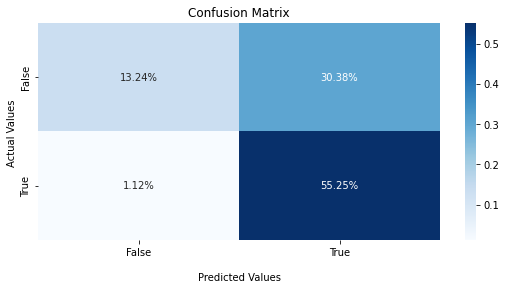

In [229]:
# Построим график «Матрица ошибок»
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## подписываем оси
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [230]:
precision = sklearn.metrics.precision_score(y_test, y_pred_list_nb)
precision

0.6452271567126084

In [231]:
recall = sklearn.metrics.recall_score(y_test, y_pred_list_nb)
recall

0.980098216593435

Построим график precision - recall

In [232]:
y_test_int = y_test.replace({'Good': 1, 'Bad': 0})

baseline_model = sum(y_test_int == 1) / len(y_test_int)

precision_cur, recall_cur, _ = precision_recall_curve(y_test_int, y_pred_list_n_test)
auc_lr = auc(recall_cur, precision_cur)

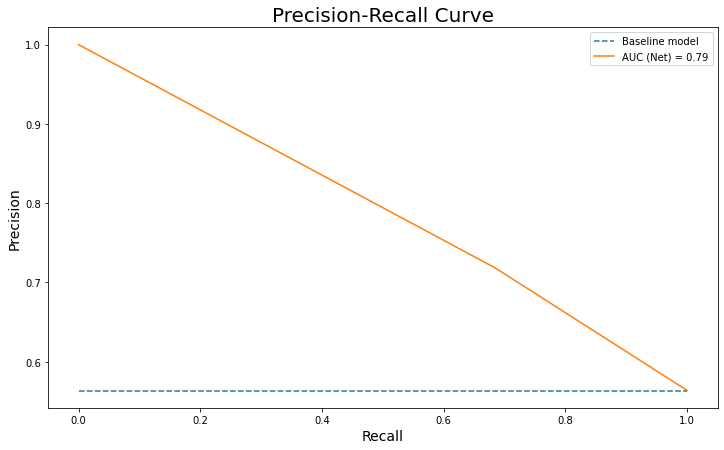

In [233]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_cur, precision_cur, label=f'AUC (Net) = {auc_lr:.2f}')

plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

Проанализируем важность основных факторов, влияющих на вероятность ДТП.

In [234]:
# объединим признаки из тестовой и тренировочной выборок
df_imp = x_train_ml.append(x_test_ml)

In [235]:
# создадим контейнер Series из признаков и определим их важность
cat_imp = pd.Series(model_cat.get_feature_importance(), df_imp.columns)

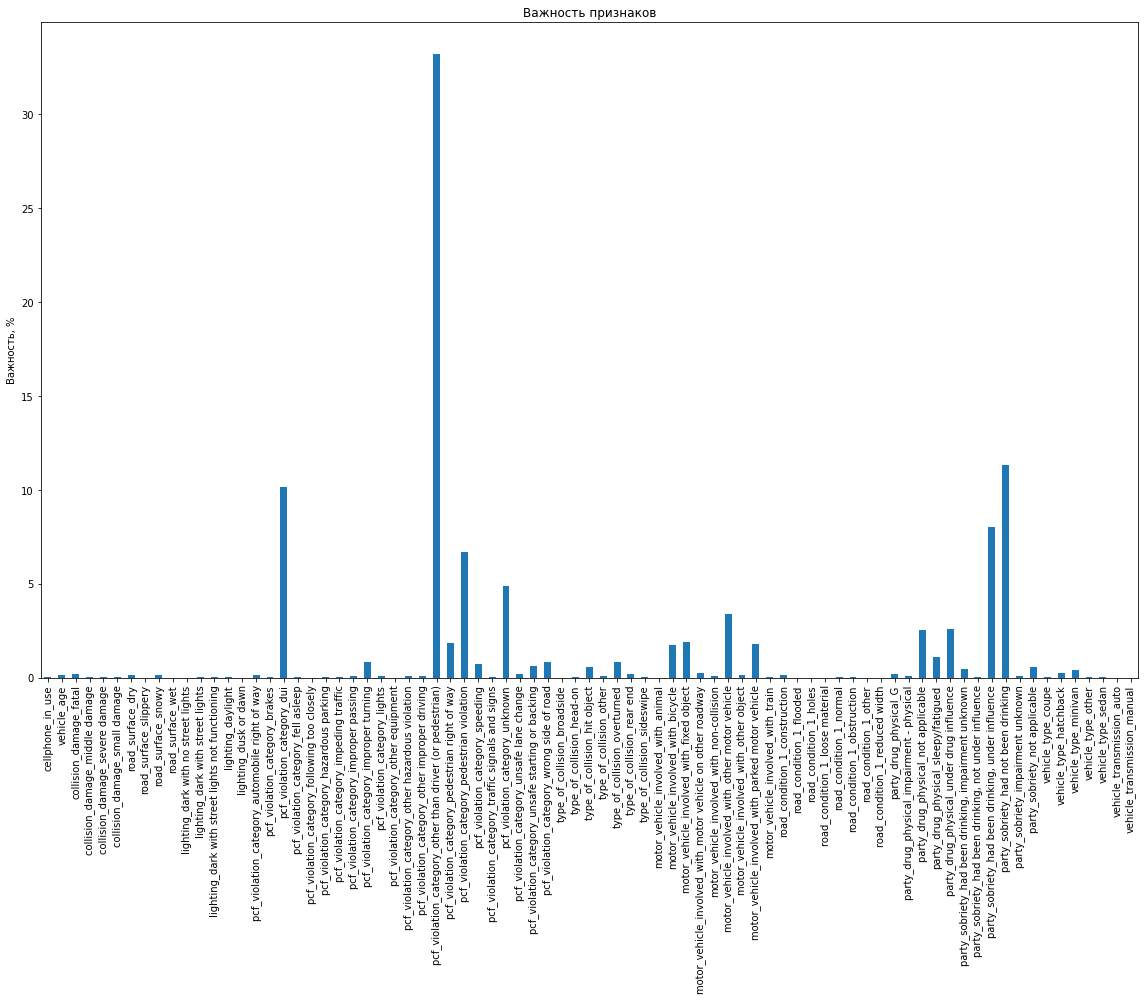

In [236]:
# визуализируем результат
fig, ax = plt.subplots(figsize=(16,14))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

In [237]:
cat_imp.sort_values(ascending=False).head(10)

pcf_violation_category_other than driver (or pedestrian)    33.229222
party_sobriety_had not been drinking                        11.305249
pcf_violation_category_dui                                  10.158607
party_sobriety_had been drinking, under influence            8.003115
pcf_violation_category_pedestrian violation                  6.706136
pcf_violation_category_unknown                               4.875208
motor_vehicle_involved_with_other motor vehicle              3.409392
party_drug_physical_under drug influence                     2.573229
party_drug_physical_not applicable                           2.524989
motor_vehicle_involved_with_fixed object                     1.876241
dtype: float64

Наиболее влиятельными факторами оказались "Категория нарушения - 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)" и "Трезвость участника - A — Had Not Been Drinking (Не пил)". Данная информация нам недостаточно полезна для принятия мер со стороны каршеринговой компании. Изучим следующие признаки. 

Следующими признаками оказались "Категория нарушения 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)" и "Трезвость участника B — Had Been Drinking, Under Influence (Был пьян, под влиянием)", что имеет одинаковую суть. 

Визуализируем количество аварий от выявленных выше признаков.

In [238]:
# выгрузим данные
query = '''

SELECT  COUNT(col.case_id) AS count_accidents
FROM collisions AS col
        JOIN parties AS part
        ON col.case_id = part.case_id
WHERE part.PARTY_SOBRIETY = 'had been drinking, under influence' 
        OR col.PCF_VIOLATION_CATEGORY = 'col.driving or bicycling under the influence of alcohol or drug'

'''
# выполняем запрос
df_drug = pd.read_sql_query(query, con=engine)
display(df_drug)

,count_accidents
0,112413


In [239]:
# выгрузим данные
query = '''

SELECT  COUNT(case_id) AS all_count_accidents
FROM collisions 
'''
# выполняем запрос
df_all_count_accidents = pd.read_sql_query(query, con=engine)
display(df_all_count_accidents)

,all_count_accidents
0,1400000


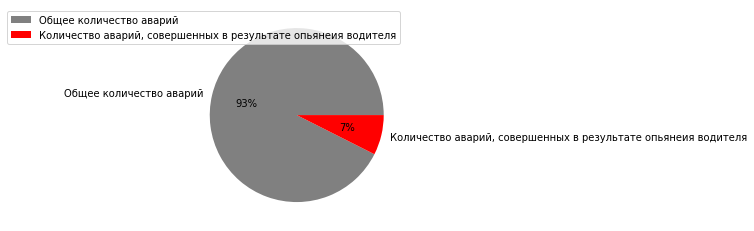

In [240]:
%matplotlib inline
dataframe = pd.DataFrame({'Name': ['Общее количество аварий', 
                                   'Количество аварий, совершенных в результате опьянеия водителя'],
                          '': [1400000, 112413]})
colors = ['grey', 'red']
labels = 'Общее количество аварий', 'Количество аварий, совершенных в результате опьянеия водителя'
dataframe.plot(
    kind='pie', y='', 
  autopct='%1.0f%%', colors=colors, labels=labels)

plt.show()

Исходя из графика можно утверждать, что 7% аварий происходит по вине водителей, находившихся в состоянии алкогольного или наркотического опьянения.

В данном случае следует рассмотреть возможность проверки водителя на имеющийся в организме алкоголь или психоактивные вещества.

Вопрос недопущения к поездке водителя в состоянии алкогольного опьянения отражен в условии задачи. Дополнительное предложение: сделать пункты освидетельствования (общая проверка на алкоголь, наркотики, адекватное поведение) на определенных расстояниях между собой, учитывая наибольший поток каршеринговых маршрутов (там размесить большее количество), и обязать водителей в начале и конце поездки проходить осмотр. Водителям нужно будет только заранее планировать маршрут и время поездки.

## Выводы

Лучшей моделью стала неронная сеть с применением батчей, одним скрытым слоем и функцией активации сигмоида. Считаю, что общая точность определения риска ДТП в 70% недостаточно велика. Причем модель плахо справляется со случаями, когда предсказание ДТП не произойдет, а в реальности оно случается. Такие ошибки представляют бОльшую опасность, нежели предсказание - произойдет, а фактически ДТП не случается. Модель подверглась переобучению, регуляризация не помогла.

Адекватная система оценки риска при выдаче автомобиля реальна, но при вложении значительной финансовой суммы. Но тогда станет вопрос выгодно ли это самой каршеринговой компании. Ведь за ДТП ответственность несет сам водитель, а автомобили окупаются довольно быстро.